In [51]:
from sequana import DNA
from sequana import FastA
import pandas as pd
import numpy as np
from sklearn.preprocessing import  StandardScaler
import re
from scipy.signal import find_peaks


In [161]:
def count_homopolymers(seq, min_length=5):
    # Ex : trouve AAAAA ou TTTTT, etc.
    pattern = re.compile(rf"(A{{{min_length},}}|T{{{min_length},}}|C{{{min_length},}}|G{{{min_length},}})")
    return len(pattern.findall(seq.upper()))

def load_fasta(fasta_path, window_size=100):
    f = FastA(fasta_path)
    data = []
    
    for maseq in f:
        print(maseq.name)
        features = []

        s = DNA(maseq.sequence.upper())
        seq = maseq.sequence.upper()
        s.window = window_size

        #Karlin
        df_karlin = pd.read_csv(f"../data/karlin/{maseq.name}_karlin_{window_size}.csv")
        karlin = df_karlin['Karlin'].tolist()
        karlin = [karlin[i] for i in range(0, len(karlin), window_size)]
        karlin = karlin[50:-50]

        #Entropy
        entropy = s.get_entropy(window_size)
        entropy = [entropy[i] for i in range(0, len(entropy), window_size)]
        entropy = entropy[50:-50]

        #Z curve 
        y_vals = [0]
        x_vals = [0]
        z_vals = [0]
        for base in seq:
            x = x_vals[-1]
            y = y_vals[-1]
            z = z_vals[-1]
            if base == 'A':
                x += 1
                y += 1
                z += 1
            elif base == 'C':
                x -= 1
                y += 1
                z -= 1
            elif base == 'G':
                x += 1
                y -= 1
                z -= 1
            elif base == 'T':
                x -= 1
                y -= 1
                z += 1
            x_vals.append(x)
            z_vals.append(z)
            y_vals.append(y)
        x_vals = [np.mean(x_vals[i:i+window_size]) for i in range(0, len(x_vals), window_size)]
        y_vals = [np.mean(y_vals[i:i+window_size]) for i in range(0, len(y_vals), window_size)]
        z_vals = [np.mean(z_vals[i:i+window_size]) for i in range(0, len(z_vals), window_size)]
        x_vals = x_vals[50:-50]
        y_vals = y_vals[50:-50]
        z_vals = z_vals[50:-50]


        at_skews = []
        gc_skews = []
        for i in range(0, len(seq) - window_size + 1, window_size):
            window = seq[i:i + window_size]
            g = window.count("G")
            c = window.count("C")
            a = window.count("A")
            t = window.count("T")
    
  
            if g + c == 0:
                skew = 0
            else:
                skew = (g - c) / (g + c)
    
            gc_skews.append(skew)
            if  a + t == 0:
                skew = 0
            else:
                skew = (a - t) / (a + t)
            at_skews.append(skew)
        gc_skews.append(skew)
        at_skews.append(skew)
        at_skews = at_skews[50:-50]
        gc_skews = gc_skews[50:-50]

        #X2
        min_homopolymer_length = 2
        X2 = []
        for i in range(0, len(maseq.sequence), window_size):
            window = seq[i:i + window_size]
            nb = count_homopolymers(window, min_length=min_homopolymer_length)
            X2.append(nb)
        X2 = X2[50:-50]


        #X3
        min_homopolymer_length = 3
        X3 = []
        for i in range(0, len(maseq.sequence), window_size):
            window = seq[i:i + window_size]
            nb = count_homopolymers(window, min_length=min_homopolymer_length)
            X3.append(nb)

        X3 = X3[50:-50]
   

        #X4
        min_homopolymer_length = 4
        X4 = []
        for i in range(0, len(maseq.sequence), window_size):
            window = seq[i:i + window_size]
            nb = count_homopolymers(window, min_length=min_homopolymer_length)
            X4.append(nb)
        X4 = X4[50:-50]

        #X5
        min_homopolymer_length = 5
        X5 = []
        for i in range(0, len(maseq.sequence), window_size):
            window = seq[i:i + window_size]
            nb = count_homopolymers(window, min_length=min_homopolymer_length)
            X5.append(nb)

        X5 = X5[50:-50]


        #X6
        min_homopolymer_length = 6
        X6 = []
        for i in range(0, len(maseq.sequence), window_size):
            window = seq[i:i + window_size]
            nb = count_homopolymers(window, min_length=min_homopolymer_length)
            X6.append(nb)
        X6 = X6[50:-50]

        #dna flex
        dnaFlex = s.get_dna_flexibility()
        dnaFlex = [dnaFlex[i] for i in range(0, len(dnaFlex), window_size)]
        dnaFlex = dnaFlex[50:-50]

        #dna flex
        info_entropy = s.get_informational_entropy()
        info_entropy = [info_entropy[i] for i in range(0, len(info_entropy), window_size)]
        info_entropy = info_entropy[50:-50]


        df= pd.DataFrame({
            'karlin': karlin,
            'x_vals': x_vals,
            'y_val': y_vals,
            'z_vals': z_vals,
            'entropy':entropy,
            'X2':X2,
            'X3':X3,
            'X4':X4,
            'X5':X5,
            'X6':X6,
            'dnaFlex':dnaFlex,
            'info_entropy':info_entropy,
            'at_skews':at_skews,
            'gc_skews':gc_skews
        })

        data.append(df)
    return data

data = load_fasta("../data/Fasta/TriTrypDB-68_LmajorFriedlin_Genome.fasta")
    

LmjF.01
LmjF.02
LmjF.03
LmjF.04
LmjF.05
LmjF.06
LmjF.07
LmjF.08
LmjF.09
LmjF.10
LmjF.11
LmjF.12
LmjF.13
LmjF.14
LmjF.15
LmjF.16
LmjF.17
LmjF.18
LmjF.19
LmjF.20
LmjF.21
LmjF.22
LmjF.23
LmjF.24
LmjF.25
LmjF.26
LmjF.27
LmjF.28
LmjF.29
LmjF.30
LmjF.31
LmjF.32
LmjF.33
LmjF.34
LmjF.35
LmjF.36


  8%|███▍                                       | 8/100 [00:00<00:02, 37.43it/s]

Epoch 1, Loss: 1.2527157068252563
Epoch 2, Loss: 1.2108023166656494
Epoch 3, Loss: 1.170317530632019
Epoch 4, Loss: 1.1313821077346802
Epoch 5, Loss: 1.093925952911377
Epoch 6, Loss: 1.057888388633728
Epoch 7, Loss: 1.0235891342163086
Epoch 8, Loss: 0.9909327626228333


 16%|██████▋                                   | 16/100 [00:00<00:02, 38.07it/s]

Epoch 9, Loss: 0.9600667953491211
Epoch 10, Loss: 0.9310267567634583
Epoch 11, Loss: 0.9037307500839233
Epoch 12, Loss: 0.8780428767204285
Epoch 13, Loss: 0.8537923693656921
Epoch 14, Loss: 0.8309246301651001
Epoch 15, Loss: 0.8093932867050171
Epoch 16, Loss: 0.7891818881034851


 24%|██████████                                | 24/100 [00:00<00:01, 38.25it/s]

Epoch 17, Loss: 0.7702802419662476
Epoch 18, Loss: 0.752654492855072
Epoch 19, Loss: 0.7363094091415405
Epoch 20, Loss: 0.721249520778656
Epoch 21, Loss: 0.7074614763259888
Epoch 22, Loss: 0.6949049234390259
Epoch 23, Loss: 0.6835296154022217
Epoch 24, Loss: 0.6732679009437561


 32%|█████████████▍                            | 32/100 [00:00<00:01, 38.50it/s]

Epoch 25, Loss: 0.664037823677063
Epoch 26, Loss: 0.655756950378418
Epoch 27, Loss: 0.6483438611030579
Epoch 28, Loss: 0.6417072415351868
Epoch 29, Loss: 0.6357657313346863
Epoch 30, Loss: 0.6304389238357544
Epoch 31, Loss: 0.6256527304649353
Epoch 32, Loss: 0.6213429570198059


 40%|████████████████▊                         | 40/100 [00:01<00:01, 38.96it/s]

Epoch 33, Loss: 0.6174489855766296
Epoch 34, Loss: 0.6139201521873474
Epoch 35, Loss: 0.610711395740509
Epoch 36, Loss: 0.6077836155891418
Epoch 37, Loss: 0.6051053404808044
Epoch 38, Loss: 0.6026496887207031
Epoch 39, Loss: 0.6003919839859009
Epoch 40, Loss: 0.5983120203018188


 48%|████████████████████▏                     | 48/100 [00:01<00:01, 38.37it/s]

Epoch 41, Loss: 0.5963926315307617
Epoch 42, Loss: 0.5946196913719177
Epoch 43, Loss: 0.5929803252220154
Epoch 44, Loss: 0.5914647579193115
Epoch 45, Loss: 0.5900631546974182
Epoch 46, Loss: 0.5887665152549744
Epoch 47, Loss: 0.5875682234764099
Epoch 48, Loss: 0.5864617228507996


 56%|███████████████████████▌                  | 56/100 [00:01<00:01, 38.45it/s]

Epoch 49, Loss: 0.5854402780532837
Epoch 50, Loss: 0.5844974517822266
Epoch 51, Loss: 0.5836277604103088
Epoch 52, Loss: 0.5828250646591187
Epoch 53, Loss: 0.5820841789245605
Epoch 54, Loss: 0.5813998579978943
Epoch 55, Loss: 0.5807672142982483
Epoch 56, Loss: 0.580181360244751


 65%|███████████████████████████▎              | 65/100 [00:01<00:00, 39.96it/s]

Epoch 57, Loss: 0.579637885093689
Epoch 58, Loss: 0.5791324377059937
Epoch 59, Loss: 0.5786610841751099
Epoch 60, Loss: 0.5782202482223511
Epoch 61, Loss: 0.5778071284294128
Epoch 62, Loss: 0.5774183869361877
Epoch 63, Loss: 0.5770516395568848
Epoch 64, Loss: 0.5767046213150024
Epoch 65, Loss: 0.5763756036758423


 73%|██████████████████████████████▋           | 73/100 [00:01<00:00, 39.50it/s]

Epoch 66, Loss: 0.5760630965232849
Epoch 67, Loss: 0.5757654309272766
Epoch 68, Loss: 0.5754817724227905
Epoch 69, Loss: 0.5752109289169312
Epoch 70, Loss: 0.5749520063400269
Epoch 71, Loss: 0.5747044682502747
Epoch 72, Loss: 0.5744675993919373
Epoch 73, Loss: 0.5742409229278564
Epoch 74, Loss: 0.5740238428115845


 83%|██████████████████████████████████▊       | 83/100 [00:02<00:00, 40.49it/s]

Epoch 75, Loss: 0.5738159418106079
Epoch 76, Loss: 0.5736168622970581
Epoch 77, Loss: 0.5734261274337769
Epoch 78, Loss: 0.5732432007789612
Epoch 79, Loss: 0.5730675458908081
Epoch 80, Loss: 0.5728990435600281
Epoch 81, Loss: 0.572736918926239
Epoch 82, Loss: 0.5725812911987305
Epoch 83, Loss: 0.5724314451217651


 88%|████████████████████████████████████▉     | 88/100 [00:02<00:00, 40.72it/s]

Epoch 84, Loss: 0.5722871422767639
Epoch 85, Loss: 0.5721482038497925
Epoch 86, Loss: 0.5720141530036926
Epoch 87, Loss: 0.5718846917152405
Epoch 88, Loss: 0.5717596411705017
Epoch 89, Loss: 0.5716387033462524
Epoch 90, Loss: 0.5715216994285583
Epoch 91, Loss: 0.5714083909988403
Epoch 92, Loss: 0.5712986588478088


100%|█████████████████████████████████████████| 100/100 [00:02<00:00, 39.38it/s]

Epoch 93, Loss: 0.5711921453475952
Epoch 94, Loss: 0.5710888504981995
Epoch 95, Loss: 0.5709884762763977
Epoch 96, Loss: 0.5708912014961243
Epoch 97, Loss: 0.5707964301109314
Epoch 98, Loss: 0.5707043409347534
Epoch 99, Loss: 0.5706146955490112
Epoch 100, Loss: 0.5705274343490601


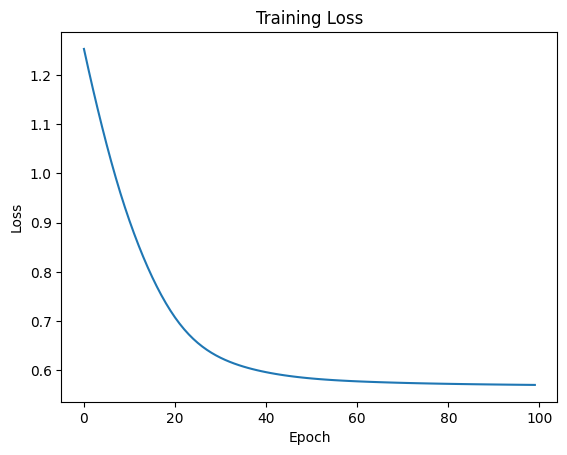

[[<tf.Tensor: shape=(2590,), dtype=float32, numpy=
array([0.31590226, 0.31316087, 0.35751274, ..., 3.9437532 , 0.4415097 ,
       2.143604  ], dtype=float32)>, array([ 0.7704763,  0.7634586,  0.871963 , ..., 17.469673 ,  1.9557719,
        9.495667 ], dtype=float32)]]


  9%|███▊                                       | 9/100 [00:00<00:02, 39.61it/s]

Epoch 1, Loss: 1.223586082458496
Epoch 2, Loss: 1.182168960571289
Epoch 3, Loss: 1.1434705257415771
Epoch 4, Loss: 1.1070539951324463
Epoch 5, Loss: 1.0725359916687012
Epoch 6, Loss: 1.0396994352340698
Epoch 7, Loss: 1.008398175239563
Epoch 8, Loss: 0.9785159826278687
Epoch 9, Loss: 0.9499267935752869


 14%|█████▉                                    | 14/100 [00:00<00:02, 39.90it/s]

Epoch 10, Loss: 0.922562301158905
Epoch 11, Loss: 0.896389901638031
Epoch 12, Loss: 0.8714238405227661
Epoch 13, Loss: 0.8476711511611938
Epoch 14, Loss: 0.8251745700836182
Epoch 15, Loss: 0.8039668798446655
Epoch 16, Loss: 0.7840878963470459
Epoch 17, Loss: 0.765575647354126
Epoch 18, Loss: 0.7484399676322937


 24%|██████████                                | 24/100 [00:00<00:01, 40.98it/s]

Epoch 19, Loss: 0.732668936252594
Epoch 20, Loss: 0.718232274055481
Epoch 21, Loss: 0.7050876617431641
Epoch 22, Loss: 0.6931723952293396
Epoch 23, Loss: 0.6824148893356323
Epoch 24, Loss: 0.6727285981178284
Epoch 25, Loss: 0.6640251278877258
Epoch 26, Loss: 0.6562156081199646
Epoch 27, Loss: 0.6492122411727905


 34%|██████████████▎                           | 34/100 [00:00<00:01, 41.41it/s]

Epoch 28, Loss: 0.6429227590560913
Epoch 29, Loss: 0.6372621059417725
Epoch 30, Loss: 0.6321520209312439
Epoch 31, Loss: 0.6275225877761841
Epoch 32, Loss: 0.6233102679252625
Epoch 33, Loss: 0.6194604635238647
Epoch 34, Loss: 0.6159259676933289
Epoch 35, Loss: 0.6126663088798523
Epoch 36, Loss: 0.6096478700637817


 44%|██████████████████▍                       | 44/100 [00:01<00:01, 41.15it/s]

Epoch 37, Loss: 0.6068445444107056
Epoch 38, Loss: 0.604235053062439
Epoch 39, Loss: 0.6018006205558777
Epoch 40, Loss: 0.5995256304740906
Epoch 41, Loss: 0.5973961353302002
Epoch 42, Loss: 0.5953996181488037
Epoch 43, Loss: 0.5935270190238953
Epoch 44, Loss: 0.5917699337005615
Epoch 45, Loss: 0.5901221036911011


 49%|████████████████████▌                     | 49/100 [00:01<00:01, 40.38it/s]

Epoch 46, Loss: 0.5885794758796692
Epoch 47, Loss: 0.5871378779411316
Epoch 48, Loss: 0.585793673992157
Epoch 49, Loss: 0.5845431089401245
Epoch 50, Loss: 0.5833792686462402
Epoch 51, Loss: 0.5822963118553162
Epoch 52, Loss: 0.5812905430793762
Epoch 53, Loss: 0.580357015132904


 58%|████████████████████████▎                 | 58/100 [00:01<00:01, 38.90it/s]

Epoch 54, Loss: 0.5794892311096191
Epoch 55, Loss: 0.578681230545044
Epoch 56, Loss: 0.5779280066490173
Epoch 57, Loss: 0.5772253274917603
Epoch 58, Loss: 0.5765685439109802
Epoch 59, Loss: 0.5759536623954773
Epoch 60, Loss: 0.5753760933876038
Epoch 61, Loss: 0.5748319625854492


 68%|████████████████████████████▌             | 68/100 [00:01<00:00, 40.03it/s]

Epoch 62, Loss: 0.5743180513381958
Epoch 63, Loss: 0.5738314986228943
Epoch 64, Loss: 0.5733693242073059
Epoch 65, Loss: 0.5729297995567322
Epoch 66, Loss: 0.5725110173225403
Epoch 67, Loss: 0.5721111297607422
Epoch 68, Loss: 0.5717285871505737
Epoch 69, Loss: 0.5713626742362976
Epoch 70, Loss: 0.5710123777389526


 78%|████████████████████████████████▊         | 78/100 [00:01<00:00, 40.27it/s]

Epoch 71, Loss: 0.5706771612167358
Epoch 72, Loss: 0.5703562498092651
Epoch 73, Loss: 0.570048987865448
Epoch 74, Loss: 0.5697548389434814
Epoch 75, Loss: 0.569473147392273
Epoch 76, Loss: 0.569203794002533
Epoch 77, Loss: 0.568946123123169
Epoch 78, Loss: 0.568699836730957
Epoch 79, Loss: 0.5684645175933838


 88%|████████████████████████████████████▉     | 88/100 [00:02<00:00, 40.94it/s]

Epoch 80, Loss: 0.5682396292686462
Epoch 81, Loss: 0.5680249929428101
Epoch 82, Loss: 0.5678198933601379
Epoch 83, Loss: 0.567624032497406
Epoch 84, Loss: 0.5674367547035217
Epoch 85, Loss: 0.5672576427459717
Epoch 86, Loss: 0.5670865178108215
Epoch 87, Loss: 0.5669221878051758
Epoch 88, Loss: 0.5667640566825867


 93%|███████████████████████████████████████   | 93/100 [00:02<00:00, 41.14it/s]

Epoch 89, Loss: 0.5666117072105408
Epoch 90, Loss: 0.5664646625518799
Epoch 91, Loss: 0.5663227438926697
Epoch 92, Loss: 0.5661854147911072
Epoch 93, Loss: 0.5660525560379028
Epoch 94, Loss: 0.5659238696098328
Epoch 95, Loss: 0.565799355506897
Epoch 96, Loss: 0.5656787157058716
Epoch 97, Loss: 0.5655620098114014


100%|█████████████████████████████████████████| 100/100 [00:02<00:00, 40.44it/s]


Epoch 98, Loss: 0.5654488801956177
Epoch 99, Loss: 0.5653393864631653
Epoch 100, Loss: 0.5652334094047546


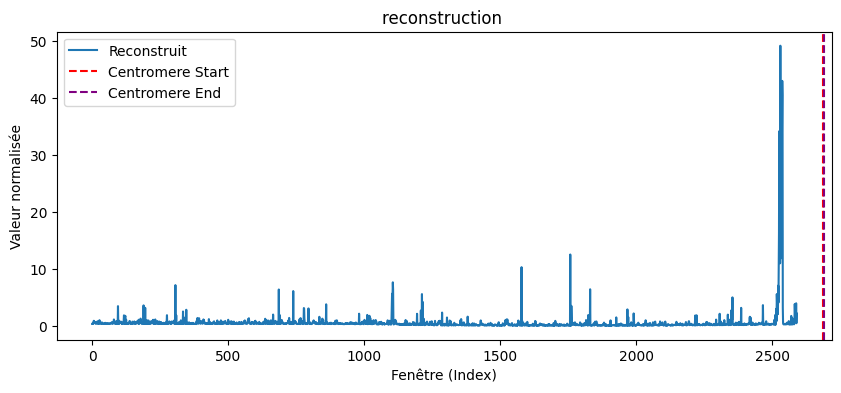

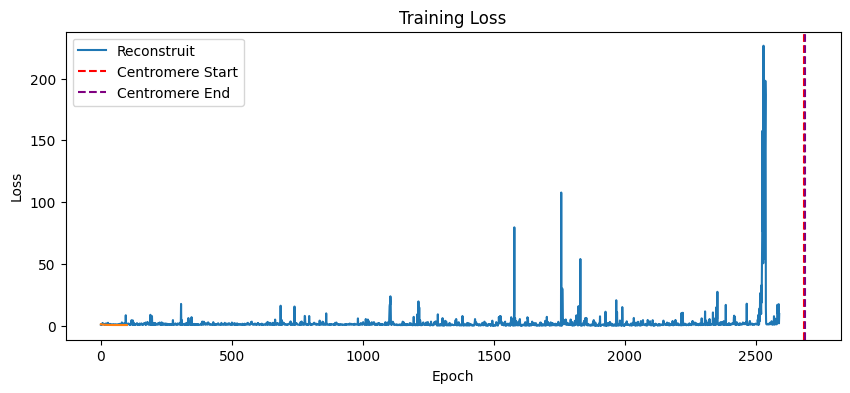

[[<tf.Tensor: shape=(2590,), dtype=float32, numpy=
array([0.31590226, 0.31316087, 0.35751274, ..., 3.9437532 , 0.4415097 ,
       2.143604  ], dtype=float32)>, array([ 0.7704763,  0.7634586,  0.871963 , ..., 17.469673 ,  1.9557719,
        9.495667 ], dtype=float32)], [<tf.Tensor: shape=(3458,), dtype=float32, numpy=
array([0.84758735, 0.75183105, 0.78168184, ..., 0.8472217 , 0.73171717,
       0.69455117], dtype=float32)>, array([1.0952119, 0.9719387, 1.0110059, ..., 1.5214452, 1.3135943,
       1.2464677], dtype=float32)]]


  9%|███▊                                       | 9/100 [00:00<00:02, 40.34it/s]

Epoch 1, Loss: 1.2218718528747559
Epoch 2, Loss: 1.1865289211273193
Epoch 3, Loss: 1.152429223060608
Epoch 4, Loss: 1.1195273399353027
Epoch 5, Loss: 1.087741494178772
Epoch 6, Loss: 1.0569666624069214
Epoch 7, Loss: 1.027279257774353
Epoch 8, Loss: 0.9987022876739502
Epoch 9, Loss: 0.9712850451469421


 14%|█████▉                                    | 14/100 [00:00<00:02, 40.14it/s]

Epoch 10, Loss: 0.9450680613517761
Epoch 11, Loss: 0.9200366735458374
Epoch 12, Loss: 0.8962105512619019
Epoch 13, Loss: 0.8736135363578796
Epoch 14, Loss: 0.8522442579269409
Epoch 15, Loss: 0.8321099877357483
Epoch 16, Loss: 0.8132322430610657
Epoch 17, Loss: 0.7956029772758484
Epoch 18, Loss: 0.7792085409164429


 24%|██████████                                | 24/100 [00:00<00:01, 40.84it/s]

Epoch 19, Loss: 0.7640314102172852
Epoch 20, Loss: 0.7500625252723694
Epoch 21, Loss: 0.7372621297836304
Epoch 22, Loss: 0.7255781888961792
Epoch 23, Loss: 0.714957058429718
Epoch 24, Loss: 0.7053359746932983
Epoch 25, Loss: 0.6966497302055359
Epoch 26, Loss: 0.6888304352760315
Epoch 27, Loss: 0.681805431842804


 34%|██████████████▎                           | 34/100 [00:00<00:01, 41.32it/s]

Epoch 28, Loss: 0.675503134727478
Epoch 29, Loss: 0.6698548197746277
Epoch 30, Loss: 0.6647948622703552
Epoch 31, Loss: 0.6602634191513062
Epoch 32, Loss: 0.6562020778656006
Epoch 33, Loss: 0.652557909488678
Epoch 34, Loss: 0.6492816209793091
Epoch 35, Loss: 0.6463290452957153
Epoch 36, Loss: 0.6436618566513062


 44%|██████████████████▍                       | 44/100 [00:01<00:01, 41.38it/s]

Epoch 37, Loss: 0.6412433385848999
Epoch 38, Loss: 0.6390440464019775
Epoch 39, Loss: 0.6370357275009155
Epoch 40, Loss: 0.6351950168609619
Epoch 41, Loss: 0.6335014700889587
Epoch 42, Loss: 0.631937563419342
Epoch 43, Loss: 0.6304889917373657
Epoch 44, Loss: 0.6291433572769165
Epoch 45, Loss: 0.62788987159729


 54%|██████████████████████▋                   | 54/100 [00:01<00:01, 41.27it/s]

Epoch 46, Loss: 0.6267196536064148
Epoch 47, Loss: 0.6256252527236938
Epoch 48, Loss: 0.6246002912521362
Epoch 49, Loss: 0.6236392259597778
Epoch 50, Loss: 0.6227375864982605
Epoch 51, Loss: 0.6218910813331604
Epoch 52, Loss: 0.6210962533950806
Epoch 53, Loss: 0.6203497052192688
Epoch 54, Loss: 0.6196491122245789


 59%|████████████████████████▊                 | 59/100 [00:01<00:00, 41.03it/s]

Epoch 55, Loss: 0.6189917922019958
Epoch 56, Loss: 0.6183761954307556
Epoch 57, Loss: 0.6177998781204224
Epoch 58, Loss: 0.6172611713409424
Epoch 59, Loss: 0.6167581081390381
Epoch 60, Loss: 0.6162889003753662
Epoch 61, Loss: 0.6158515810966492
Epoch 62, Loss: 0.6154443025588989
Epoch 63, Loss: 0.6150644421577454


 69%|████████████████████████████▉             | 69/100 [00:01<00:00, 41.06it/s]

Epoch 64, Loss: 0.6147095561027527
Epoch 65, Loss: 0.614377498626709
Epoch 66, Loss: 0.6140658259391785
Epoch 67, Loss: 0.6137721538543701
Epoch 68, Loss: 0.6134945750236511
Epoch 69, Loss: 0.6132310032844543
Epoch 70, Loss: 0.61298006772995
Epoch 71, Loss: 0.6127399802207947
Epoch 72, Loss: 0.6125096678733826


 79%|█████████████████████████████████▏        | 79/100 [00:01<00:00, 41.31it/s]

Epoch 73, Loss: 0.6122881174087524
Epoch 74, Loss: 0.6120746731758118
Epoch 75, Loss: 0.6118688583374023
Epoch 76, Loss: 0.6116700172424316
Epoch 77, Loss: 0.6114782691001892
Epoch 78, Loss: 0.6112930178642273
Epoch 79, Loss: 0.6111142039299011
Epoch 80, Loss: 0.6109418869018555
Epoch 81, Loss: 0.6107756495475769


 89%|█████████████████████████████████████▍    | 89/100 [00:02<00:00, 41.40it/s]

Epoch 82, Loss: 0.6106152534484863
Epoch 83, Loss: 0.6104604601860046
Epoch 84, Loss: 0.6103110313415527
Epoch 85, Loss: 0.6101667881011963
Epoch 86, Loss: 0.6100272536277771
Epoch 87, Loss: 0.6098924875259399
Epoch 88, Loss: 0.6097619533538818
Epoch 89, Loss: 0.6096354722976685
Epoch 90, Loss: 0.6095128655433655


 99%|█████████████████████████████████████████▌| 99/100 [00:02<00:00, 41.36it/s]

Epoch 91, Loss: 0.6093937158584595
Epoch 92, Loss: 0.6092779636383057
Epoch 93, Loss: 0.6091654300689697
Epoch 94, Loss: 0.609055757522583
Epoch 95, Loss: 0.6089490056037903
Epoch 96, Loss: 0.6088449358940125
Epoch 97, Loss: 0.6087434887886047
Epoch 98, Loss: 0.6086446046829224
Epoch 99, Loss: 0.6085481643676758


100%|█████████████████████████████████████████| 100/100 [00:02<00:00, 41.02it/s]


Epoch 100, Loss: 0.6084539890289307


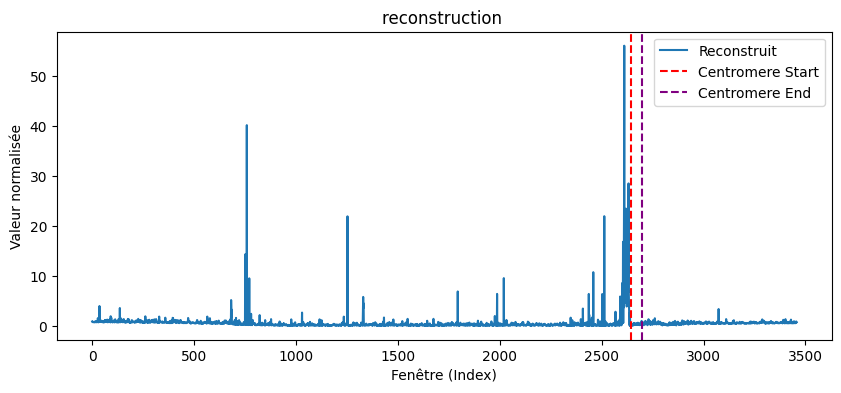

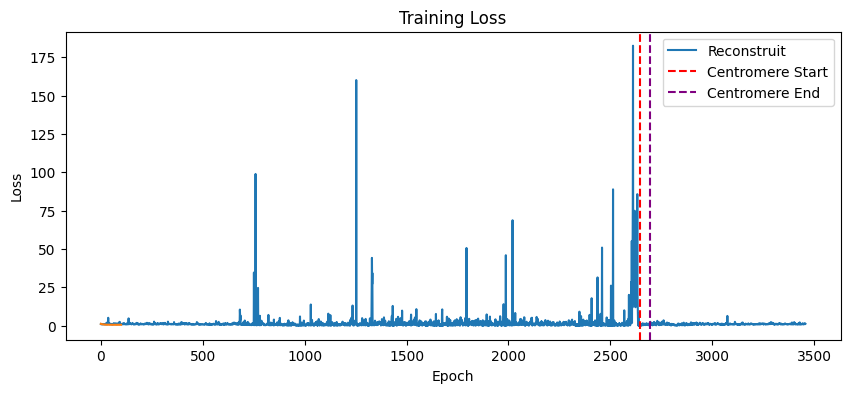

[[<tf.Tensor: shape=(2590,), dtype=float32, numpy=
array([0.31590226, 0.31316087, 0.35751274, ..., 3.9437532 , 0.4415097 ,
       2.143604  ], dtype=float32)>, array([ 0.7704763,  0.7634586,  0.871963 , ..., 17.469673 ,  1.9557719,
        9.495667 ], dtype=float32)], [<tf.Tensor: shape=(3458,), dtype=float32, numpy=
array([0.84758735, 0.75183105, 0.78168184, ..., 0.8472217 , 0.73171717,
       0.69455117], dtype=float32)>, array([1.0952119, 0.9719387, 1.0110059, ..., 1.5214452, 1.3135943,
       1.2464677], dtype=float32)], [<tf.Tensor: shape=(3746,), dtype=float32, numpy=
array([0.30874923, 0.40268493, 0.3191041 , ..., 1.4542493 , 1.4084473 ,
       1.4887613 ], dtype=float32)>, array([0.78956646, 1.0295734 , 0.8157056 , ..., 1.2307026 , 1.1916574 ,
       1.2593096 ], dtype=float32)]]


  9%|███▊                                       | 9/100 [00:00<00:02, 39.69it/s]

Epoch 1, Loss: 1.2281807661056519
Epoch 2, Loss: 1.185826301574707
Epoch 3, Loss: 1.14535653591156
Epoch 4, Loss: 1.1070481538772583
Epoch 5, Loss: 1.0710378885269165
Epoch 6, Loss: 1.0372225046157837
Epoch 7, Loss: 1.0053291320800781
Epoch 8, Loss: 0.9751432538032532
Epoch 9, Loss: 0.9464843273162842


 14%|█████▉                                    | 14/100 [00:00<00:02, 39.91it/s]

Epoch 10, Loss: 0.9192753434181213
Epoch 11, Loss: 0.8934853672981262
Epoch 12, Loss: 0.869016706943512
Epoch 13, Loss: 0.8458284735679626
Epoch 14, Loss: 0.8239219188690186
Epoch 15, Loss: 0.803321897983551
Epoch 16, Loss: 0.7840407490730286
Epoch 17, Loss: 0.7660902738571167
Epoch 18, Loss: 0.7494519352912903


 24%|██████████                                | 24/100 [00:00<00:01, 40.30it/s]

Epoch 19, Loss: 0.7341088056564331
Epoch 20, Loss: 0.7200276255607605
Epoch 21, Loss: 0.7071563601493835
Epoch 22, Loss: 0.695437490940094
Epoch 23, Loss: 0.6848095059394836
Epoch 24, Loss: 0.6751940250396729
Epoch 25, Loss: 0.6665096282958984
Epoch 26, Loss: 0.6586729288101196
Epoch 27, Loss: 0.6516028046607971


 34%|██████████████▎                           | 34/100 [00:00<00:01, 40.47it/s]

Epoch 28, Loss: 0.6452228426933289
Epoch 29, Loss: 0.6394639611244202
Epoch 30, Loss: 0.6342620253562927
Epoch 31, Loss: 0.629555344581604
Epoch 32, Loss: 0.625290036201477
Epoch 33, Loss: 0.6214181184768677
Epoch 34, Loss: 0.6178979277610779
Epoch 35, Loss: 0.6146916151046753
Epoch 36, Loss: 0.6117658019065857


 44%|██████████████████▍                       | 44/100 [00:01<00:01, 40.13it/s]

Epoch 37, Loss: 0.6090916991233826
Epoch 38, Loss: 0.6066445708274841
Epoch 39, Loss: 0.604403018951416
Epoch 40, Loss: 0.6023473739624023
Epoch 41, Loss: 0.6004617810249329
Epoch 42, Loss: 0.5987306833267212
Epoch 43, Loss: 0.5971397757530212
Epoch 44, Loss: 0.5956771969795227
Epoch 45, Loss: 0.5943323969841003


 54%|██████████████████████▋                   | 54/100 [00:01<00:01, 40.29it/s]

Epoch 46, Loss: 0.5930947661399841
Epoch 47, Loss: 0.5919550657272339
Epoch 48, Loss: 0.590904951095581
Epoch 49, Loss: 0.5899357199668884
Epoch 50, Loss: 0.5890398621559143
Epoch 51, Loss: 0.588211178779602
Epoch 52, Loss: 0.587443470954895
Epoch 53, Loss: 0.5867295861244202
Epoch 54, Loss: 0.5860650539398193


 59%|████████████████████████▊                 | 59/100 [00:01<00:01, 40.25it/s]

Epoch 55, Loss: 0.5854451656341553
Epoch 56, Loss: 0.5848655700683594
Epoch 57, Loss: 0.5843226313591003
Epoch 58, Loss: 0.5838127136230469
Epoch 59, Loss: 0.5833330154418945
Epoch 60, Loss: 0.5828806161880493
Epoch 61, Loss: 0.5824530720710754
Epoch 62, Loss: 0.5820487141609192
Epoch 63, Loss: 0.5816650986671448


 69%|████████████████████████████▉             | 69/100 [00:01<00:00, 40.02it/s]

Epoch 64, Loss: 0.5813007950782776
Epoch 65, Loss: 0.5809542536735535
Epoch 66, Loss: 0.5806241035461426
Epoch 67, Loss: 0.5803093910217285
Epoch 68, Loss: 0.5800089836120605
Epoch 69, Loss: 0.5797216892242432
Epoch 70, Loss: 0.5794468522071838
Epoch 71, Loss: 0.5791836977005005
Epoch 72, Loss: 0.5789312720298767


 79%|█████████████████████████████████▏        | 79/100 [00:01<00:00, 40.21it/s]

Epoch 73, Loss: 0.5786892771720886
Epoch 74, Loss: 0.5784568786621094
Epoch 75, Loss: 0.5782334804534912
Epoch 76, Loss: 0.5780184864997864
Epoch 77, Loss: 0.5778117775917053
Epoch 78, Loss: 0.5776126384735107
Epoch 79, Loss: 0.5774207711219788
Epoch 80, Loss: 0.5772356986999512
Epoch 81, Loss: 0.5770576596260071


 89%|█████████████████████████████████████▍    | 89/100 [00:02<00:00, 40.50it/s]

Epoch 82, Loss: 0.5768861770629883
Epoch 83, Loss: 0.5767205953598022
Epoch 84, Loss: 0.5765606164932251
Epoch 85, Loss: 0.5764061808586121
Epoch 86, Loss: 0.5762568116188049
Epoch 87, Loss: 0.5761123895645142
Epoch 88, Loss: 0.5759725570678711
Epoch 89, Loss: 0.575837254524231
Epoch 90, Loss: 0.5757062435150146


 99%|█████████████████████████████████████████▌| 99/100 [00:02<00:00, 40.24it/s]

Epoch 91, Loss: 0.5755791664123535
Epoch 92, Loss: 0.575455904006958
Epoch 93, Loss: 0.5753363370895386
Epoch 94, Loss: 0.5752200484275818
Epoch 95, Loss: 0.5751071572303772
Epoch 96, Loss: 0.5749973654747009
Epoch 97, Loss: 0.5748907327651978
Epoch 98, Loss: 0.5747867822647095
Epoch 99, Loss: 0.5746855735778809


100%|█████████████████████████████████████████| 100/100 [00:02<00:00, 40.16it/s]


Epoch 100, Loss: 0.5745871067047119


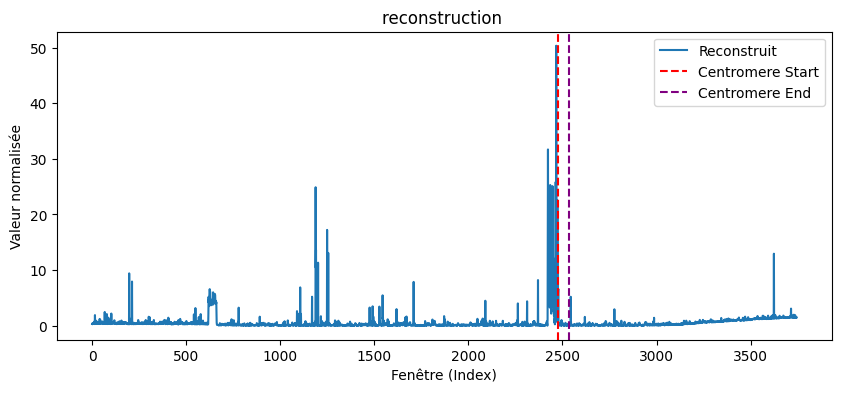

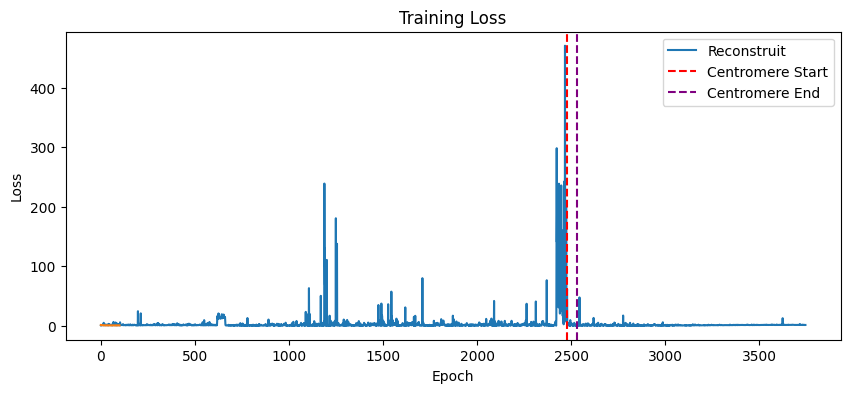

[[<tf.Tensor: shape=(2590,), dtype=float32, numpy=
array([0.31590226, 0.31316087, 0.35751274, ..., 3.9437532 , 0.4415097 ,
       2.143604  ], dtype=float32)>, array([ 0.7704763,  0.7634586,  0.871963 , ..., 17.469673 ,  1.9557719,
        9.495667 ], dtype=float32)], [<tf.Tensor: shape=(3458,), dtype=float32, numpy=
array([0.84758735, 0.75183105, 0.78168184, ..., 0.8472217 , 0.73171717,
       0.69455117], dtype=float32)>, array([1.0952119, 0.9719387, 1.0110059, ..., 1.5214452, 1.3135943,
       1.2464677], dtype=float32)], [<tf.Tensor: shape=(3746,), dtype=float32, numpy=
array([0.30874923, 0.40268493, 0.3191041 , ..., 1.4542493 , 1.4084473 ,
       1.4887613 ], dtype=float32)>, array([0.78956646, 1.0295734 , 0.8157056 , ..., 1.2307026 , 1.1916574 ,
       1.2593096 ], dtype=float32)], [<tf.Tensor: shape=(4629,), dtype=float32, numpy=
array([0.52157134, 0.62983674, 0.6286797 , ..., 0.90355587, 0.779844  ,
       0.738602  ], dtype=float32)>, array([0.97224534, 1.1746576 , 1.1730971 ,

  9%|███▊                                       | 9/100 [00:00<00:02, 39.26it/s]

Epoch 1, Loss: 1.1839858293533325
Epoch 2, Loss: 1.1435683965682983
Epoch 3, Loss: 1.1036276817321777
Epoch 4, Loss: 1.064820408821106
Epoch 5, Loss: 1.0276762247085571
Epoch 6, Loss: 0.9925165176391602
Epoch 7, Loss: 0.959460973739624
Epoch 8, Loss: 0.9284539818763733
Epoch 9, Loss: 0.8994433283805847


 18%|███████▌                                  | 18/100 [00:00<00:02, 39.90it/s]

Epoch 10, Loss: 0.8723584413528442
Epoch 11, Loss: 0.8471093773841858
Epoch 12, Loss: 0.823628842830658
Epoch 13, Loss: 0.8018476963043213
Epoch 14, Loss: 0.7816916108131409
Epoch 15, Loss: 0.7631028890609741
Epoch 16, Loss: 0.746020495891571
Epoch 17, Loss: 0.7303611636161804
Epoch 18, Loss: 0.7160527110099792


 27%|███████████▎                              | 27/100 [00:00<00:01, 40.22it/s]

Epoch 19, Loss: 0.7030244469642639
Epoch 20, Loss: 0.6912004947662354
Epoch 21, Loss: 0.6804988384246826
Epoch 22, Loss: 0.6708388328552246
Epoch 23, Loss: 0.6621389389038086
Epoch 24, Loss: 0.6543190479278564
Epoch 25, Loss: 0.6472996473312378
Epoch 26, Loss: 0.6410083174705505
Epoch 27, Loss: 0.6353728175163269


 32%|█████████████▍                            | 32/100 [00:00<00:01, 40.17it/s]

Epoch 28, Loss: 0.6303268671035767
Epoch 29, Loss: 0.6258093118667603
Epoch 30, Loss: 0.6217622756958008
Epoch 31, Loss: 0.6181330680847168
Epoch 32, Loss: 0.6148696541786194
Epoch 33, Loss: 0.6119243502616882
Epoch 34, Loss: 0.6092524528503418
Epoch 35, Loss: 0.6068151593208313
Epoch 36, Loss: 0.6045783758163452


 42%|█████████████████▋                        | 42/100 [00:01<00:01, 39.97it/s]

Epoch 37, Loss: 0.6025146245956421
Epoch 38, Loss: 0.6006026268005371
Epoch 39, Loss: 0.5988254547119141
Epoch 40, Loss: 0.5971700549125671
Epoch 41, Loss: 0.5956277251243591
Epoch 42, Loss: 0.594191312789917
Epoch 43, Loss: 0.5928555727005005
Epoch 44, Loss: 0.5916156768798828
Epoch 45, Loss: 0.5904664993286133


 52%|█████████████████████▊                    | 52/100 [00:01<00:01, 40.23it/s]

Epoch 46, Loss: 0.5894039273262024
Epoch 47, Loss: 0.588422954082489
Epoch 48, Loss: 0.5875194668769836
Epoch 49, Loss: 0.5866870880126953
Epoch 50, Loss: 0.5859190821647644
Epoch 51, Loss: 0.5852091312408447
Epoch 52, Loss: 0.5845509767532349
Epoch 53, Loss: 0.583938479423523
Epoch 54, Loss: 0.5833664536476135


 62%|██████████████████████████                | 62/100 [00:01<00:00, 40.07it/s]

Epoch 55, Loss: 0.5828306078910828
Epoch 56, Loss: 0.5823270082473755
Epoch 57, Loss: 0.5818528532981873
Epoch 58, Loss: 0.581405758857727
Epoch 59, Loss: 0.5809839367866516
Epoch 60, Loss: 0.5805856585502625
Epoch 61, Loss: 0.5802097320556641
Epoch 62, Loss: 0.5798545479774475


 67%|████████████████████████████▏             | 67/100 [00:01<00:00, 39.99it/s]

Epoch 63, Loss: 0.579518735408783
Epoch 64, Loss: 0.5792009234428406
Epoch 65, Loss: 0.5788997411727905
Epoch 66, Loss: 0.5786138772964478
Epoch 67, Loss: 0.5783419609069824
Epoch 68, Loss: 0.5780830979347229
Epoch 69, Loss: 0.5778360366821289
Epoch 70, Loss: 0.5775999426841736
Epoch 71, Loss: 0.5773738622665405


 77%|████████████████████████████████▎         | 77/100 [00:01<00:00, 40.23it/s]

Epoch 72, Loss: 0.5771571397781372
Epoch 73, Loss: 0.5769490599632263
Epoch 74, Loss: 0.5767493844032288
Epoch 75, Loss: 0.5765573978424072
Epoch 76, Loss: 0.5763725638389587
Epoch 77, Loss: 0.5761946439743042
Epoch 78, Loss: 0.5760231018066406
Epoch 79, Loss: 0.5758576989173889
Epoch 80, Loss: 0.57569819688797


 87%|████████████████████████████████████▌     | 87/100 [00:02<00:00, 40.47it/s]

Epoch 81, Loss: 0.5755442976951599
Epoch 82, Loss: 0.5753958225250244
Epoch 83, Loss: 0.5752521753311157
Epoch 84, Loss: 0.5751133561134338
Epoch 85, Loss: 0.5749790668487549
Epoch 86, Loss: 0.5748491883277893
Epoch 87, Loss: 0.5747233033180237
Epoch 88, Loss: 0.574601411819458
Epoch 89, Loss: 0.5744832754135132


 97%|████████████████████████████████████████▋ | 97/100 [00:02<00:00, 40.55it/s]

Epoch 90, Loss: 0.5743685960769653
Epoch 91, Loss: 0.5742573738098145
Epoch 92, Loss: 0.5741493701934814
Epoch 93, Loss: 0.574044406414032
Epoch 94, Loss: 0.5739424228668213
Epoch 95, Loss: 0.5738434791564941
Epoch 96, Loss: 0.5737471580505371
Epoch 97, Loss: 0.5736536383628845
Epoch 98, Loss: 0.573562502861023


100%|█████████████████████████████████████████| 100/100 [00:02<00:00, 40.11it/s]


Epoch 99, Loss: 0.5734739899635315
Epoch 100, Loss: 0.573387861251831


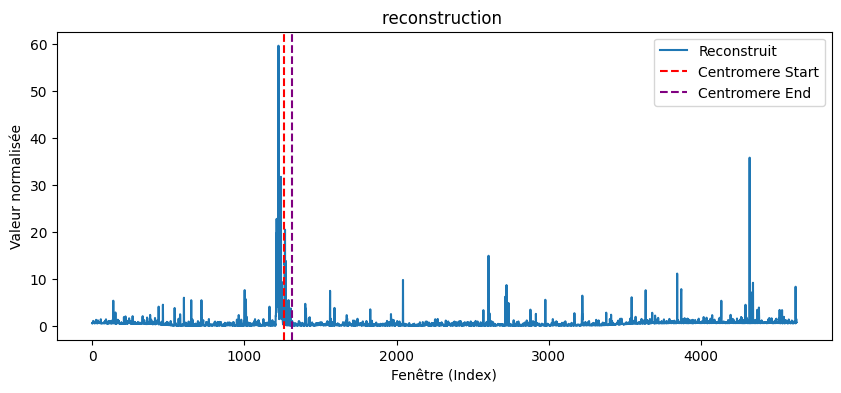

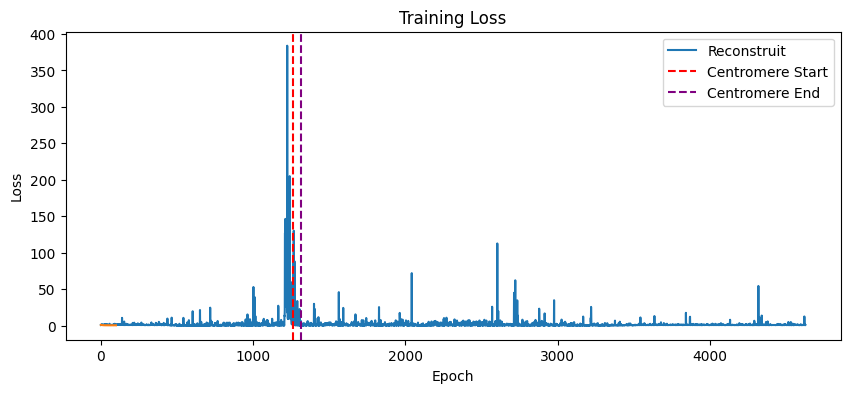

[[<tf.Tensor: shape=(2590,), dtype=float32, numpy=
array([0.31590226, 0.31316087, 0.35751274, ..., 3.9437532 , 0.4415097 ,
       2.143604  ], dtype=float32)>, array([ 0.7704763,  0.7634586,  0.871963 , ..., 17.469673 ,  1.9557719,
        9.495667 ], dtype=float32)], [<tf.Tensor: shape=(3458,), dtype=float32, numpy=
array([0.84758735, 0.75183105, 0.78168184, ..., 0.8472217 , 0.73171717,
       0.69455117], dtype=float32)>, array([1.0952119, 0.9719387, 1.0110059, ..., 1.5214452, 1.3135943,
       1.2464677], dtype=float32)], [<tf.Tensor: shape=(3746,), dtype=float32, numpy=
array([0.30874923, 0.40268493, 0.3191041 , ..., 1.4542493 , 1.4084473 ,
       1.4887613 ], dtype=float32)>, array([0.78956646, 1.0295734 , 0.8157056 , ..., 1.2307026 , 1.1916574 ,
       1.2593096 ], dtype=float32)], [<tf.Tensor: shape=(4629,), dtype=float32, numpy=
array([0.52157134, 0.62983674, 0.6286797 , ..., 0.90355587, 0.779844  ,
       0.738602  ], dtype=float32)>, array([0.97224534, 1.1746576 , 1.1730971 ,

  9%|███▊                                       | 9/100 [00:00<00:02, 39.05it/s]

Epoch 1, Loss: 1.2755334377288818
Epoch 2, Loss: 1.2375707626342773
Epoch 3, Loss: 1.2006230354309082
Epoch 4, Loss: 1.1647629737854004
Epoch 5, Loss: 1.1300681829452515
Epoch 6, Loss: 1.096620798110962
Epoch 7, Loss: 1.064544916152954
Epoch 8, Loss: 1.0339181423187256
Epoch 9, Loss: 1.00478994846344


 17%|███████▏                                  | 17/100 [00:00<00:02, 39.39it/s]

Epoch 10, Loss: 0.9771581888198853
Epoch 11, Loss: 0.9509634375572205
Epoch 12, Loss: 0.9261469841003418
Epoch 13, Loss: 0.9026059508323669
Epoch 14, Loss: 0.8801986575126648
Epoch 15, Loss: 0.8588327765464783
Epoch 16, Loss: 0.8384581804275513
Epoch 17, Loss: 0.8190285563468933
Epoch 18, Loss: 0.8005272746086121


 25%|██████████▌                               | 25/100 [00:00<00:01, 39.62it/s]

Epoch 19, Loss: 0.7829405665397644
Epoch 20, Loss: 0.7662655115127563
Epoch 21, Loss: 0.7504991292953491
Epoch 22, Loss: 0.7356475591659546
Epoch 23, Loss: 0.7217154502868652
Epoch 24, Loss: 0.7086984515190125
Epoch 25, Loss: 0.6965924501419067
Epoch 26, Loss: 0.6853808164596558
Epoch 27, Loss: 0.6750389337539673


 34%|██████████████▎                           | 34/100 [00:00<00:01, 39.98it/s]

Epoch 28, Loss: 0.6655372977256775
Epoch 29, Loss: 0.6568335890769958
Epoch 30, Loss: 0.6488796472549438
Epoch 31, Loss: 0.6416268944740295
Epoch 32, Loss: 0.6350241899490356
Epoch 33, Loss: 0.6290202736854553
Epoch 34, Loss: 0.6235634088516235
Epoch 35, Loss: 0.6186083555221558
Epoch 36, Loss: 0.6141056418418884


 43%|██████████████████                        | 43/100 [00:01<00:01, 40.02it/s]

Epoch 37, Loss: 0.6100123524665833
Epoch 38, Loss: 0.6062891483306885
Epoch 39, Loss: 0.6029006242752075
Epoch 40, Loss: 0.5998138189315796
Epoch 41, Loss: 0.5969985723495483
Epoch 42, Loss: 0.5944278240203857
Epoch 43, Loss: 0.5920790433883667
Epoch 44, Loss: 0.5899319052696228
Epoch 45, Loss: 0.5879663228988647


 53%|██████████████████████▎                   | 53/100 [00:01<00:01, 40.12it/s]

Epoch 46, Loss: 0.5861630439758301
Epoch 47, Loss: 0.584505021572113
Epoch 48, Loss: 0.5829770565032959
Epoch 49, Loss: 0.581566572189331
Epoch 50, Loss: 0.5802615284919739
Epoch 51, Loss: 0.5790512561798096
Epoch 52, Loss: 0.5779262185096741
Epoch 53, Loss: 0.5768783688545227
Epoch 54, Loss: 0.5759007334709167


 63%|██████████████████████████▍               | 63/100 [00:01<00:00, 40.40it/s]

Epoch 55, Loss: 0.5749869346618652
Epoch 56, Loss: 0.5741320848464966
Epoch 57, Loss: 0.5733316540718079
Epoch 58, Loss: 0.5725823044776917
Epoch 59, Loss: 0.571880578994751
Epoch 60, Loss: 0.5712238550186157
Epoch 61, Loss: 0.5706092119216919
Epoch 62, Loss: 0.5700340867042542
Epoch 63, Loss: 0.5694957375526428


 68%|████████████████████████████▌             | 68/100 [00:01<00:00, 40.31it/s]

Epoch 64, Loss: 0.5689915418624878
Epoch 65, Loss: 0.5685185790061951
Epoch 66, Loss: 0.5680742263793945
Epoch 67, Loss: 0.5676560401916504
Epoch 68, Loss: 0.567261815071106
Epoch 69, Loss: 0.5668891668319702
Epoch 70, Loss: 0.5665361881256104
Epoch 71, Loss: 0.5662009716033936
Epoch 72, Loss: 0.5658822059631348


 78%|████████████████████████████████▊         | 78/100 [00:01<00:00, 40.32it/s]

Epoch 73, Loss: 0.5655782222747803
Epoch 74, Loss: 0.5652881860733032
Epoch 75, Loss: 0.5650110244750977
Epoch 76, Loss: 0.5647456049919128
Epoch 77, Loss: 0.5644915103912354
Epoch 78, Loss: 0.5642480254173279
Epoch 79, Loss: 0.5640144348144531
Epoch 80, Loss: 0.5637903213500977
Epoch 81, Loss: 0.5635750889778137


 88%|████████████████████████████████████▉     | 88/100 [00:02<00:00, 40.54it/s]

Epoch 82, Loss: 0.5633682012557983
Epoch 83, Loss: 0.5631691813468933
Epoch 84, Loss: 0.5629775524139404
Epoch 85, Loss: 0.5627928376197815
Epoch 86, Loss: 0.5626146793365479
Epoch 87, Loss: 0.562442421913147
Epoch 88, Loss: 0.5622760653495789
Epoch 89, Loss: 0.562114953994751
Epoch 90, Loss: 0.561958909034729


 98%|█████████████████████████████████████████▏| 98/100 [00:02<00:00, 40.67it/s]

Epoch 91, Loss: 0.5618076920509338
Epoch 92, Loss: 0.5616608262062073
Epoch 93, Loss: 0.5615180730819702
Epoch 94, Loss: 0.5613795518875122
Epoch 95, Loss: 0.561244785785675
Epoch 96, Loss: 0.5611135363578796
Epoch 97, Loss: 0.5609858632087708
Epoch 98, Loss: 0.5608615279197693
Epoch 99, Loss: 0.5607403516769409


100%|█████████████████████████████████████████| 100/100 [00:02<00:00, 40.08it/s]


Epoch 100, Loss: 0.5606223940849304


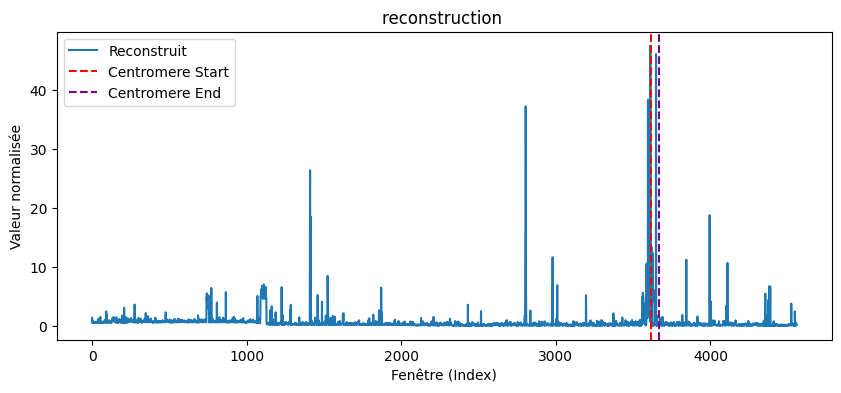

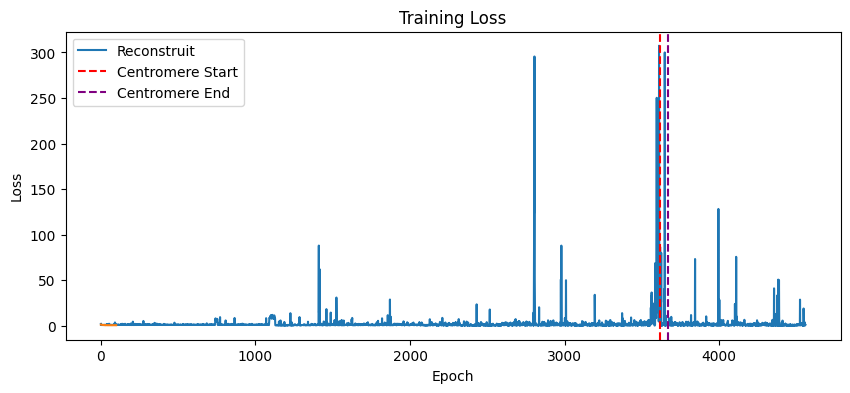

[[<tf.Tensor: shape=(2590,), dtype=float32, numpy=
array([0.31590226, 0.31316087, 0.35751274, ..., 3.9437532 , 0.4415097 ,
       2.143604  ], dtype=float32)>, array([ 0.7704763,  0.7634586,  0.871963 , ..., 17.469673 ,  1.9557719,
        9.495667 ], dtype=float32)], [<tf.Tensor: shape=(3458,), dtype=float32, numpy=
array([0.84758735, 0.75183105, 0.78168184, ..., 0.8472217 , 0.73171717,
       0.69455117], dtype=float32)>, array([1.0952119, 0.9719387, 1.0110059, ..., 1.5214452, 1.3135943,
       1.2464677], dtype=float32)], [<tf.Tensor: shape=(3746,), dtype=float32, numpy=
array([0.30874923, 0.40268493, 0.3191041 , ..., 1.4542493 , 1.4084473 ,
       1.4887613 ], dtype=float32)>, array([0.78956646, 1.0295734 , 0.8157056 , ..., 1.2307026 , 1.1916574 ,
       1.2593096 ], dtype=float32)], [<tf.Tensor: shape=(4629,), dtype=float32, numpy=
array([0.52157134, 0.62983674, 0.6286797 , ..., 0.90355587, 0.779844  ,
       0.738602  ], dtype=float32)>, array([0.97224534, 1.1746576 , 1.1730971 ,

  8%|███▍                                       | 8/100 [00:00<00:02, 38.03it/s]

Epoch 1, Loss: 1.2083081007003784
Epoch 2, Loss: 1.1723042726516724
Epoch 3, Loss: 1.1384565830230713
Epoch 4, Loss: 1.1066617965698242
Epoch 5, Loss: 1.0768123865127563
Epoch 6, Loss: 1.0486586093902588
Epoch 7, Loss: 1.0220277309417725
Epoch 8, Loss: 0.9968209862709045


 16%|██████▋                                   | 16/100 [00:00<00:02, 38.86it/s]

Epoch 9, Loss: 0.9727798104286194
Epoch 10, Loss: 0.9497605562210083
Epoch 11, Loss: 0.9276761412620544
Epoch 12, Loss: 0.9064456820487976
Epoch 13, Loss: 0.8860188126564026
Epoch 14, Loss: 0.8663879036903381
Epoch 15, Loss: 0.84757399559021
Epoch 16, Loss: 0.8296013474464417


 24%|██████████                                | 24/100 [00:00<00:01, 38.97it/s]

Epoch 17, Loss: 0.8125002384185791
Epoch 18, Loss: 0.7962929606437683
Epoch 19, Loss: 0.7810043692588806
Epoch 20, Loss: 0.7666665315628052
Epoch 21, Loss: 0.753291130065918
Epoch 22, Loss: 0.740863025188446
Epoch 23, Loss: 0.729362428188324
Epoch 24, Loss: 0.7187676429748535


 32%|█████████████▍                            | 32/100 [00:00<00:01, 39.20it/s]

Epoch 25, Loss: 0.709034264087677
Epoch 26, Loss: 0.7001162767410278
Epoch 27, Loss: 0.6919601559638977
Epoch 28, Loss: 0.6845113039016724
Epoch 29, Loss: 0.6777147054672241
Epoch 30, Loss: 0.6715189218521118
Epoch 31, Loss: 0.665874719619751
Epoch 32, Loss: 0.6607410907745361


 40%|████████████████▊                         | 40/100 [00:01<00:01, 39.30it/s]

Epoch 33, Loss: 0.6560842990875244
Epoch 34, Loss: 0.6518719792366028
Epoch 35, Loss: 0.6480802893638611
Epoch 36, Loss: 0.6446921229362488
Epoch 37, Loss: 0.6416884660720825
Epoch 38, Loss: 0.6390461921691895
Epoch 39, Loss: 0.6367352604866028
Epoch 40, Loss: 0.6347184181213379


 48%|████████████████████▏                     | 48/100 [00:01<00:01, 39.20it/s]

Epoch 41, Loss: 0.6329525709152222
Epoch 42, Loss: 0.6313915252685547
Epoch 43, Loss: 0.6299929022789001
Epoch 44, Loss: 0.6287196278572083
Epoch 45, Loss: 0.6275432705879211
Epoch 46, Loss: 0.6264443397521973
Epoch 47, Loss: 0.6254115700721741
Epoch 48, Loss: 0.6244403719902039


 56%|███████████████████████▌                  | 56/100 [00:01<00:01, 39.02it/s]

Epoch 49, Loss: 0.623530387878418
Epoch 50, Loss: 0.6226836442947388
Epoch 51, Loss: 0.6219017505645752
Epoch 52, Loss: 0.6211848258972168
Epoch 53, Loss: 0.6205308437347412
Epoch 54, Loss: 0.6199353933334351
Epoch 55, Loss: 0.6193932890892029
Epoch 56, Loss: 0.6188980937004089


 64%|██████████████████████████▉               | 64/100 [00:01<00:00, 39.13it/s]

Epoch 57, Loss: 0.6184433698654175
Epoch 58, Loss: 0.6180235743522644
Epoch 59, Loss: 0.617633581161499
Epoch 60, Loss: 0.6172690391540527
Epoch 61, Loss: 0.6169264316558838
Epoch 62, Loss: 0.616602897644043
Epoch 63, Loss: 0.6162962317466736
Epoch 64, Loss: 0.6160047054290771


 72%|██████████████████████████████▏           | 72/100 [00:01<00:00, 39.28it/s]

Epoch 65, Loss: 0.6157273054122925
Epoch 66, Loss: 0.615463376045227
Epoch 67, Loss: 0.6152125597000122
Epoch 68, Loss: 0.6149747371673584
Epoch 69, Loss: 0.6147499084472656
Epoch 70, Loss: 0.6145379543304443
Epoch 71, Loss: 0.6143386363983154
Epoch 72, Loss: 0.6141513586044312


 80%|█████████████████████████████████▌        | 80/100 [00:02<00:00, 39.30it/s]

Epoch 73, Loss: 0.6139752864837646
Epoch 74, Loss: 0.6138091087341309
Epoch 75, Loss: 0.6136515140533447
Epoch 76, Loss: 0.6135008931159973
Epoch 77, Loss: 0.6133559942245483
Epoch 78, Loss: 0.6132155656814575
Epoch 79, Loss: 0.6130790114402771
Epoch 80, Loss: 0.6129459142684937


 88%|████████████████████████████████████▉     | 88/100 [00:02<00:00, 39.44it/s]

Epoch 81, Loss: 0.6128163933753967
Epoch 82, Loss: 0.6126905679702759
Epoch 83, Loss: 0.6125687956809998
Epoch 84, Loss: 0.6124515533447266
Epoch 85, Loss: 0.6123390197753906
Epoch 86, Loss: 0.6122308969497681
Epoch 87, Loss: 0.6121271252632141
Epoch 88, Loss: 0.6120271682739258


 96%|████████████████████████████████████████▎ | 96/100 [00:02<00:00, 39.25it/s]

Epoch 89, Loss: 0.6119303703308105
Epoch 90, Loss: 0.6118364930152893
Epoch 91, Loss: 0.6117449402809143
Epoch 92, Loss: 0.6116555333137512
Epoch 93, Loss: 0.6115680932998657
Epoch 94, Loss: 0.6114826202392578
Epoch 95, Loss: 0.6113991737365723
Epoch 96, Loss: 0.6113176941871643


100%|█████████████████████████████████████████| 100/100 [00:02<00:00, 38.97it/s]


Epoch 97, Loss: 0.611238420009613
Epoch 98, Loss: 0.6111612319946289
Epoch 99, Loss: 0.6110861301422119
Epoch 100, Loss: 0.6110132336616516


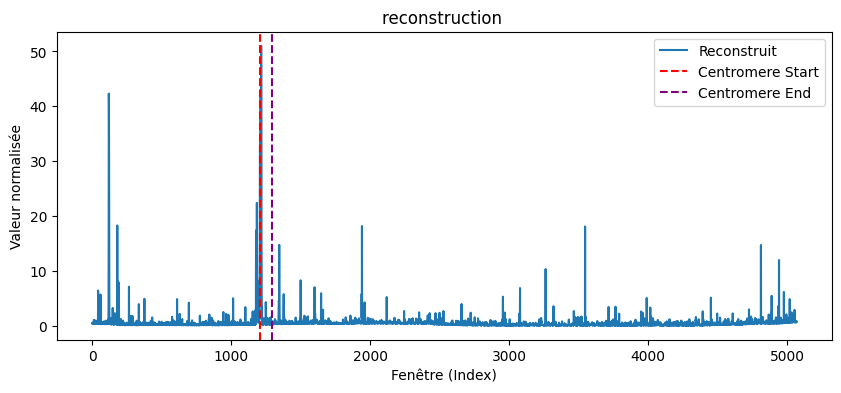

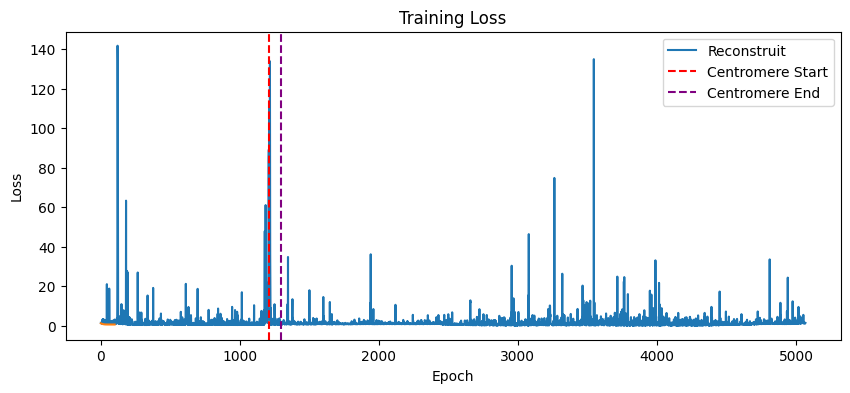

[[<tf.Tensor: shape=(2590,), dtype=float32, numpy=
array([0.31590226, 0.31316087, 0.35751274, ..., 3.9437532 , 0.4415097 ,
       2.143604  ], dtype=float32)>, array([ 0.7704763,  0.7634586,  0.871963 , ..., 17.469673 ,  1.9557719,
        9.495667 ], dtype=float32)], [<tf.Tensor: shape=(3458,), dtype=float32, numpy=
array([0.84758735, 0.75183105, 0.78168184, ..., 0.8472217 , 0.73171717,
       0.69455117], dtype=float32)>, array([1.0952119, 0.9719387, 1.0110059, ..., 1.5214452, 1.3135943,
       1.2464677], dtype=float32)], [<tf.Tensor: shape=(3746,), dtype=float32, numpy=
array([0.30874923, 0.40268493, 0.3191041 , ..., 1.4542493 , 1.4084473 ,
       1.4887613 ], dtype=float32)>, array([0.78956646, 1.0295734 , 0.8157056 , ..., 1.2307026 , 1.1916574 ,
       1.2593096 ], dtype=float32)], [<tf.Tensor: shape=(4629,), dtype=float32, numpy=
array([0.52157134, 0.62983674, 0.6286797 , ..., 0.90355587, 0.779844  ,
       0.738602  ], dtype=float32)>, array([0.97224534, 1.1746576 , 1.1730971 ,

  8%|███▍                                       | 8/100 [00:00<00:02, 38.10it/s]

Epoch 1, Loss: 1.2698553800582886
Epoch 2, Loss: 1.2320512533187866
Epoch 3, Loss: 1.1944270133972168
Epoch 4, Loss: 1.158061146736145
Epoch 5, Loss: 1.123725414276123
Epoch 6, Loss: 1.0915403366088867
Epoch 7, Loss: 1.0613243579864502
Epoch 8, Loss: 1.0328359603881836


 16%|██████▋                                   | 16/100 [00:00<00:02, 38.24it/s]

Epoch 9, Loss: 1.0058696269989014
Epoch 10, Loss: 0.9803070425987244
Epoch 11, Loss: 0.9560630917549133
Epoch 12, Loss: 0.9330322742462158
Epoch 13, Loss: 0.9111220240592957
Epoch 14, Loss: 0.8902660012245178
Epoch 15, Loss: 0.8704012632369995
Epoch 16, Loss: 0.8514727354049683


 24%|██████████                                | 24/100 [00:00<00:01, 38.75it/s]

Epoch 17, Loss: 0.833443820476532
Epoch 18, Loss: 0.8163064122200012
Epoch 19, Loss: 0.8000317215919495
Epoch 20, Loss: 0.7845932841300964
Epoch 21, Loss: 0.7699620723724365
Epoch 22, Loss: 0.7561177611351013
Epoch 23, Loss: 0.7430369257926941
Epoch 24, Loss: 0.7306919097900391


 32%|█████████████▍                            | 32/100 [00:00<00:01, 38.91it/s]

Epoch 25, Loss: 0.7190600037574768
Epoch 26, Loss: 0.7081149816513062
Epoch 27, Loss: 0.6978431940078735
Epoch 28, Loss: 0.6882373690605164
Epoch 29, Loss: 0.6792879104614258
Epoch 30, Loss: 0.6709877252578735
Epoch 31, Loss: 0.6633235812187195
Epoch 32, Loss: 0.6562780141830444


 40%|████████████████▊                         | 40/100 [00:01<00:01, 39.06it/s]

Epoch 33, Loss: 0.6498308777809143
Epoch 34, Loss: 0.643962025642395
Epoch 35, Loss: 0.6386480927467346
Epoch 36, Loss: 0.6338557004928589
Epoch 37, Loss: 0.6295501589775085
Epoch 38, Loss: 0.6256963610649109
Epoch 39, Loss: 0.622256875038147
Epoch 40, Loss: 0.6191908717155457


 49%|████████████████████▌                     | 49/100 [00:01<00:01, 39.39it/s]

Epoch 41, Loss: 0.6164608001708984
Epoch 42, Loss: 0.6140291690826416
Epoch 43, Loss: 0.6118596792221069
Epoch 44, Loss: 0.6099177598953247
Epoch 45, Loss: 0.6081734299659729
Epoch 46, Loss: 0.6065998077392578
Epoch 47, Loss: 0.605174720287323
Epoch 48, Loss: 0.6038773655891418
Epoch 49, Loss: 0.6026909351348877


 57%|███████████████████████▉                  | 57/100 [00:01<00:01, 39.06it/s]

Epoch 50, Loss: 0.6016008853912354
Epoch 51, Loss: 0.600594699382782
Epoch 52, Loss: 0.599662184715271
Epoch 53, Loss: 0.5987960696220398
Epoch 54, Loss: 0.5979898571968079
Epoch 55, Loss: 0.5972380638122559
Epoch 56, Loss: 0.5965364575386047
Epoch 57, Loss: 0.5958813428878784


 66%|███████████████████████████▋              | 66/100 [00:01<00:00, 39.46it/s]

Epoch 58, Loss: 0.5952697992324829
Epoch 59, Loss: 0.594699501991272
Epoch 60, Loss: 0.5941676497459412
Epoch 61, Loss: 0.593671977519989
Epoch 62, Loss: 0.5932101011276245
Epoch 63, Loss: 0.592779815196991
Epoch 64, Loss: 0.5923787355422974
Epoch 65, Loss: 0.5920045971870422
Epoch 66, Loss: 0.5916549563407898


 74%|███████████████████████████████           | 74/100 [00:01<00:00, 39.42it/s]

Epoch 67, Loss: 0.5913275480270386
Epoch 68, Loss: 0.5910202264785767
Epoch 69, Loss: 0.590731143951416
Epoch 70, Loss: 0.5904582738876343
Epoch 71, Loss: 0.5901997089385986
Epoch 72, Loss: 0.5899539589881897
Epoch 73, Loss: 0.5897195339202881
Epoch 74, Loss: 0.5894953608512878


 82%|██████████████████████████████████▍       | 82/100 [00:02<00:00, 38.71it/s]

Epoch 75, Loss: 0.5892803072929382
Epoch 76, Loss: 0.5890735387802124
Epoch 77, Loss: 0.5888741612434387
Epoch 78, Loss: 0.5886815786361694
Epoch 79, Loss: 0.5884953737258911
Epoch 80, Loss: 0.5883150696754456
Epoch 81, Loss: 0.5881405472755432
Epoch 82, Loss: 0.5879714488983154


 90%|█████████████████████████████████████▊    | 90/100 [00:02<00:00, 38.77it/s]

Epoch 83, Loss: 0.5878077149391174
Epoch 84, Loss: 0.5876487493515015
Epoch 85, Loss: 0.5874946713447571
Epoch 86, Loss: 0.5873450636863708
Epoch 87, Loss: 0.5872002243995667
Epoch 88, Loss: 0.5870597958564758
Epoch 89, Loss: 0.5869234800338745
Epoch 90, Loss: 0.586791455745697


 98%|█████████████████████████████████████████▏| 98/100 [00:02<00:00, 38.65it/s]

Epoch 91, Loss: 0.5866636633872986
Epoch 92, Loss: 0.5865398645401001
Epoch 93, Loss: 0.5864197015762329
Epoch 94, Loss: 0.5863032341003418
Epoch 95, Loss: 0.5861900448799133
Epoch 96, Loss: 0.5860801339149475
Epoch 97, Loss: 0.5859735608100891
Epoch 98, Loss: 0.5858698487281799


100%|█████████████████████████████████████████| 100/100 [00:02<00:00, 38.77it/s]


Epoch 99, Loss: 0.5857690572738647
Epoch 100, Loss: 0.5856711268424988


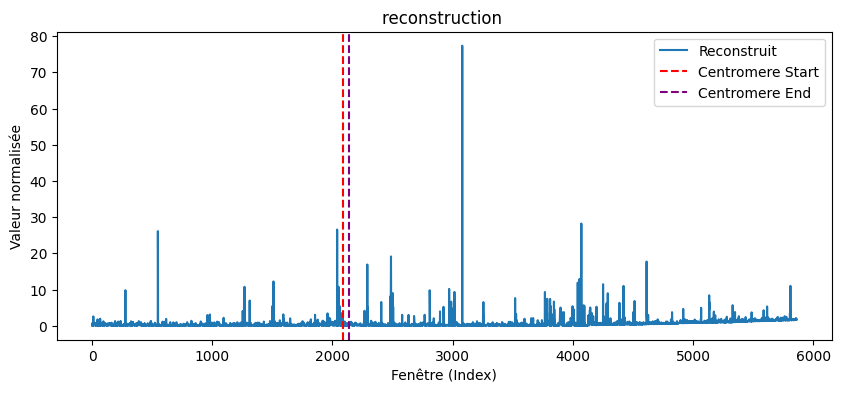

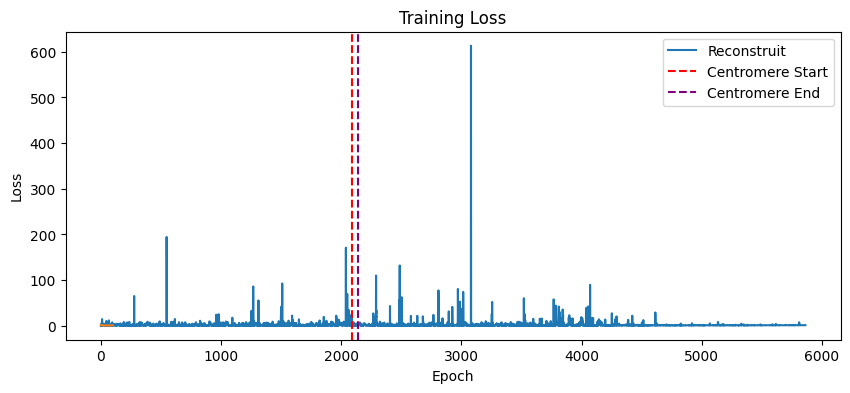

[[<tf.Tensor: shape=(2590,), dtype=float32, numpy=
array([0.31590226, 0.31316087, 0.35751274, ..., 3.9437532 , 0.4415097 ,
       2.143604  ], dtype=float32)>, array([ 0.7704763,  0.7634586,  0.871963 , ..., 17.469673 ,  1.9557719,
        9.495667 ], dtype=float32)], [<tf.Tensor: shape=(3458,), dtype=float32, numpy=
array([0.84758735, 0.75183105, 0.78168184, ..., 0.8472217 , 0.73171717,
       0.69455117], dtype=float32)>, array([1.0952119, 0.9719387, 1.0110059, ..., 1.5214452, 1.3135943,
       1.2464677], dtype=float32)], [<tf.Tensor: shape=(3746,), dtype=float32, numpy=
array([0.30874923, 0.40268493, 0.3191041 , ..., 1.4542493 , 1.4084473 ,
       1.4887613 ], dtype=float32)>, array([0.78956646, 1.0295734 , 0.8157056 , ..., 1.2307026 , 1.1916574 ,
       1.2593096 ], dtype=float32)], [<tf.Tensor: shape=(4629,), dtype=float32, numpy=
array([0.52157134, 0.62983674, 0.6286797 , ..., 0.90355587, 0.779844  ,
       0.738602  ], dtype=float32)>, array([0.97224534, 1.1746576 , 1.1730971 ,

  9%|███▊                                       | 9/100 [00:00<00:02, 38.12it/s]

Epoch 1, Loss: 1.2768001556396484
Epoch 2, Loss: 1.2351419925689697
Epoch 3, Loss: 1.1949357986450195
Epoch 4, Loss: 1.1563489437103271
Epoch 5, Loss: 1.119388222694397
Epoch 6, Loss: 1.0840082168579102
Epoch 7, Loss: 1.0501432418823242
Epoch 8, Loss: 1.0177531242370605
Epoch 9, Loss: 0.9867466688156128


 17%|███████▏                                  | 17/100 [00:00<00:02, 38.50it/s]

Epoch 10, Loss: 0.95708829164505
Epoch 11, Loss: 0.9287888407707214
Epoch 12, Loss: 0.901868462562561
Epoch 13, Loss: 0.8763843178749084
Epoch 14, Loss: 0.852300763130188
Epoch 15, Loss: 0.8295671343803406
Epoch 16, Loss: 0.8081658482551575
Epoch 17, Loss: 0.788077712059021


 25%|██████████▌                               | 25/100 [00:00<00:01, 38.83it/s]

Epoch 18, Loss: 0.7692905068397522
Epoch 19, Loss: 0.7517871260643005
Epoch 20, Loss: 0.7355479001998901
Epoch 21, Loss: 0.7205372452735901
Epoch 22, Loss: 0.706718385219574
Epoch 23, Loss: 0.6940418481826782
Epoch 24, Loss: 0.6824435591697693
Epoch 25, Loss: 0.6718538403511047


 33%|█████████████▊                            | 33/100 [00:00<00:01, 38.91it/s]

Epoch 26, Loss: 0.6621983647346497
Epoch 27, Loss: 0.6534032821655273
Epoch 28, Loss: 0.6453955769538879
Epoch 29, Loss: 0.6381016373634338
Epoch 30, Loss: 0.631452739238739
Epoch 31, Loss: 0.6253822445869446
Epoch 32, Loss: 0.6198320984840393
Epoch 33, Loss: 0.6147481799125671


 41%|█████████████████▏                        | 41/100 [00:01<00:01, 39.16it/s]

Epoch 34, Loss: 0.6100805401802063
Epoch 35, Loss: 0.6057838797569275
Epoch 36, Loss: 0.6018155217170715
Epoch 37, Loss: 0.5981433391571045
Epoch 38, Loss: 0.5947365164756775
Epoch 39, Loss: 0.5915689468383789
Epoch 40, Loss: 0.5886169075965881
Epoch 41, Loss: 0.5858609080314636


 49%|████████████████████▌                     | 49/100 [00:01<00:01, 39.20it/s]

Epoch 42, Loss: 0.583284854888916
Epoch 43, Loss: 0.5808747410774231
Epoch 44, Loss: 0.5786193013191223
Epoch 45, Loss: 0.5765101909637451
Epoch 46, Loss: 0.5745389461517334
Epoch 47, Loss: 0.5726985335350037
Epoch 48, Loss: 0.5709832310676575
Epoch 49, Loss: 0.5693870782852173


 57%|███████████████████████▉                  | 57/100 [00:01<00:01, 39.02it/s]

Epoch 50, Loss: 0.5679036974906921
Epoch 51, Loss: 0.5665278434753418
Epoch 52, Loss: 0.5652536749839783
Epoch 53, Loss: 0.5640753507614136
Epoch 54, Loss: 0.5629870891571045
Epoch 55, Loss: 0.5619831085205078
Epoch 56, Loss: 0.5610570907592773
Epoch 57, Loss: 0.5602033734321594


 65%|███████████████████████████▎              | 65/100 [00:01<00:00, 39.04it/s]

Epoch 58, Loss: 0.5594160556793213
Epoch 59, Loss: 0.5586894750595093
Epoch 60, Loss: 0.5580180287361145
Epoch 61, Loss: 0.5573964715003967
Epoch 62, Loss: 0.55681973695755
Epoch 63, Loss: 0.5562830567359924
Epoch 64, Loss: 0.5557824969291687
Epoch 65, Loss: 0.5553141832351685
Epoch 66, Loss: 0.55487459897995


 73%|██████████████████████████████▋           | 73/100 [00:01<00:00, 38.90it/s]

Epoch 67, Loss: 0.5544607639312744
Epoch 68, Loss: 0.5540699362754822
Epoch 69, Loss: 0.553699791431427
Epoch 70, Loss: 0.5533484816551208
Epoch 71, Loss: 0.5530140995979309
Epoch 72, Loss: 0.5526955127716064
Epoch 73, Loss: 0.552391529083252
Epoch 74, Loss: 0.5521013140678406


 81%|██████████████████████████████████        | 81/100 [00:02<00:00, 38.96it/s]

Epoch 75, Loss: 0.5518240332603455
Epoch 76, Loss: 0.5515590906143188
Epoch 77, Loss: 0.5513059496879578
Epoch 78, Loss: 0.5510640740394592
Epoch 79, Loss: 0.5508328676223755
Epoch 80, Loss: 0.5506117343902588
Epoch 81, Loss: 0.5504002571105957
Epoch 82, Loss: 0.5501978993415833


 89%|█████████████████████████████████████▍    | 89/100 [00:02<00:00, 38.86it/s]

Epoch 83, Loss: 0.5500043034553528
Epoch 84, Loss: 0.5498190522193909
Epoch 85, Loss: 0.5496415495872498
Epoch 86, Loss: 0.5494714975357056
Epoch 87, Loss: 0.5493082404136658
Epoch 88, Loss: 0.5491514801979065
Epoch 89, Loss: 0.54900062084198
Epoch 90, Loss: 0.5488553643226624


 97%|████████████████████████████████████████▋ | 97/100 [00:02<00:00, 39.04it/s]

Epoch 91, Loss: 0.5487155914306641
Epoch 92, Loss: 0.5485807061195374
Epoch 93, Loss: 0.5484505891799927
Epoch 94, Loss: 0.5483250021934509
Epoch 95, Loss: 0.5482033491134644
Epoch 96, Loss: 0.5480858087539673
Epoch 97, Loss: 0.5479719042778015
Epoch 98, Loss: 0.5478614568710327
Epoch 99, Loss: 0.5477544069290161


100%|█████████████████████████████████████████| 100/100 [00:02<00:00, 38.86it/s]


Epoch 100, Loss: 0.5476506352424622


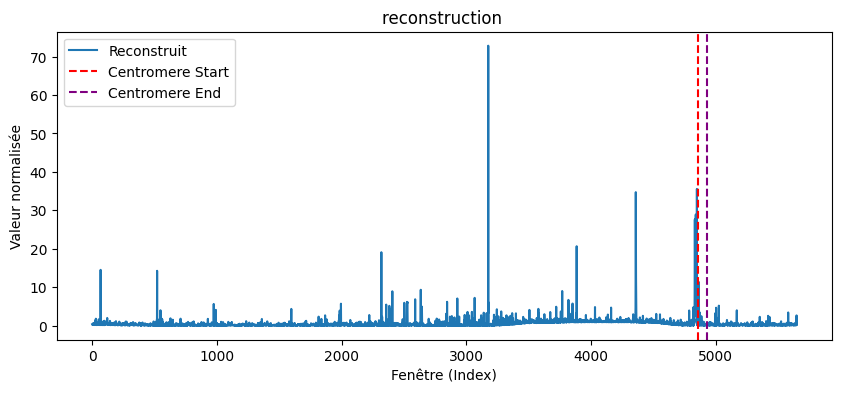

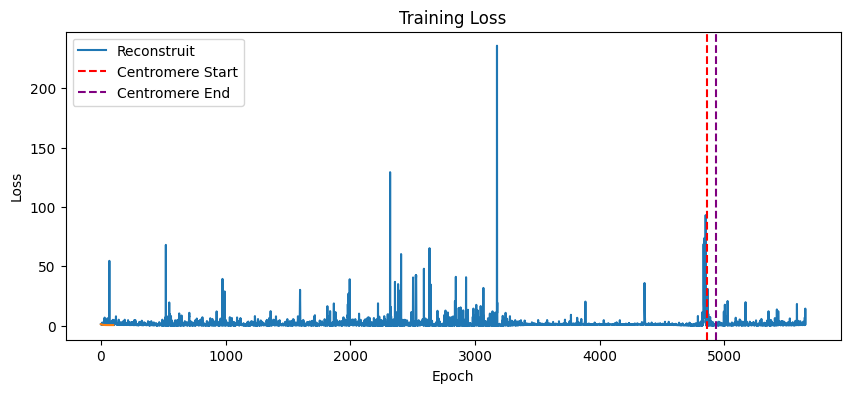

[[<tf.Tensor: shape=(2590,), dtype=float32, numpy=
array([0.31590226, 0.31316087, 0.35751274, ..., 3.9437532 , 0.4415097 ,
       2.143604  ], dtype=float32)>, array([ 0.7704763,  0.7634586,  0.871963 , ..., 17.469673 ,  1.9557719,
        9.495667 ], dtype=float32)], [<tf.Tensor: shape=(3458,), dtype=float32, numpy=
array([0.84758735, 0.75183105, 0.78168184, ..., 0.8472217 , 0.73171717,
       0.69455117], dtype=float32)>, array([1.0952119, 0.9719387, 1.0110059, ..., 1.5214452, 1.3135943,
       1.2464677], dtype=float32)], [<tf.Tensor: shape=(3746,), dtype=float32, numpy=
array([0.30874923, 0.40268493, 0.3191041 , ..., 1.4542493 , 1.4084473 ,
       1.4887613 ], dtype=float32)>, array([0.78956646, 1.0295734 , 0.8157056 , ..., 1.2307026 , 1.1916574 ,
       1.2593096 ], dtype=float32)], [<tf.Tensor: shape=(4629,), dtype=float32, numpy=
array([0.52157134, 0.62983674, 0.6286797 , ..., 0.90355587, 0.779844  ,
       0.738602  ], dtype=float32)>, array([0.97224534, 1.1746576 , 1.1730971 ,

  8%|███▍                                       | 8/100 [00:00<00:02, 38.01it/s]

Epoch 1, Loss: 1.2368656396865845
Epoch 2, Loss: 1.1909751892089844
Epoch 3, Loss: 1.14682936668396
Epoch 4, Loss: 1.10494065284729
Epoch 5, Loss: 1.065524935722351
Epoch 6, Loss: 1.0286928415298462
Epoch 7, Loss: 0.9944037199020386
Epoch 8, Loss: 0.9625592231750488
Epoch 9, Loss: 0.9330160021781921


 16%|██████▋                                   | 16/100 [00:00<00:02, 38.86it/s]

Epoch 10, Loss: 0.9056694507598877
Epoch 11, Loss: 0.8803907036781311
Epoch 12, Loss: 0.857029378414154
Epoch 13, Loss: 0.8354350328445435
Epoch 14, Loss: 0.8155357837677002
Epoch 15, Loss: 0.7972074747085571
Epoch 16, Loss: 0.7803972959518433
Epoch 17, Loss: 0.7650104761123657


 24%|██████████                                | 24/100 [00:00<00:01, 38.98it/s]

Epoch 18, Loss: 0.7509546279907227
Epoch 19, Loss: 0.7381322979927063
Epoch 20, Loss: 0.7264554500579834
Epoch 21, Loss: 0.7158448100090027
Epoch 22, Loss: 0.7062174081802368
Epoch 23, Loss: 0.6974915266036987
Epoch 24, Loss: 0.6895934343338013
Epoch 25, Loss: 0.6824536323547363


 32%|█████████████▍                            | 32/100 [00:00<00:01, 39.13it/s]

Epoch 26, Loss: 0.6760030388832092
Epoch 27, Loss: 0.670178234577179
Epoch 28, Loss: 0.6649197340011597
Epoch 29, Loss: 0.6601727604866028
Epoch 30, Loss: 0.655883252620697
Epoch 31, Loss: 0.6520043015480042
Epoch 32, Loss: 0.6484920978546143
Epoch 33, Loss: 0.6453052759170532


 40%|████████████████▊                         | 40/100 [00:01<00:01, 39.30it/s]

Epoch 34, Loss: 0.6424072980880737
Epoch 35, Loss: 0.6397652626037598
Epoch 36, Loss: 0.6373491287231445
Epoch 37, Loss: 0.6351330876350403
Epoch 38, Loss: 0.633093535900116
Epoch 39, Loss: 0.6312107443809509
Epoch 40, Loss: 0.629467248916626
Epoch 41, Loss: 0.6278475522994995


 48%|████████████████████▏                     | 48/100 [00:01<00:01, 38.91it/s]

Epoch 42, Loss: 0.6263380646705627
Epoch 43, Loss: 0.6249272227287292
Epoch 44, Loss: 0.6236055493354797
Epoch 45, Loss: 0.62236487865448
Epoch 46, Loss: 0.6211980581283569
Epoch 47, Loss: 0.6200993657112122
Epoch 48, Loss: 0.6190643310546875
Epoch 49, Loss: 0.6180890202522278


 56%|███████████████████████▌                  | 56/100 [00:01<00:01, 39.02it/s]

Epoch 50, Loss: 0.6171701550483704
Epoch 51, Loss: 0.6163049340248108
Epoch 52, Loss: 0.6154906749725342
Epoch 53, Loss: 0.6147250533103943
Epoch 54, Loss: 0.6140058040618896
Epoch 55, Loss: 0.613330066204071
Epoch 56, Loss: 0.6126959919929504
Epoch 57, Loss: 0.6121010184288025


 64%|██████████████████████████▉               | 64/100 [00:01<00:00, 38.63it/s]

Epoch 58, Loss: 0.6115431189537048
Epoch 59, Loss: 0.6110194325447083
Epoch 60, Loss: 0.6105276942253113
Epoch 61, Loss: 0.6100658774375916
Epoch 62, Loss: 0.6096314787864685
Epoch 63, Loss: 0.6092225313186646
Epoch 64, Loss: 0.6088367700576782
Epoch 65, Loss: 0.608472466468811


 72%|██████████████████████████████▏           | 72/100 [00:01<00:00, 39.02it/s]

Epoch 66, Loss: 0.6081278324127197
Epoch 67, Loss: 0.6078008413314819
Epoch 68, Loss: 0.6074902415275574
Epoch 69, Loss: 0.6071946620941162
Epoch 70, Loss: 0.6069130301475525
Epoch 71, Loss: 0.6066443920135498
Epoch 72, Loss: 0.6063874959945679
Epoch 73, Loss: 0.606141209602356


 80%|█████████████████████████████████▌        | 80/100 [00:02<00:00, 38.44it/s]

Epoch 74, Loss: 0.6059051752090454
Epoch 75, Loss: 0.6056784391403198
Epoch 76, Loss: 0.6054604053497314
Epoch 77, Loss: 0.605250358581543
Epoch 78, Loss: 0.6050477623939514
Epoch 79, Loss: 0.6048521995544434
Epoch 80, Loss: 0.6046631932258606
Epoch 81, Loss: 0.6044806241989136


 88%|████████████████████████████████████▉     | 88/100 [00:02<00:00, 38.37it/s]

Epoch 82, Loss: 0.6043041944503784
Epoch 83, Loss: 0.6041337251663208
Epoch 84, Loss: 0.6039689183235168
Epoch 85, Loss: 0.6038092970848083
Epoch 86, Loss: 0.6036549806594849
Epoch 87, Loss: 0.6035056710243225
Epoch 88, Loss: 0.6033611297607422
Epoch 89, Loss: 0.6032211184501648


 96%|████████████████████████████████████████▎ | 96/100 [00:02<00:00, 38.80it/s]

Epoch 90, Loss: 0.6030855178833008
Epoch 91, Loss: 0.6029542684555054
Epoch 92, Loss: 0.6028271913528442
Epoch 93, Loss: 0.6027043461799622
Epoch 94, Loss: 0.6025854349136353
Epoch 95, Loss: 0.6024700999259949
Epoch 96, Loss: 0.6023584008216858
Epoch 97, Loss: 0.6022501587867737
Epoch 98, Loss: 0.6021453738212585


100%|█████████████████████████████████████████| 100/100 [00:02<00:00, 38.72it/s]


Epoch 99, Loss: 0.6020436882972717
Epoch 100, Loss: 0.601945161819458


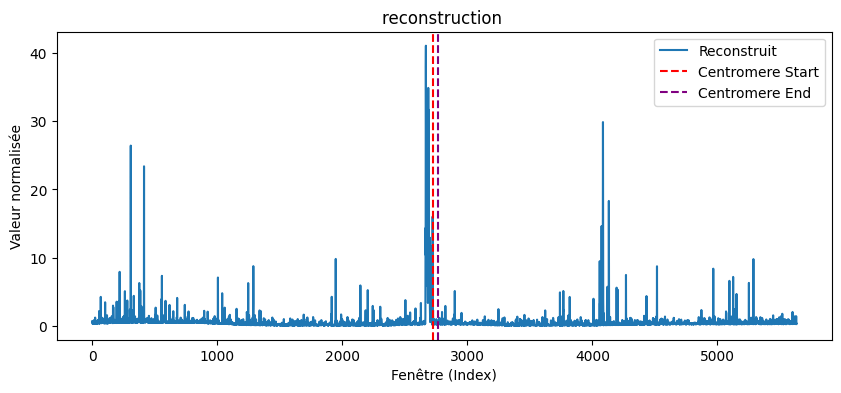

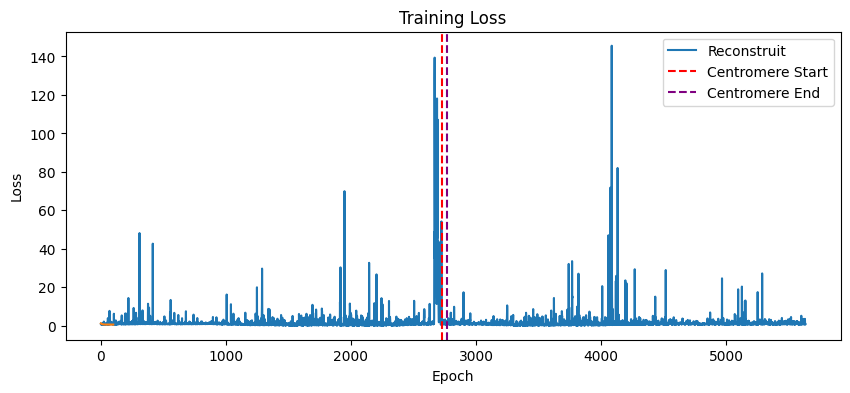

[[<tf.Tensor: shape=(2590,), dtype=float32, numpy=
array([0.31590226, 0.31316087, 0.35751274, ..., 3.9437532 , 0.4415097 ,
       2.143604  ], dtype=float32)>, array([ 0.7704763,  0.7634586,  0.871963 , ..., 17.469673 ,  1.9557719,
        9.495667 ], dtype=float32)], [<tf.Tensor: shape=(3458,), dtype=float32, numpy=
array([0.84758735, 0.75183105, 0.78168184, ..., 0.8472217 , 0.73171717,
       0.69455117], dtype=float32)>, array([1.0952119, 0.9719387, 1.0110059, ..., 1.5214452, 1.3135943,
       1.2464677], dtype=float32)], [<tf.Tensor: shape=(3746,), dtype=float32, numpy=
array([0.30874923, 0.40268493, 0.3191041 , ..., 1.4542493 , 1.4084473 ,
       1.4887613 ], dtype=float32)>, array([0.78956646, 1.0295734 , 0.8157056 , ..., 1.2307026 , 1.1916574 ,
       1.2593096 ], dtype=float32)], [<tf.Tensor: shape=(4629,), dtype=float32, numpy=
array([0.52157134, 0.62983674, 0.6286797 , ..., 0.90355587, 0.779844  ,
       0.738602  ], dtype=float32)>, array([0.97224534, 1.1746576 , 1.1730971 ,

  8%|███▍                                       | 8/100 [00:00<00:02, 38.17it/s]

Epoch 1, Loss: 1.2700226306915283
Epoch 2, Loss: 1.232583999633789
Epoch 3, Loss: 1.1959277391433716
Epoch 4, Loss: 1.1601521968841553
Epoch 5, Loss: 1.1253595352172852
Epoch 6, Loss: 1.0916508436203003
Epoch 7, Loss: 1.0590461492538452
Epoch 8, Loss: 1.0276122093200684
Epoch 9, Loss: 0.9973939061164856


 16%|██████▋                                   | 16/100 [00:00<00:02, 38.73it/s]

Epoch 10, Loss: 0.968284547328949
Epoch 11, Loss: 0.9402580857276917
Epoch 12, Loss: 0.9132909178733826
Epoch 13, Loss: 0.8874909281730652
Epoch 14, Loss: 0.8630204200744629
Epoch 15, Loss: 0.8399888873100281
Epoch 16, Loss: 0.8184811472892761
Epoch 17, Loss: 0.7985607981681824


 24%|██████████                                | 24/100 [00:00<00:01, 38.92it/s]

Epoch 18, Loss: 0.7802263498306274
Epoch 19, Loss: 0.763458251953125
Epoch 20, Loss: 0.7482025623321533
Epoch 21, Loss: 0.7343983054161072
Epoch 22, Loss: 0.7219588160514832
Epoch 23, Loss: 0.7107852697372437
Epoch 24, Loss: 0.7007717490196228
Epoch 25, Loss: 0.6918041110038757


 32%|█████████████▍                            | 32/100 [00:00<00:01, 38.64it/s]

Epoch 26, Loss: 0.683775782585144
Epoch 27, Loss: 0.6765787601470947
Epoch 28, Loss: 0.6701192259788513
Epoch 29, Loss: 0.6643100380897522
Epoch 30, Loss: 0.6590723991394043
Epoch 31, Loss: 0.654336154460907
Epoch 32, Loss: 0.6500406861305237
Epoch 33, Loss: 0.6461312770843506


 40%|████████████████▊                         | 40/100 [00:01<00:01, 39.04it/s]

Epoch 34, Loss: 0.6425644159317017
Epoch 35, Loss: 0.6393017768859863
Epoch 36, Loss: 0.6363112926483154
Epoch 37, Loss: 0.6335668563842773
Epoch 38, Loss: 0.6310444474220276
Epoch 39, Loss: 0.6287243366241455
Epoch 40, Loss: 0.6265890598297119
Epoch 41, Loss: 0.6246229410171509


 48%|████████████████████▏                     | 48/100 [00:01<00:01, 39.23it/s]

Epoch 42, Loss: 0.6228119134902954
Epoch 43, Loss: 0.6211434602737427
Epoch 44, Loss: 0.6196056008338928
Epoch 45, Loss: 0.6181886196136475
Epoch 46, Loss: 0.6168823838233948
Epoch 47, Loss: 0.6156774163246155
Epoch 48, Loss: 0.6145642995834351
Epoch 49, Loss: 0.6135334372520447


 56%|███████████████████████▌                  | 56/100 [00:01<00:01, 38.78it/s]

Epoch 50, Loss: 0.6125780940055847
Epoch 51, Loss: 0.6116922497749329
Epoch 52, Loss: 0.6108690500259399
Epoch 53, Loss: 0.6101022958755493
Epoch 54, Loss: 0.6093862652778625
Epoch 55, Loss: 0.6087153553962708
Epoch 56, Loss: 0.6080848574638367
Epoch 57, Loss: 0.6074905395507812


 64%|██████████████████████████▉               | 64/100 [00:01<00:00, 38.85it/s]

Epoch 58, Loss: 0.6069294214248657
Epoch 59, Loss: 0.6063987612724304
Epoch 60, Loss: 0.6058964729309082
Epoch 61, Loss: 0.6054198741912842
Epoch 62, Loss: 0.6049681901931763
Epoch 63, Loss: 0.6045386791229248
Epoch 64, Loss: 0.6041297912597656
Epoch 65, Loss: 0.6037421822547913


 72%|██████████████████████████████▏           | 72/100 [00:01<00:00, 38.68it/s]

Epoch 66, Loss: 0.6033744812011719
Epoch 67, Loss: 0.6030251979827881
Epoch 68, Loss: 0.6026934385299683
Epoch 69, Loss: 0.6023781299591064
Epoch 70, Loss: 0.6020779013633728
Epoch 71, Loss: 0.6017922163009644
Epoch 72, Loss: 0.6015199422836304
Epoch 73, Loss: 0.6012601852416992


 80%|█████████████████████████████████▌        | 80/100 [00:02<00:00, 38.56it/s]

Epoch 74, Loss: 0.6010118722915649
Epoch 75, Loss: 0.6007746458053589
Epoch 76, Loss: 0.600547730922699
Epoch 77, Loss: 0.6003305912017822
Epoch 78, Loss: 0.6001225113868713
Epoch 79, Loss: 0.5999230146408081
Epoch 80, Loss: 0.5997315645217896
Epoch 81, Loss: 0.5995477437973022


 89%|█████████████████████████████████████▍    | 89/100 [00:02<00:00, 39.05it/s]

Epoch 82, Loss: 0.5993708372116089
Epoch 83, Loss: 0.5992004871368408
Epoch 84, Loss: 0.5990362167358398
Epoch 85, Loss: 0.5988779067993164
Epoch 86, Loss: 0.5987249612808228
Epoch 87, Loss: 0.5985772609710693
Epoch 88, Loss: 0.5984344482421875
Epoch 89, Loss: 0.5982964038848877


 97%|████████████████████████████████████████▋ | 97/100 [00:02<00:00, 39.19it/s]

Epoch 90, Loss: 0.5981630682945251
Epoch 91, Loss: 0.5980338454246521
Epoch 92, Loss: 0.5979086756706238
Epoch 93, Loss: 0.5977874398231506
Epoch 94, Loss: 0.597669780254364
Epoch 95, Loss: 0.5975558161735535
Epoch 96, Loss: 0.5974451303482056
Epoch 97, Loss: 0.5973376035690308


100%|█████████████████████████████████████████| 100/100 [00:02<00:00, 38.80it/s]


Epoch 98, Loss: 0.59723299741745
Epoch 99, Loss: 0.5971313714981079
Epoch 100, Loss: 0.5970322489738464


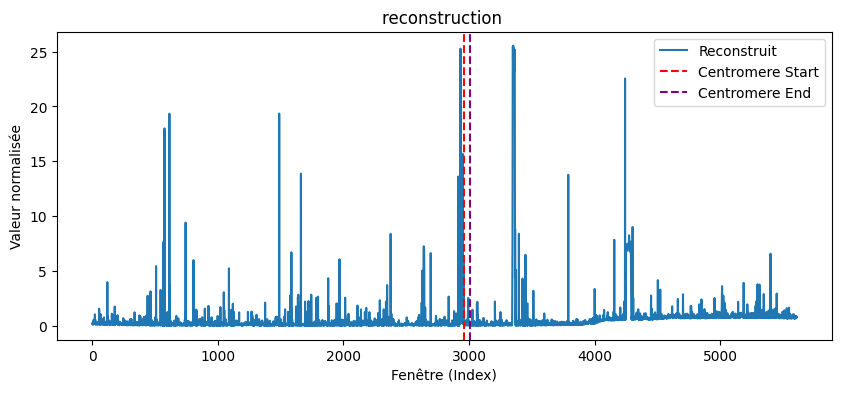

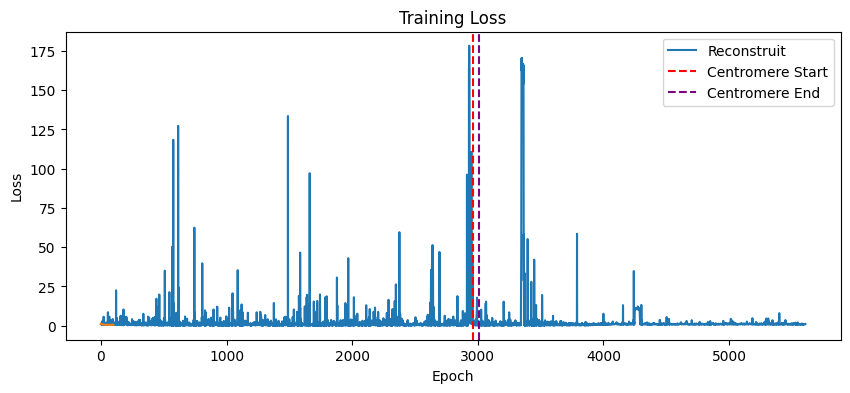

[[<tf.Tensor: shape=(2590,), dtype=float32, numpy=
array([0.31590226, 0.31316087, 0.35751274, ..., 3.9437532 , 0.4415097 ,
       2.143604  ], dtype=float32)>, array([ 0.7704763,  0.7634586,  0.871963 , ..., 17.469673 ,  1.9557719,
        9.495667 ], dtype=float32)], [<tf.Tensor: shape=(3458,), dtype=float32, numpy=
array([0.84758735, 0.75183105, 0.78168184, ..., 0.8472217 , 0.73171717,
       0.69455117], dtype=float32)>, array([1.0952119, 0.9719387, 1.0110059, ..., 1.5214452, 1.3135943,
       1.2464677], dtype=float32)], [<tf.Tensor: shape=(3746,), dtype=float32, numpy=
array([0.30874923, 0.40268493, 0.3191041 , ..., 1.4542493 , 1.4084473 ,
       1.4887613 ], dtype=float32)>, array([0.78956646, 1.0295734 , 0.8157056 , ..., 1.2307026 , 1.1916574 ,
       1.2593096 ], dtype=float32)], [<tf.Tensor: shape=(4629,), dtype=float32, numpy=
array([0.52157134, 0.62983674, 0.6286797 , ..., 0.90355587, 0.779844  ,
       0.738602  ], dtype=float32)>, array([0.97224534, 1.1746576 , 1.1730971 ,

  8%|███▍                                       | 8/100 [00:00<00:02, 37.03it/s]

Epoch 1, Loss: 1.3548816442489624
Epoch 2, Loss: 1.315376877784729
Epoch 3, Loss: 1.2773271799087524
Epoch 4, Loss: 1.2407912015914917
Epoch 5, Loss: 1.2058022022247314
Epoch 6, Loss: 1.1723837852478027
Epoch 7, Loss: 1.1405012607574463
Epoch 8, Loss: 1.110110878944397


 16%|██████▋                                   | 16/100 [00:00<00:02, 37.56it/s]

Epoch 9, Loss: 1.0811606645584106
Epoch 10, Loss: 1.0536096096038818
Epoch 11, Loss: 1.0273175239562988
Epoch 12, Loss: 1.0021849870681763
Epoch 13, Loss: 0.978146493434906
Epoch 14, Loss: 0.9551408886909485
Epoch 15, Loss: 0.9331273436546326
Epoch 16, Loss: 0.9120798110961914


 24%|██████████                                | 24/100 [00:00<00:01, 38.20it/s]

Epoch 17, Loss: 0.8919815421104431
Epoch 18, Loss: 0.8728227615356445
Epoch 19, Loss: 0.8546127080917358
Epoch 20, Loss: 0.8373734951019287
Epoch 21, Loss: 0.8211421966552734
Epoch 22, Loss: 0.8059164881706238
Epoch 23, Loss: 0.7916966676712036
Epoch 24, Loss: 0.7785067558288574


 32%|█████████████▍                            | 32/100 [00:00<00:01, 38.24it/s]

Epoch 25, Loss: 0.7663288116455078
Epoch 26, Loss: 0.7551316618919373
Epoch 27, Loss: 0.7448707818984985
Epoch 28, Loss: 0.7354915142059326
Epoch 29, Loss: 0.7269343137741089
Epoch 30, Loss: 0.719132661819458
Epoch 31, Loss: 0.7120172381401062
Epoch 32, Loss: 0.7055202722549438


 40%|████████████████▊                         | 40/100 [00:01<00:01, 38.09it/s]

Epoch 33, Loss: 0.6995752453804016
Epoch 34, Loss: 0.6941197514533997
Epoch 35, Loss: 0.6890978217124939
Epoch 36, Loss: 0.684459388256073
Epoch 37, Loss: 0.6801626682281494
Epoch 38, Loss: 0.6761772632598877
Epoch 39, Loss: 0.6724823713302612
Epoch 40, Loss: 0.6690666675567627


 48%|████████████████████▏                     | 48/100 [00:01<00:01, 38.38it/s]

Epoch 41, Loss: 0.665921688079834
Epoch 42, Loss: 0.6630339026451111
Epoch 43, Loss: 0.6603839993476868
Epoch 44, Loss: 0.657950222492218
Epoch 45, Loss: 0.6557105183601379
Epoch 46, Loss: 0.6536446809768677
Epoch 47, Loss: 0.6517357230186462
Epoch 48, Loss: 0.6499685049057007


 56%|███████████████████████▌                  | 56/100 [00:01<00:01, 38.33it/s]

Epoch 49, Loss: 0.6483304500579834
Epoch 50, Loss: 0.64681077003479
Epoch 51, Loss: 0.6454005241394043
Epoch 52, Loss: 0.6440913081169128
Epoch 53, Loss: 0.6428757905960083
Epoch 54, Loss: 0.6417471766471863
Epoch 55, Loss: 0.6406998038291931
Epoch 56, Loss: 0.6397287249565125


 64%|██████████████████████████▉               | 64/100 [00:01<00:00, 38.61it/s]

Epoch 57, Loss: 0.6388296484947205
Epoch 58, Loss: 0.6379989385604858
Epoch 59, Loss: 0.6372315883636475
Epoch 60, Loss: 0.6365219950675964
Epoch 61, Loss: 0.6358649730682373
Epoch 62, Loss: 0.6352548599243164
Epoch 63, Loss: 0.6346859931945801
Epoch 64, Loss: 0.6341535449028015


 72%|██████████████████████████████▏           | 72/100 [00:01<00:00, 38.41it/s]

Epoch 65, Loss: 0.6336538791656494
Epoch 66, Loss: 0.6331837177276611
Epoch 67, Loss: 0.6327409744262695
Epoch 68, Loss: 0.6323235630989075
Epoch 69, Loss: 0.6319295763969421
Epoch 70, Loss: 0.6315574645996094
Epoch 71, Loss: 0.631205677986145
Epoch 72, Loss: 0.6308719515800476


 80%|█████████████████████████████████▌        | 80/100 [00:02<00:00, 38.61it/s]

Epoch 73, Loss: 0.6305547952651978
Epoch 74, Loss: 0.6302523612976074
Epoch 75, Loss: 0.6299635767936707
Epoch 76, Loss: 0.629687488079071
Epoch 77, Loss: 0.6294233202934265
Epoch 78, Loss: 0.629170298576355
Epoch 79, Loss: 0.6289281249046326
Epoch 80, Loss: 0.6286964416503906


 88%|████████████████████████████████████▉     | 88/100 [00:02<00:00, 39.01it/s]

Epoch 81, Loss: 0.6284748315811157
Epoch 82, Loss: 0.6282634139060974
Epoch 83, Loss: 0.6280611753463745
Epoch 84, Loss: 0.6278676986694336
Epoch 85, Loss: 0.6276823878288269
Epoch 86, Loss: 0.6275047063827515
Epoch 87, Loss: 0.6273344159126282
Epoch 88, Loss: 0.627170979976654


 96%|████████████████████████████████████████▎ | 96/100 [00:02<00:00, 38.96it/s]

Epoch 89, Loss: 0.6270143389701843
Epoch 90, Loss: 0.6268641352653503
Epoch 91, Loss: 0.6267198324203491
Epoch 92, Loss: 0.6265813112258911
Epoch 93, Loss: 0.6264479756355286
Epoch 94, Loss: 0.6263197064399719
Epoch 95, Loss: 0.6261959075927734
Epoch 96, Loss: 0.6260764598846436


100%|█████████████████████████████████████████| 100/100 [00:02<00:00, 38.30it/s]


Epoch 97, Loss: 0.6259607672691345
Epoch 98, Loss: 0.6258487105369568
Epoch 99, Loss: 0.6257402896881104
Epoch 100, Loss: 0.6256349682807922


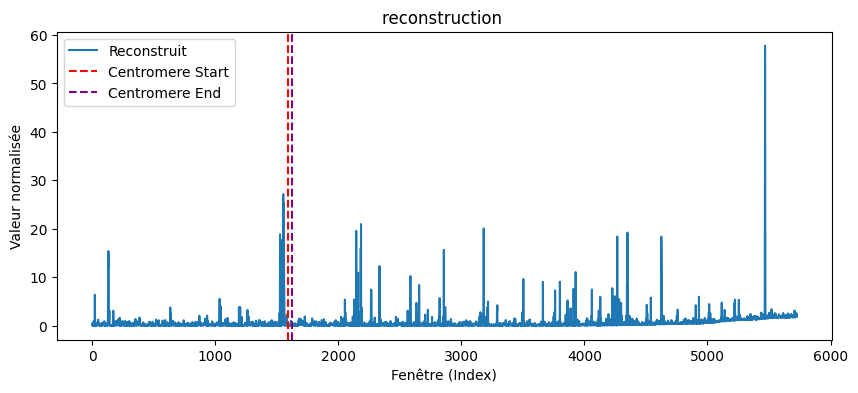

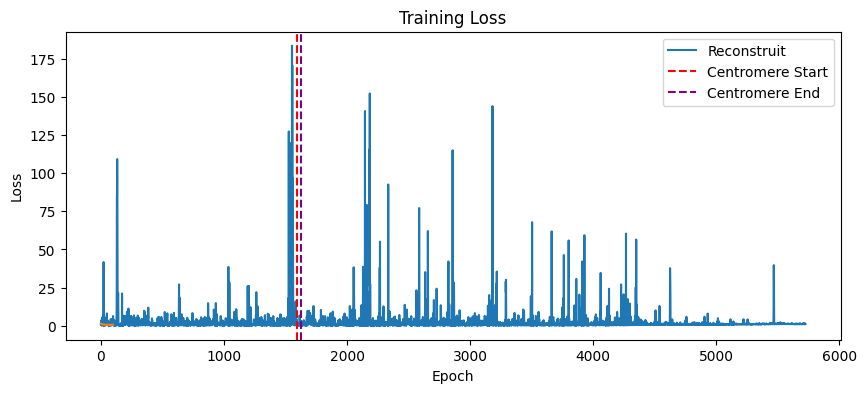

[[<tf.Tensor: shape=(2590,), dtype=float32, numpy=
array([0.31590226, 0.31316087, 0.35751274, ..., 3.9437532 , 0.4415097 ,
       2.143604  ], dtype=float32)>, array([ 0.7704763,  0.7634586,  0.871963 , ..., 17.469673 ,  1.9557719,
        9.495667 ], dtype=float32)], [<tf.Tensor: shape=(3458,), dtype=float32, numpy=
array([0.84758735, 0.75183105, 0.78168184, ..., 0.8472217 , 0.73171717,
       0.69455117], dtype=float32)>, array([1.0952119, 0.9719387, 1.0110059, ..., 1.5214452, 1.3135943,
       1.2464677], dtype=float32)], [<tf.Tensor: shape=(3746,), dtype=float32, numpy=
array([0.30874923, 0.40268493, 0.3191041 , ..., 1.4542493 , 1.4084473 ,
       1.4887613 ], dtype=float32)>, array([0.78956646, 1.0295734 , 0.8157056 , ..., 1.2307026 , 1.1916574 ,
       1.2593096 ], dtype=float32)], [<tf.Tensor: shape=(4629,), dtype=float32, numpy=
array([0.52157134, 0.62983674, 0.6286797 , ..., 0.90355587, 0.779844  ,
       0.738602  ], dtype=float32)>, array([0.97224534, 1.1746576 , 1.1730971 ,

  8%|███▍                                       | 8/100 [00:00<00:02, 37.85it/s]

Epoch 1, Loss: 1.1755266189575195
Epoch 2, Loss: 1.1407392024993896
Epoch 3, Loss: 1.1078543663024902
Epoch 4, Loss: 1.076905608177185
Epoch 5, Loss: 1.0478441715240479
Epoch 6, Loss: 1.0201421976089478
Epoch 7, Loss: 0.9936394095420837
Epoch 8, Loss: 0.9682192802429199


 16%|██████▋                                   | 16/100 [00:00<00:02, 38.51it/s]

Epoch 9, Loss: 0.9437254071235657
Epoch 10, Loss: 0.920041561126709
Epoch 11, Loss: 0.8970832228660583
Epoch 12, Loss: 0.8748047947883606
Epoch 13, Loss: 0.8531886339187622
Epoch 14, Loss: 0.8322435617446899
Epoch 15, Loss: 0.8119797706604004
Epoch 16, Loss: 0.7924366593360901


 24%|██████████                                | 24/100 [00:00<00:01, 39.02it/s]

Epoch 17, Loss: 0.7736929059028625
Epoch 18, Loss: 0.7558165788650513
Epoch 19, Loss: 0.7388877272605896
Epoch 20, Loss: 0.7229655385017395
Epoch 21, Loss: 0.7080965042114258
Epoch 22, Loss: 0.6943052411079407
Epoch 23, Loss: 0.6815931797027588
Epoch 24, Loss: 0.6699424982070923


 32%|█████████████▍                            | 32/100 [00:00<00:01, 38.96it/s]

Epoch 25, Loss: 0.6593175530433655
Epoch 26, Loss: 0.6496671438217163
Epoch 27, Loss: 0.64092618227005
Epoch 28, Loss: 0.6330289244651794
Epoch 29, Loss: 0.6259060502052307
Epoch 30, Loss: 0.6194860339164734
Epoch 31, Loss: 0.6137006282806396
Epoch 32, Loss: 0.6084864735603333


 40%|████████████████▊                         | 40/100 [00:01<00:01, 38.70it/s]

Epoch 33, Loss: 0.6037849187850952
Epoch 34, Loss: 0.5995439887046814
Epoch 35, Loss: 0.5957151651382446
Epoch 36, Loss: 0.5922571420669556
Epoch 37, Loss: 0.5891327261924744
Epoch 38, Loss: 0.5863103866577148
Epoch 39, Loss: 0.5837602019309998
Epoch 40, Loss: 0.5814570188522339


 48%|████████████████████▏                     | 48/100 [00:01<00:01, 38.71it/s]

Epoch 41, Loss: 0.5793774127960205
Epoch 42, Loss: 0.5775004625320435
Epoch 43, Loss: 0.5758060216903687
Epoch 44, Loss: 0.5742759704589844
Epoch 45, Loss: 0.5728943943977356
Epoch 46, Loss: 0.571647047996521
Epoch 47, Loss: 0.5705212950706482
Epoch 48, Loss: 0.5695031881332397


 56%|███████████████████████▌                  | 56/100 [00:01<00:01, 38.91it/s]

Epoch 49, Loss: 0.5685803294181824
Epoch 50, Loss: 0.5677415728569031
Epoch 51, Loss: 0.5669770836830139
Epoch 52, Loss: 0.5662776231765747
Epoch 53, Loss: 0.5656355619430542
Epoch 54, Loss: 0.5650435090065002
Epoch 55, Loss: 0.5644955039024353
Epoch 56, Loss: 0.5639861226081848


 64%|██████████████████████████▉               | 64/100 [00:01<00:00, 38.94it/s]

Epoch 57, Loss: 0.5635110139846802
Epoch 58, Loss: 0.5630664825439453
Epoch 59, Loss: 0.5626489520072937
Epoch 60, Loss: 0.5622562170028687
Epoch 61, Loss: 0.5618858933448792
Epoch 62, Loss: 0.5615363717079163
Epoch 63, Loss: 0.5612057447433472
Epoch 64, Loss: 0.5608928799629211


 72%|██████████████████████████████▏           | 72/100 [00:01<00:00, 38.72it/s]

Epoch 65, Loss: 0.560596764087677
Epoch 66, Loss: 0.5603166222572327
Epoch 67, Loss: 0.5600510835647583
Epoch 68, Loss: 0.5597994327545166
Epoch 69, Loss: 0.5595608353614807
Epoch 70, Loss: 0.5593345761299133
Epoch 71, Loss: 0.5591196417808533
Epoch 72, Loss: 0.5589153170585632


 80%|█████████████████████████████████▌        | 80/100 [00:02<00:00, 38.69it/s]

Epoch 73, Loss: 0.5587207674980164
Epoch 74, Loss: 0.5585353374481201
Epoch 75, Loss: 0.5583581924438477
Epoch 76, Loss: 0.558188796043396
Epoch 77, Loss: 0.5580263733863831
Epoch 78, Loss: 0.5578704476356506
Epoch 79, Loss: 0.5577204823493958
Epoch 80, Loss: 0.5575759410858154


 88%|████████████████████████████████████▉     | 88/100 [00:02<00:00, 38.78it/s]

Epoch 81, Loss: 0.5574364066123962
Epoch 82, Loss: 0.5573016405105591
Epoch 83, Loss: 0.5571713447570801
Epoch 84, Loss: 0.5570451617240906
Epoch 85, Loss: 0.556922972202301
Epoch 86, Loss: 0.5568044185638428
Epoch 87, Loss: 0.556689441204071
Epoch 88, Loss: 0.5565779209136963


 96%|████████████████████████████████████████▎ | 96/100 [00:02<00:00, 38.68it/s]

Epoch 89, Loss: 0.5564697980880737
Epoch 90, Loss: 0.5563646554946899
Epoch 91, Loss: 0.5562626123428345
Epoch 92, Loss: 0.5561634302139282
Epoch 93, Loss: 0.5560669898986816
Epoch 94, Loss: 0.5559731125831604
Epoch 95, Loss: 0.5558818578720093
Epoch 96, Loss: 0.5557929277420044


100%|█████████████████████████████████████████| 100/100 [00:02<00:00, 38.61it/s]


Epoch 97, Loss: 0.5557063221931458
Epoch 98, Loss: 0.5556219220161438
Epoch 99, Loss: 0.5555396676063538
Epoch 100, Loss: 0.5554594397544861


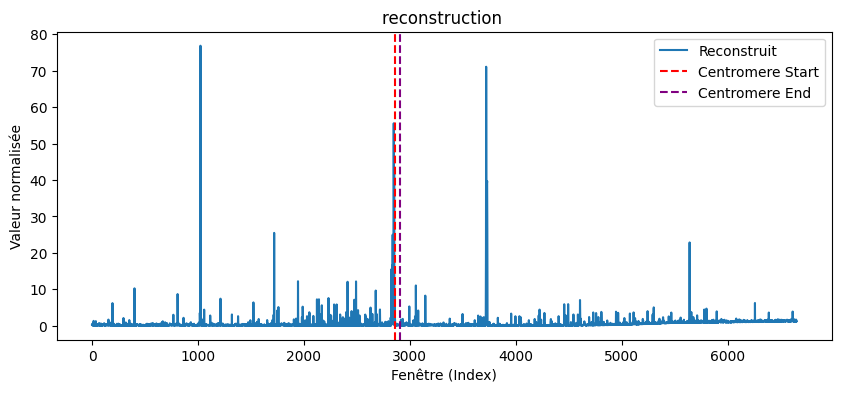

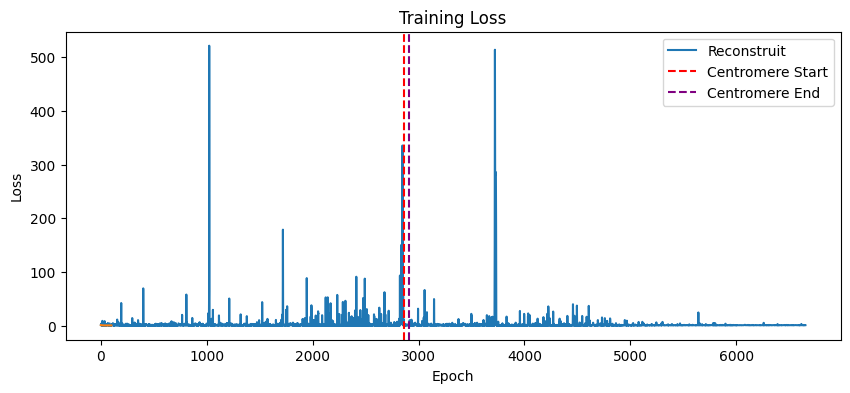

[[<tf.Tensor: shape=(2590,), dtype=float32, numpy=
array([0.31590226, 0.31316087, 0.35751274, ..., 3.9437532 , 0.4415097 ,
       2.143604  ], dtype=float32)>, array([ 0.7704763,  0.7634586,  0.871963 , ..., 17.469673 ,  1.9557719,
        9.495667 ], dtype=float32)], [<tf.Tensor: shape=(3458,), dtype=float32, numpy=
array([0.84758735, 0.75183105, 0.78168184, ..., 0.8472217 , 0.73171717,
       0.69455117], dtype=float32)>, array([1.0952119, 0.9719387, 1.0110059, ..., 1.5214452, 1.3135943,
       1.2464677], dtype=float32)], [<tf.Tensor: shape=(3746,), dtype=float32, numpy=
array([0.30874923, 0.40268493, 0.3191041 , ..., 1.4542493 , 1.4084473 ,
       1.4887613 ], dtype=float32)>, array([0.78956646, 1.0295734 , 0.8157056 , ..., 1.2307026 , 1.1916574 ,
       1.2593096 ], dtype=float32)], [<tf.Tensor: shape=(4629,), dtype=float32, numpy=
array([0.52157134, 0.62983674, 0.6286797 , ..., 0.90355587, 0.779844  ,
       0.738602  ], dtype=float32)>, array([0.97224534, 1.1746576 , 1.1730971 ,

  8%|███▍                                       | 8/100 [00:00<00:02, 38.03it/s]

Epoch 1, Loss: 1.2148878574371338
Epoch 2, Loss: 1.1722630262374878
Epoch 3, Loss: 1.1302095651626587
Epoch 4, Loss: 1.0892482995986938
Epoch 5, Loss: 1.0502089262008667
Epoch 6, Loss: 1.0136381387710571
Epoch 7, Loss: 0.9797534942626953
Epoch 8, Loss: 0.9484766721725464


 16%|██████▋                                   | 16/100 [00:00<00:02, 38.38it/s]

Epoch 9, Loss: 0.9196751713752747
Epoch 10, Loss: 0.8931765556335449
Epoch 11, Loss: 0.8688240051269531
Epoch 12, Loss: 0.8464251756668091
Epoch 13, Loss: 0.8258154988288879
Epoch 14, Loss: 0.8068670630455017
Epoch 15, Loss: 0.7894607782363892
Epoch 16, Loss: 0.7734641432762146


 24%|██████████                                | 24/100 [00:00<00:01, 38.11it/s]

Epoch 17, Loss: 0.7587485909461975
Epoch 18, Loss: 0.745208740234375
Epoch 19, Loss: 0.7327509522438049
Epoch 20, Loss: 0.7212850451469421
Epoch 21, Loss: 0.7107275724411011
Epoch 22, Loss: 0.7009955644607544
Epoch 23, Loss: 0.6920129656791687
Epoch 24, Loss: 0.6837140917778015


 32%|█████████████▍                            | 32/100 [00:00<00:01, 38.30it/s]

Epoch 25, Loss: 0.676038920879364
Epoch 26, Loss: 0.6689363718032837
Epoch 27, Loss: 0.6623595952987671
Epoch 28, Loss: 0.6562680006027222
Epoch 29, Loss: 0.6506268382072449
Epoch 30, Loss: 0.645408034324646
Epoch 31, Loss: 0.6405829787254333
Epoch 32, Loss: 0.6361256837844849


 40%|████████████████▊                         | 40/100 [00:01<00:01, 38.28it/s]

Epoch 33, Loss: 0.6320142149925232
Epoch 34, Loss: 0.6282268762588501
Epoch 35, Loss: 0.6247430443763733
Epoch 36, Loss: 0.6215406656265259
Epoch 37, Loss: 0.618599534034729
Epoch 38, Loss: 0.6158992648124695
Epoch 39, Loss: 0.6134194135665894
Epoch 40, Loss: 0.6111399531364441


 48%|████████████████████▏                     | 48/100 [00:01<00:01, 38.40it/s]

Epoch 41, Loss: 0.6090419292449951
Epoch 42, Loss: 0.6071076393127441
Epoch 43, Loss: 0.6053212881088257
Epoch 44, Loss: 0.6036685109138489
Epoch 45, Loss: 0.602134644985199
Epoch 46, Loss: 0.6007072329521179
Epoch 47, Loss: 0.5993761420249939
Epoch 48, Loss: 0.5981330275535583


 56%|███████████████████████▌                  | 56/100 [00:01<00:01, 38.46it/s]

Epoch 49, Loss: 0.5969705581665039
Epoch 50, Loss: 0.5958824753761292
Epoch 51, Loss: 0.5948641300201416
Epoch 52, Loss: 0.5939105749130249
Epoch 53, Loss: 0.5930175185203552
Epoch 54, Loss: 0.5921820998191833
Epoch 55, Loss: 0.5914009809494019
Epoch 56, Loss: 0.5906720161437988


 64%|██████████████████████████▉               | 64/100 [00:01<00:00, 38.31it/s]

Epoch 57, Loss: 0.5899913907051086
Epoch 58, Loss: 0.5893557071685791
Epoch 59, Loss: 0.5887625217437744
Epoch 60, Loss: 0.5882082581520081
Epoch 61, Loss: 0.5876895785331726
Epoch 62, Loss: 0.587202250957489
Epoch 63, Loss: 0.5867428183555603
Epoch 64, Loss: 0.5863087177276611


 72%|██████████████████████████████▏           | 72/100 [00:01<00:00, 38.41it/s]

Epoch 65, Loss: 0.5858977437019348
Epoch 66, Loss: 0.5855079889297485
Epoch 67, Loss: 0.5851376056671143
Epoch 68, Loss: 0.5847848653793335
Epoch 69, Loss: 0.5844491720199585
Epoch 70, Loss: 0.5841294527053833
Epoch 71, Loss: 0.5838250517845154
Epoch 72, Loss: 0.5835351943969727


 80%|█████████████████████████████████▌        | 80/100 [00:02<00:00, 38.45it/s]

Epoch 73, Loss: 0.5832592844963074
Epoch 74, Loss: 0.5829963088035583
Epoch 75, Loss: 0.5827451944351196
Epoch 76, Loss: 0.5825050473213196
Epoch 77, Loss: 0.5822745561599731
Epoch 78, Loss: 0.582053005695343
Epoch 79, Loss: 0.5818393230438232
Epoch 80, Loss: 0.5816328525543213


 88%|████████████████████████████████████▉     | 88/100 [00:02<00:00, 38.42it/s]

Epoch 81, Loss: 0.5814329385757446
Epoch 82, Loss: 0.5812394618988037
Epoch 83, Loss: 0.5810522437095642
Epoch 84, Loss: 0.5808711051940918
Epoch 85, Loss: 0.580696165561676
Epoch 86, Loss: 0.5805273056030273
Epoch 87, Loss: 0.5803642868995667
Epoch 88, Loss: 0.5802069306373596


 96%|████████████████████████████████████████▎ | 96/100 [00:02<00:00, 37.72it/s]

Epoch 89, Loss: 0.5800549983978271
Epoch 90, Loss: 0.5799083113670349
Epoch 91, Loss: 0.5797665119171143
Epoch 92, Loss: 0.5796292424201965
Epoch 93, Loss: 0.5794962048530579
Epoch 94, Loss: 0.579367458820343
Epoch 95, Loss: 0.5792428255081177
Epoch 96, Loss: 0.5791217684745789


100%|█████████████████████████████████████████| 100/100 [00:02<00:00, 38.16it/s]


Epoch 97, Loss: 0.5790041089057922
Epoch 98, Loss: 0.5788897275924683
Epoch 99, Loss: 0.5787785053253174
Epoch 100, Loss: 0.5786703824996948


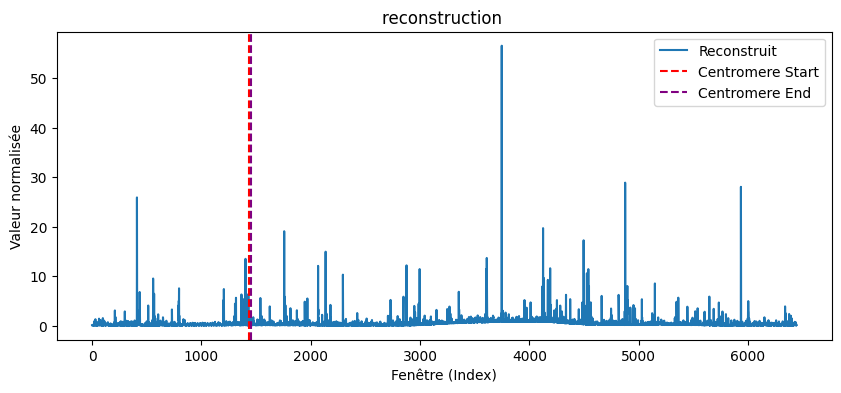

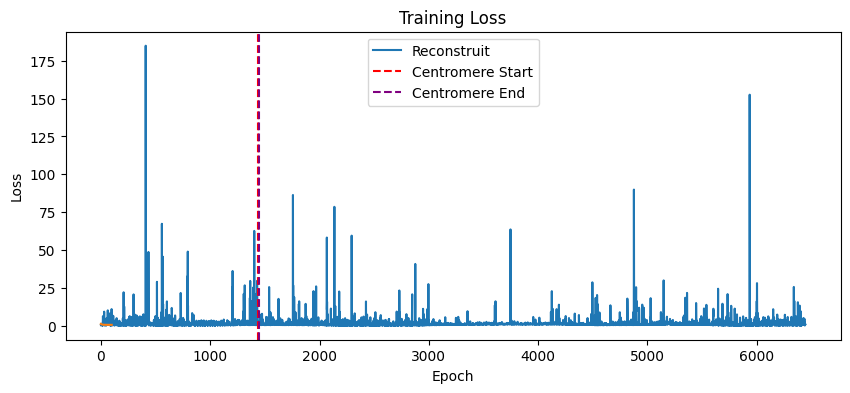

[[<tf.Tensor: shape=(2590,), dtype=float32, numpy=
array([0.31590226, 0.31316087, 0.35751274, ..., 3.9437532 , 0.4415097 ,
       2.143604  ], dtype=float32)>, array([ 0.7704763,  0.7634586,  0.871963 , ..., 17.469673 ,  1.9557719,
        9.495667 ], dtype=float32)], [<tf.Tensor: shape=(3458,), dtype=float32, numpy=
array([0.84758735, 0.75183105, 0.78168184, ..., 0.8472217 , 0.73171717,
       0.69455117], dtype=float32)>, array([1.0952119, 0.9719387, 1.0110059, ..., 1.5214452, 1.3135943,
       1.2464677], dtype=float32)], [<tf.Tensor: shape=(3746,), dtype=float32, numpy=
array([0.30874923, 0.40268493, 0.3191041 , ..., 1.4542493 , 1.4084473 ,
       1.4887613 ], dtype=float32)>, array([0.78956646, 1.0295734 , 0.8157056 , ..., 1.2307026 , 1.1916574 ,
       1.2593096 ], dtype=float32)], [<tf.Tensor: shape=(4629,), dtype=float32, numpy=
array([0.52157134, 0.62983674, 0.6286797 , ..., 0.90355587, 0.779844  ,
       0.738602  ], dtype=float32)>, array([0.97224534, 1.1746576 , 1.1730971 ,

  8%|███▍                                       | 8/100 [00:00<00:02, 37.74it/s]

Epoch 1, Loss: 1.249662160873413
Epoch 2, Loss: 1.2108410596847534
Epoch 3, Loss: 1.172683596611023
Epoch 4, Loss: 1.1376525163650513
Epoch 5, Loss: 1.105440616607666
Epoch 6, Loss: 1.0752568244934082
Epoch 7, Loss: 1.0468056201934814
Epoch 8, Loss: 1.0199190378189087


 16%|██████▋                                   | 16/100 [00:00<00:02, 37.57it/s]

Epoch 9, Loss: 0.994501531124115
Epoch 10, Loss: 0.9704697132110596
Epoch 11, Loss: 0.947740912437439
Epoch 12, Loss: 0.9262303113937378
Epoch 13, Loss: 0.9058888554573059
Epoch 14, Loss: 0.8866876363754272
Epoch 15, Loss: 0.868608832359314
Epoch 16, Loss: 0.851632297039032


 24%|██████████                                | 24/100 [00:00<00:02, 36.74it/s]

Epoch 17, Loss: 0.835740327835083
Epoch 18, Loss: 0.82091224193573
Epoch 19, Loss: 0.8071039319038391
Epoch 20, Loss: 0.7942777872085571
Epoch 21, Loss: 0.7824100255966187
Epoch 22, Loss: 0.7714608907699585
Epoch 23, Loss: 0.7613869905471802
Epoch 24, Loss: 0.7521398067474365


 32%|█████████████▍                            | 32/100 [00:00<00:01, 36.65it/s]

Epoch 25, Loss: 0.7436661124229431
Epoch 26, Loss: 0.7359110116958618
Epoch 27, Loss: 0.7288253307342529
Epoch 28, Loss: 0.7223603129386902
Epoch 29, Loss: 0.7164679169654846
Epoch 30, Loss: 0.7111001014709473
Epoch 31, Loss: 0.7062100172042847
Epoch 32, Loss: 0.7017543911933899


 40%|████████████████▊                         | 40/100 [00:01<00:01, 36.58it/s]

Epoch 33, Loss: 0.6976924538612366
Epoch 34, Loss: 0.6939858794212341
Epoch 35, Loss: 0.6905984282493591
Epoch 36, Loss: 0.6874972581863403
Epoch 37, Loss: 0.6846535205841064
Epoch 38, Loss: 0.6820411086082458
Epoch 39, Loss: 0.6796375513076782
Epoch 40, Loss: 0.6774237155914307


 48%|████████████████████▏                     | 48/100 [00:01<00:01, 37.34it/s]

Epoch 41, Loss: 0.6753831505775452
Epoch 42, Loss: 0.6735012531280518
Epoch 43, Loss: 0.6717629432678223
Epoch 44, Loss: 0.6701546907424927
Epoch 45, Loss: 0.668663501739502
Epoch 46, Loss: 0.6672782301902771
Epoch 47, Loss: 0.6659892797470093
Epoch 48, Loss: 0.664787769317627


 56%|███████████████████████▌                  | 56/100 [00:01<00:01, 37.55it/s]

Epoch 49, Loss: 0.6636671423912048
Epoch 50, Loss: 0.6626209616661072
Epoch 51, Loss: 0.6616436839103699
Epoch 52, Loss: 0.6607303619384766
Epoch 53, Loss: 0.659876823425293
Epoch 54, Loss: 0.6590790748596191
Epoch 55, Loss: 0.6583327651023865
Epoch 56, Loss: 0.6576340794563293


 64%|██████████████████████████▉               | 64/100 [00:01<00:00, 37.51it/s]

Epoch 57, Loss: 0.6569794416427612
Epoch 58, Loss: 0.6563658118247986
Epoch 59, Loss: 0.6557904481887817
Epoch 60, Loss: 0.655251145362854
Epoch 61, Loss: 0.6547455787658691
Epoch 62, Loss: 0.6542717814445496
Epoch 63, Loss: 0.6538276076316833
Epoch 64, Loss: 0.6534116268157959


 72%|██████████████████████████████▏           | 72/100 [00:01<00:00, 37.92it/s]

Epoch 65, Loss: 0.6530218720436096
Epoch 66, Loss: 0.6526563763618469
Epoch 67, Loss: 0.6523129343986511
Epoch 68, Loss: 0.6519901156425476
Epoch 69, Loss: 0.6516859531402588
Epoch 70, Loss: 0.6513988971710205
Epoch 71, Loss: 0.6511273980140686
Epoch 72, Loss: 0.6508700251579285


 80%|█████████████████████████████████▌        | 80/100 [00:02<00:00, 38.29it/s]

Epoch 73, Loss: 0.6506249308586121
Epoch 74, Loss: 0.6503906846046448
Epoch 75, Loss: 0.6501663327217102
Epoch 76, Loss: 0.6499511003494263
Epoch 77, Loss: 0.6497446298599243
Epoch 78, Loss: 0.6495465636253357
Epoch 79, Loss: 0.6493564248085022
Epoch 80, Loss: 0.6491739153862


 88%|████████████████████████████████████▉     | 88/100 [00:02<00:00, 38.03it/s]

Epoch 81, Loss: 0.6489986181259155
Epoch 82, Loss: 0.648829996585846
Epoch 83, Loss: 0.6486675143241882
Epoch 84, Loss: 0.6485106945037842
Epoch 85, Loss: 0.6483594179153442
Epoch 86, Loss: 0.6482133269309998
Epoch 87, Loss: 0.6480726003646851
Epoch 88, Loss: 0.6479367017745972


 96%|████████████████████████████████████████▎ | 96/100 [00:02<00:00, 37.88it/s]

Epoch 89, Loss: 0.6478056907653809
Epoch 90, Loss: 0.6476791501045227
Epoch 91, Loss: 0.6475568413734436
Epoch 92, Loss: 0.6474385857582092
Epoch 93, Loss: 0.6473240256309509
Epoch 94, Loss: 0.6472131609916687
Epoch 95, Loss: 0.6471056938171387
Epoch 96, Loss: 0.6470016241073608


100%|█████████████████████████████████████████| 100/100 [00:02<00:00, 37.43it/s]


Epoch 97, Loss: 0.6469005942344666
Epoch 98, Loss: 0.6468027234077454
Epoch 99, Loss: 0.6467074751853943
Epoch 100, Loss: 0.6466149687767029


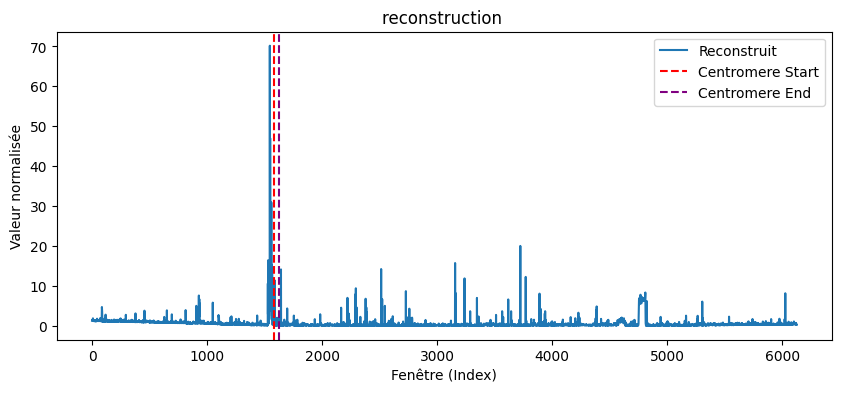

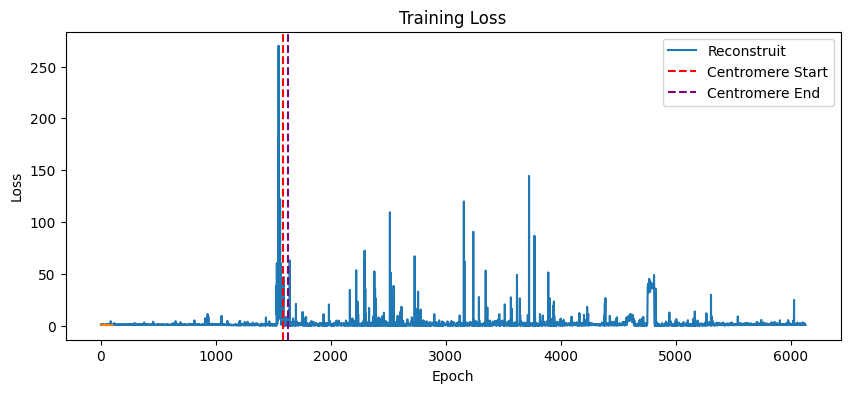

[[<tf.Tensor: shape=(2590,), dtype=float32, numpy=
array([0.31590226, 0.31316087, 0.35751274, ..., 3.9437532 , 0.4415097 ,
       2.143604  ], dtype=float32)>, array([ 0.7704763,  0.7634586,  0.871963 , ..., 17.469673 ,  1.9557719,
        9.495667 ], dtype=float32)], [<tf.Tensor: shape=(3458,), dtype=float32, numpy=
array([0.84758735, 0.75183105, 0.78168184, ..., 0.8472217 , 0.73171717,
       0.69455117], dtype=float32)>, array([1.0952119, 0.9719387, 1.0110059, ..., 1.5214452, 1.3135943,
       1.2464677], dtype=float32)], [<tf.Tensor: shape=(3746,), dtype=float32, numpy=
array([0.30874923, 0.40268493, 0.3191041 , ..., 1.4542493 , 1.4084473 ,
       1.4887613 ], dtype=float32)>, array([0.78956646, 1.0295734 , 0.8157056 , ..., 1.2307026 , 1.1916574 ,
       1.2593096 ], dtype=float32)], [<tf.Tensor: shape=(4629,), dtype=float32, numpy=
array([0.52157134, 0.62983674, 0.6286797 , ..., 0.90355587, 0.779844  ,
       0.738602  ], dtype=float32)>, array([0.97224534, 1.1746576 , 1.1730971 ,

  8%|███▍                                       | 8/100 [00:00<00:02, 36.41it/s]

Epoch 1, Loss: 1.3017257452011108
Epoch 2, Loss: 1.2638901472091675
Epoch 3, Loss: 1.2279008626937866
Epoch 4, Loss: 1.1940326690673828
Epoch 5, Loss: 1.16215980052948
Epoch 6, Loss: 1.132100224494934
Epoch 7, Loss: 1.103611946105957
Epoch 8, Loss: 1.0763839483261108


 16%|██████▋                                   | 16/100 [00:00<00:02, 37.30it/s]

Epoch 9, Loss: 1.0502201318740845
Epoch 10, Loss: 1.0249847173690796
Epoch 11, Loss: 1.000551700592041
Epoch 12, Loss: 0.9768857359886169
Epoch 13, Loss: 0.9539210796356201
Epoch 14, Loss: 0.9316039085388184
Epoch 15, Loss: 0.9099188446998596
Epoch 16, Loss: 0.8888627886772156


 24%|██████████                                | 24/100 [00:00<00:02, 37.70it/s]

Epoch 17, Loss: 0.868470311164856
Epoch 18, Loss: 0.84879070520401
Epoch 19, Loss: 0.8298979997634888
Epoch 20, Loss: 0.8118720054626465
Epoch 21, Loss: 0.7947870492935181
Epoch 22, Loss: 0.7786989212036133
Epoch 23, Loss: 0.7636450529098511
Epoch 24, Loss: 0.7496503591537476


 32%|█████████████▍                            | 32/100 [00:00<00:01, 37.67it/s]

Epoch 25, Loss: 0.7367120385169983
Epoch 26, Loss: 0.7248151898384094
Epoch 27, Loss: 0.7139322757720947
Epoch 28, Loss: 0.7040183544158936
Epoch 29, Loss: 0.6950169205665588
Epoch 30, Loss: 0.6868712902069092
Epoch 31, Loss: 0.6795181035995483
Epoch 32, Loss: 0.6728928089141846


 40%|████████████████▊                         | 40/100 [00:01<00:01, 37.00it/s]

Epoch 33, Loss: 0.666927695274353
Epoch 34, Loss: 0.6615570187568665
Epoch 35, Loss: 0.6567198038101196
Epoch 36, Loss: 0.6523573398590088
Epoch 37, Loss: 0.6484183073043823
Epoch 38, Loss: 0.644855797290802
Epoch 39, Loss: 0.6416279077529907
Epoch 40, Loss: 0.6386988162994385


 44%|██████████████████▍                       | 44/100 [00:01<00:01, 34.41it/s]

Epoch 41, Loss: 0.6360381245613098
Epoch 42, Loss: 0.6336202621459961
Epoch 43, Loss: 0.6314218640327454
Epoch 44, Loss: 0.6294230818748474
Epoch 45, Loss: 0.6276056170463562
Epoch 46, Loss: 0.6259525418281555
Epoch 47, Loss: 0.6244487166404724


 52%|█████████████████████▊                    | 52/100 [00:01<00:01, 35.16it/s]

Epoch 48, Loss: 0.6230794191360474
Epoch 49, Loss: 0.6218311190605164
Epoch 50, Loss: 0.6206920146942139
Epoch 51, Loss: 0.6196513772010803
Epoch 52, Loss: 0.6186993718147278
Epoch 53, Loss: 0.6178272366523743
Epoch 54, Loss: 0.6170264482498169
Epoch 55, Loss: 0.6162893772125244


 60%|█████████████████████████▏                | 60/100 [00:01<00:01, 35.97it/s]

Epoch 56, Loss: 0.6156083941459656
Epoch 57, Loss: 0.6149762868881226
Epoch 58, Loss: 0.6143867373466492
Epoch 59, Loss: 0.6138346195220947
Epoch 60, Loss: 0.6133155226707458
Epoch 61, Loss: 0.6128262281417847
Epoch 62, Loss: 0.6123641133308411
Epoch 63, Loss: 0.6119271516799927


 68%|████████████████████████████▌             | 68/100 [00:01<00:00, 36.34it/s]

Epoch 64, Loss: 0.6115139722824097
Epoch 65, Loss: 0.6111233830451965
Epoch 66, Loss: 0.6107543110847473
Epoch 67, Loss: 0.610405683517456
Epoch 68, Loss: 0.6100760698318481
Epoch 69, Loss: 0.6097643375396729
Epoch 70, Loss: 0.6094691157341003
Epoch 71, Loss: 0.6091886162757874


 76%|███████████████████████████████▉          | 76/100 [00:02<00:00, 36.50it/s]

Epoch 72, Loss: 0.6089215278625488
Epoch 73, Loss: 0.6086663603782654
Epoch 74, Loss: 0.6084219217300415
Epoch 75, Loss: 0.6081873178482056
Epoch 76, Loss: 0.6079614758491516
Epoch 77, Loss: 0.6077446341514587
Epoch 78, Loss: 0.6075364351272583
Epoch 79, Loss: 0.607337474822998


 84%|███████████████████████████████████▎      | 84/100 [00:02<00:00, 36.55it/s]

Epoch 80, Loss: 0.6071484088897705
Epoch 81, Loss: 0.6069692969322205
Epoch 82, Loss: 0.6068000793457031
Epoch 83, Loss: 0.606640100479126
Epoch 84, Loss: 0.6064882278442383
Epoch 85, Loss: 0.6063426733016968
Epoch 86, Loss: 0.6062026023864746
Epoch 87, Loss: 0.6060666441917419


 92%|██████████████████████████████████████▋   | 92/100 [00:02<00:00, 36.94it/s]

Epoch 88, Loss: 0.6059340834617615
Epoch 89, Loss: 0.6058045029640198
Epoch 90, Loss: 0.6056780219078064
Epoch 91, Loss: 0.605554461479187
Epoch 92, Loss: 0.605434238910675
Epoch 93, Loss: 0.6053175330162048
Epoch 94, Loss: 0.605204701423645
Epoch 95, Loss: 0.6050958633422852


100%|█████████████████████████████████████████| 100/100 [00:02<00:00, 36.52it/s]

Epoch 96, Loss: 0.6049907803535461
Epoch 97, Loss: 0.604889452457428
Epoch 98, Loss: 0.6047916412353516
Epoch 99, Loss: 0.6046969294548035
Epoch 100, Loss: 0.6046050786972046


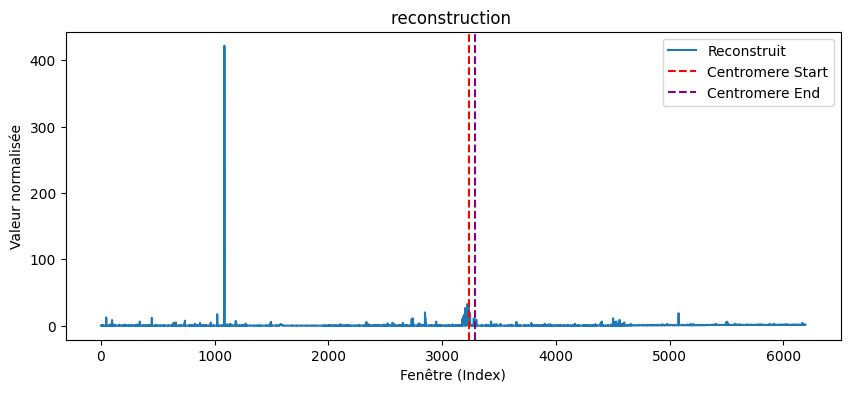

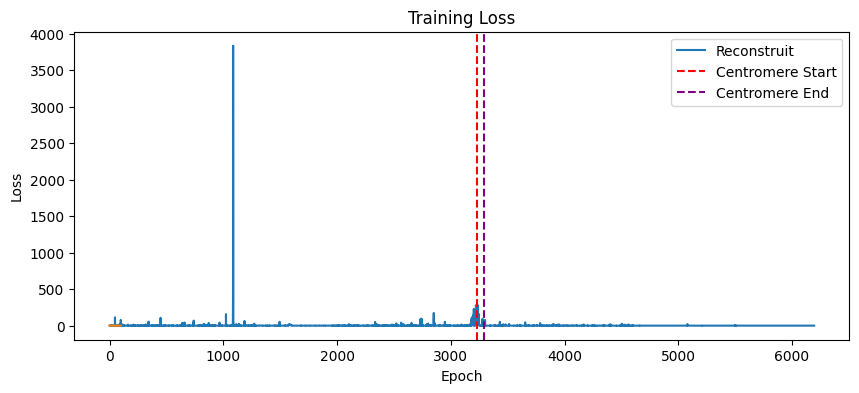

[[<tf.Tensor: shape=(2590,), dtype=float32, numpy=
array([0.31590226, 0.31316087, 0.35751274, ..., 3.9437532 , 0.4415097 ,
       2.143604  ], dtype=float32)>, array([ 0.7704763,  0.7634586,  0.871963 , ..., 17.469673 ,  1.9557719,
        9.495667 ], dtype=float32)], [<tf.Tensor: shape=(3458,), dtype=float32, numpy=
array([0.84758735, 0.75183105, 0.78168184, ..., 0.8472217 , 0.73171717,
       0.69455117], dtype=float32)>, array([1.0952119, 0.9719387, 1.0110059, ..., 1.5214452, 1.3135943,
       1.2464677], dtype=float32)], [<tf.Tensor: shape=(3746,), dtype=float32, numpy=
array([0.30874923, 0.40268493, 0.3191041 , ..., 1.4542493 , 1.4084473 ,
       1.4887613 ], dtype=float32)>, array([0.78956646, 1.0295734 , 0.8157056 , ..., 1.2307026 , 1.1916574 ,
       1.2593096 ], dtype=float32)], [<tf.Tensor: shape=(4629,), dtype=float32, numpy=
array([0.52157134, 0.62983674, 0.6286797 , ..., 0.90355587, 0.779844  ,
       0.738602  ], dtype=float32)>, array([0.97224534, 1.1746576 , 1.1730971 ,

  8%|███▍                                       | 8/100 [00:00<00:02, 37.37it/s]

Epoch 1, Loss: 1.248788595199585
Epoch 2, Loss: 1.2077077627182007
Epoch 3, Loss: 1.168906331062317
Epoch 4, Loss: 1.1323087215423584
Epoch 5, Loss: 1.0978968143463135
Epoch 6, Loss: 1.0654010772705078
Epoch 7, Loss: 1.0345450639724731
Epoch 8, Loss: 1.0051867961883545


 16%|██████▋                                   | 16/100 [00:00<00:02, 38.09it/s]

Epoch 9, Loss: 0.9771996140480042
Epoch 10, Loss: 0.9505487084388733
Epoch 11, Loss: 0.9252007007598877
Epoch 12, Loss: 0.9010500907897949
Epoch 13, Loss: 0.8780382871627808
Epoch 14, Loss: 0.8561548590660095
Epoch 15, Loss: 0.8354170322418213
Epoch 16, Loss: 0.815825879573822


 24%|██████████                                | 24/100 [00:00<00:02, 37.86it/s]

Epoch 17, Loss: 0.7974269390106201
Epoch 18, Loss: 0.7802358269691467
Epoch 19, Loss: 0.7642688155174255
Epoch 20, Loss: 0.7495207786560059
Epoch 21, Loss: 0.7359739542007446
Epoch 22, Loss: 0.7235965132713318
Epoch 23, Loss: 0.712337076663971
Epoch 24, Loss: 0.7021349668502808


 32%|█████████████▍                            | 32/100 [00:00<00:01, 38.07it/s]

Epoch 25, Loss: 0.6929208040237427
Epoch 26, Loss: 0.6846215128898621
Epoch 27, Loss: 0.6771602034568787
Epoch 28, Loss: 0.6704591512680054
Epoch 29, Loss: 0.6644439101219177
Epoch 30, Loss: 0.6590449810028076
Epoch 31, Loss: 0.6541956663131714
Epoch 32, Loss: 0.6498353481292725


 40%|████████████████▊                         | 40/100 [00:01<00:01, 37.61it/s]

Epoch 33, Loss: 0.6459096074104309
Epoch 34, Loss: 0.64236980676651
Epoch 35, Loss: 0.6391756534576416
Epoch 36, Loss: 0.6362897157669067
Epoch 37, Loss: 0.6336805820465088
Epoch 38, Loss: 0.631318986415863
Epoch 39, Loss: 0.6291782259941101
Epoch 40, Loss: 0.627234697341919


 48%|████████████████████▏                     | 48/100 [00:01<00:01, 37.49it/s]

Epoch 41, Loss: 0.6254677772521973
Epoch 42, Loss: 0.6238580942153931
Epoch 43, Loss: 0.622388482093811
Epoch 44, Loss: 0.6210440397262573
Epoch 45, Loss: 0.6198112964630127
Epoch 46, Loss: 0.6186783909797668
Epoch 47, Loss: 0.6176356077194214
Epoch 48, Loss: 0.6166740655899048


 56%|███████████████████████▌                  | 56/100 [00:01<00:01, 36.95it/s]

Epoch 49, Loss: 0.615785539150238
Epoch 50, Loss: 0.6149629950523376
Epoch 51, Loss: 0.6142003536224365
Epoch 52, Loss: 0.6134921312332153
Epoch 53, Loss: 0.6128329038619995
Epoch 54, Loss: 0.6122182011604309
Epoch 55, Loss: 0.611644446849823
Epoch 56, Loss: 0.6111078858375549


 64%|██████████████████████████▉               | 64/100 [00:01<00:00, 36.79it/s]

Epoch 57, Loss: 0.6106054782867432
Epoch 58, Loss: 0.6101347208023071
Epoch 59, Loss: 0.6096931099891663
Epoch 60, Loss: 0.6092785000801086
Epoch 61, Loss: 0.6088888049125671
Epoch 62, Loss: 0.6085222363471985
Epoch 63, Loss: 0.6081764698028564
Epoch 64, Loss: 0.6078503131866455


 72%|██████████████████████████████▏           | 72/100 [00:01<00:00, 36.60it/s]

Epoch 65, Loss: 0.6075416207313538
Epoch 66, Loss: 0.6072490215301514
Epoch 67, Loss: 0.6069711446762085
Epoch 68, Loss: 0.6067065000534058
Epoch 69, Loss: 0.6064541339874268
Epoch 70, Loss: 0.6062129735946655
Epoch 71, Loss: 0.60598224401474
Epoch 72, Loss: 0.6057610511779785


 80%|█████████████████████████████████▌        | 80/100 [00:02<00:00, 36.90it/s]

Epoch 73, Loss: 0.6055490970611572
Epoch 74, Loss: 0.6053459644317627
Epoch 75, Loss: 0.6051510572433472
Epoch 76, Loss: 0.6049640774726868
Epoch 77, Loss: 0.6047847867012024
Epoch 78, Loss: 0.6046126484870911
Epoch 79, Loss: 0.6044474244117737
Epoch 80, Loss: 0.604288637638092


 88%|████████████████████████████████████▉     | 88/100 [00:02<00:00, 37.77it/s]

Epoch 81, Loss: 0.6041361093521118
Epoch 82, Loss: 0.60398930311203
Epoch 83, Loss: 0.603847861289978
Epoch 84, Loss: 0.6037116050720215
Epoch 85, Loss: 0.6035800576210022
Epoch 86, Loss: 0.6034530997276306
Epoch 87, Loss: 0.603330135345459
Epoch 88, Loss: 0.6032111048698425


 96%|████████████████████████████████████████▎ | 96/100 [00:02<00:00, 37.97it/s]

Epoch 89, Loss: 0.6030958890914917
Epoch 90, Loss: 0.6029841899871826
Epoch 91, Loss: 0.6028756499290466
Epoch 92, Loss: 0.6027702689170837
Epoch 93, Loss: 0.6026678681373596
Epoch 94, Loss: 0.6025680899620056
Epoch 95, Loss: 0.6024709343910217
Epoch 96, Loss: 0.6023763418197632


100%|█████████████████████████████████████████| 100/100 [00:02<00:00, 37.42it/s]


Epoch 97, Loss: 0.6022841930389404
Epoch 98, Loss: 0.6021942496299744
Epoch 99, Loss: 0.6021066308021545
Epoch 100, Loss: 0.6020210981369019


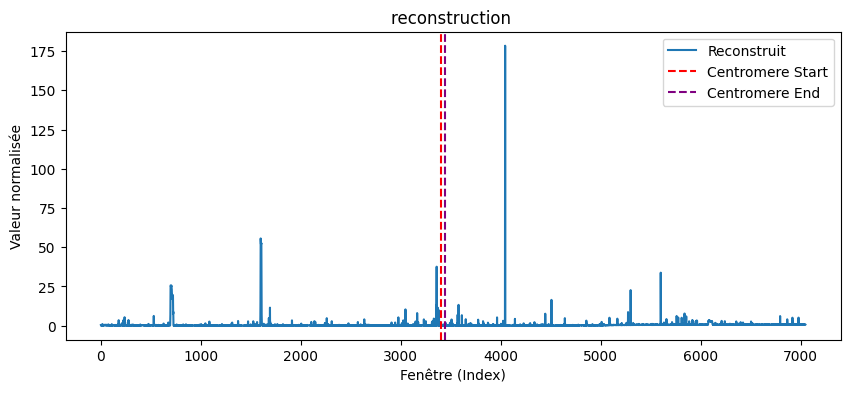

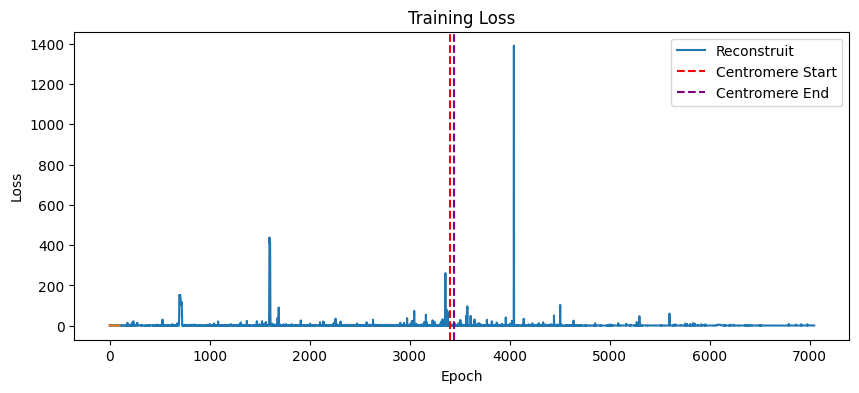

[[<tf.Tensor: shape=(2590,), dtype=float32, numpy=
array([0.31590226, 0.31316087, 0.35751274, ..., 3.9437532 , 0.4415097 ,
       2.143604  ], dtype=float32)>, array([ 0.7704763,  0.7634586,  0.871963 , ..., 17.469673 ,  1.9557719,
        9.495667 ], dtype=float32)], [<tf.Tensor: shape=(3458,), dtype=float32, numpy=
array([0.84758735, 0.75183105, 0.78168184, ..., 0.8472217 , 0.73171717,
       0.69455117], dtype=float32)>, array([1.0952119, 0.9719387, 1.0110059, ..., 1.5214452, 1.3135943,
       1.2464677], dtype=float32)], [<tf.Tensor: shape=(3746,), dtype=float32, numpy=
array([0.30874923, 0.40268493, 0.3191041 , ..., 1.4542493 , 1.4084473 ,
       1.4887613 ], dtype=float32)>, array([0.78956646, 1.0295734 , 0.8157056 , ..., 1.2307026 , 1.1916574 ,
       1.2593096 ], dtype=float32)], [<tf.Tensor: shape=(4629,), dtype=float32, numpy=
array([0.52157134, 0.62983674, 0.6286797 , ..., 0.90355587, 0.779844  ,
       0.738602  ], dtype=float32)>, array([0.97224534, 1.1746576 , 1.1730971 ,

  8%|███▍                                       | 8/100 [00:00<00:02, 37.65it/s]

Epoch 1, Loss: 1.2924683094024658
Epoch 2, Loss: 1.252176284790039
Epoch 3, Loss: 1.2122687101364136
Epoch 4, Loss: 1.1729532480239868
Epoch 5, Loss: 1.134364366531372
Epoch 6, Loss: 1.0966503620147705
Epoch 7, Loss: 1.0600470304489136
Epoch 8, Loss: 1.0248308181762695


 16%|██████▋                                   | 16/100 [00:00<00:02, 37.53it/s]

Epoch 9, Loss: 0.9912605881690979
Epoch 10, Loss: 0.95949387550354
Epoch 11, Loss: 0.9295824766159058
Epoch 12, Loss: 0.9014949798583984
Epoch 13, Loss: 0.875193178653717
Epoch 14, Loss: 0.8506227135658264
Epoch 15, Loss: 0.8277168273925781
Epoch 16, Loss: 0.8064113259315491


 24%|██████████                                | 24/100 [00:00<00:02, 37.53it/s]

Epoch 17, Loss: 0.7866695523262024
Epoch 18, Loss: 0.7684513330459595
Epoch 19, Loss: 0.7516898512840271
Epoch 20, Loss: 0.7363172769546509
Epoch 21, Loss: 0.7222630977630615
Epoch 22, Loss: 0.7094518542289734
Epoch 23, Loss: 0.6978069543838501
Epoch 24, Loss: 0.6872501969337463


 32%|█████████████▍                            | 32/100 [00:00<00:01, 37.52it/s]

Epoch 25, Loss: 0.6777019500732422
Epoch 26, Loss: 0.6690841913223267
Epoch 27, Loss: 0.6613197326660156
Epoch 28, Loss: 0.6543340682983398
Epoch 29, Loss: 0.6480570435523987
Epoch 30, Loss: 0.6424229741096497
Epoch 31, Loss: 0.6373701691627502
Epoch 32, Loss: 0.6328399777412415


 40%|████████████████▊                         | 40/100 [00:01<00:01, 36.83it/s]

Epoch 33, Loss: 0.6287800669670105
Epoch 34, Loss: 0.6251396536827087
Epoch 35, Loss: 0.6218729615211487
Epoch 36, Loss: 0.6189379692077637
Epoch 37, Loss: 0.6162950396537781
Epoch 38, Loss: 0.6139079332351685
Epoch 39, Loss: 0.6117446422576904
Epoch 40, Loss: 0.6097756624221802


 48%|████████████████████▏                     | 48/100 [00:01<00:01, 36.81it/s]

Epoch 41, Loss: 0.6079762578010559
Epoch 42, Loss: 0.6063244938850403
Epoch 43, Loss: 0.6048023104667664
Epoch 44, Loss: 0.6033949851989746
Epoch 45, Loss: 0.6020916104316711
Epoch 46, Loss: 0.6008829474449158
Epoch 47, Loss: 0.5997620820999146
Epoch 48, Loss: 0.5987235903739929


 56%|███████████████████████▌                  | 56/100 [00:01<00:01, 37.09it/s]

Epoch 49, Loss: 0.597762405872345
Epoch 50, Loss: 0.596874475479126
Epoch 51, Loss: 0.5960553288459778
Epoch 52, Loss: 0.5953001976013184
Epoch 53, Loss: 0.5946046710014343
Epoch 54, Loss: 0.5939635038375854
Epoch 55, Loss: 0.5933715105056763
Epoch 56, Loss: 0.592823326587677


 64%|██████████████████████████▉               | 64/100 [00:01<00:01, 35.79it/s]

Epoch 57, Loss: 0.5923141241073608
Epoch 58, Loss: 0.5918392539024353
Epoch 59, Loss: 0.5913947820663452
Epoch 60, Loss: 0.5909770727157593
Epoch 61, Loss: 0.5905836224555969
Epoch 62, Loss: 0.5902122259140015
Epoch 63, Loss: 0.5898611545562744
Epoch 64, Loss: 0.5895292162895203


 72%|██████████████████████████████▏           | 72/100 [00:01<00:00, 35.37it/s]

Epoch 65, Loss: 0.5892153382301331
Epoch 66, Loss: 0.5889185070991516
Epoch 67, Loss: 0.58863765001297
Epoch 68, Loss: 0.5883715748786926
Epoch 69, Loss: 0.5881192684173584
Epoch 70, Loss: 0.587879478931427
Epoch 71, Loss: 0.5876510739326477
Epoch 72, Loss: 0.5874331593513489


 76%|███████████████████████████████▉          | 76/100 [00:02<00:00, 34.19it/s]

Epoch 73, Loss: 0.5872248411178589
Epoch 74, Loss: 0.5870251655578613
Epoch 75, Loss: 0.5868339538574219
Epoch 76, Loss: 0.5866503715515137
Epoch 77, Loss: 0.5864744782447815
Epoch 78, Loss: 0.5863056778907776
Epoch 79, Loss: 0.5861440896987915


 84%|███████████████████████████████████▎      | 84/100 [00:02<00:00, 33.24it/s]

Epoch 80, Loss: 0.5859889388084412
Epoch 81, Loss: 0.585840106010437
Epoch 82, Loss: 0.5856974124908447
Epoch 83, Loss: 0.5855602622032166
Epoch 84, Loss: 0.5854283571243286
Epoch 85, Loss: 0.5853013396263123
Epoch 86, Loss: 0.585178554058075


 92%|██████████████████████████████████████▋   | 92/100 [00:02<00:00, 33.35it/s]

Epoch 87, Loss: 0.5850600004196167
Epoch 88, Loss: 0.5849453210830688
Epoch 89, Loss: 0.5848339200019836
Epoch 90, Loss: 0.5847262144088745
Epoch 91, Loss: 0.5846218466758728
Epoch 92, Loss: 0.5845205187797546
Epoch 93, Loss: 0.5844224095344543


100%|█████████████████████████████████████████| 100/100 [00:02<00:00, 35.63it/s]

Epoch 94, Loss: 0.5843272805213928
Epoch 95, Loss: 0.5842351317405701
Epoch 96, Loss: 0.584145724773407
Epoch 97, Loss: 0.5840591788291931
Epoch 98, Loss: 0.5839751362800598
Epoch 99, Loss: 0.5838935375213623
Epoch 100, Loss: 0.5838140845298767


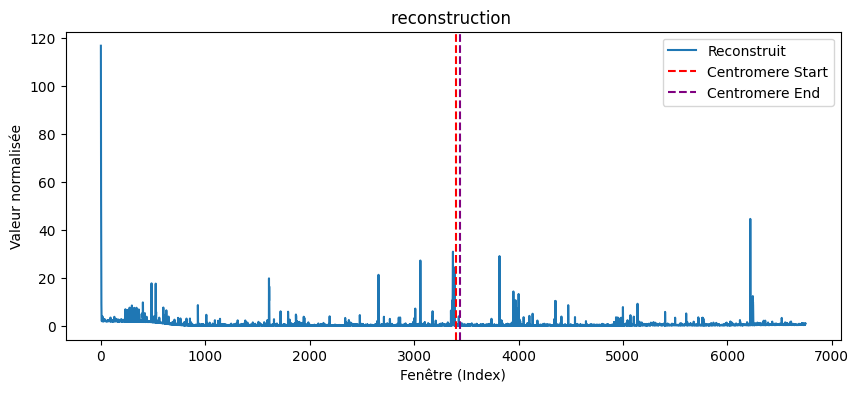

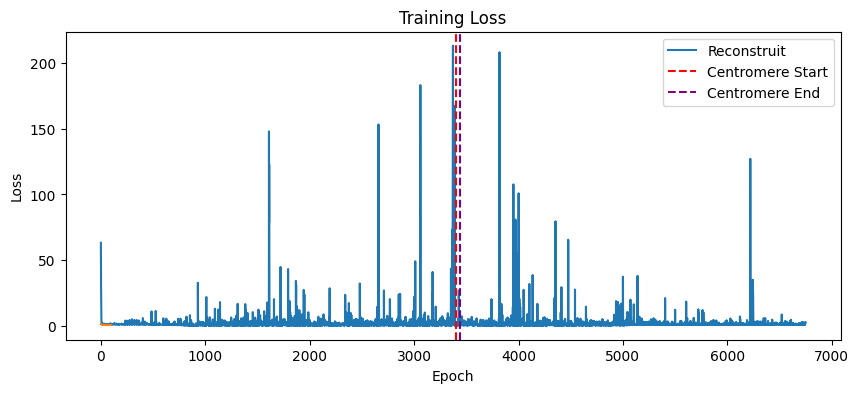

[[<tf.Tensor: shape=(2590,), dtype=float32, numpy=
array([0.31590226, 0.31316087, 0.35751274, ..., 3.9437532 , 0.4415097 ,
       2.143604  ], dtype=float32)>, array([ 0.7704763,  0.7634586,  0.871963 , ..., 17.469673 ,  1.9557719,
        9.495667 ], dtype=float32)], [<tf.Tensor: shape=(3458,), dtype=float32, numpy=
array([0.84758735, 0.75183105, 0.78168184, ..., 0.8472217 , 0.73171717,
       0.69455117], dtype=float32)>, array([1.0952119, 0.9719387, 1.0110059, ..., 1.5214452, 1.3135943,
       1.2464677], dtype=float32)], [<tf.Tensor: shape=(3746,), dtype=float32, numpy=
array([0.30874923, 0.40268493, 0.3191041 , ..., 1.4542493 , 1.4084473 ,
       1.4887613 ], dtype=float32)>, array([0.78956646, 1.0295734 , 0.8157056 , ..., 1.2307026 , 1.1916574 ,
       1.2593096 ], dtype=float32)], [<tf.Tensor: shape=(4629,), dtype=float32, numpy=
array([0.52157134, 0.62983674, 0.6286797 , ..., 0.90355587, 0.779844  ,
       0.738602  ], dtype=float32)>, array([0.97224534, 1.1746576 , 1.1730971 ,

  8%|███▍                                       | 8/100 [00:00<00:02, 36.94it/s]

Epoch 1, Loss: 1.317400336265564
Epoch 2, Loss: 1.2803308963775635
Epoch 3, Loss: 1.2430671453475952
Epoch 4, Loss: 1.205615520477295
Epoch 5, Loss: 1.168018102645874
Epoch 6, Loss: 1.1304081678390503
Epoch 7, Loss: 1.0930426120758057
Epoch 8, Loss: 1.0563942193984985


 16%|██████▋                                   | 16/100 [00:00<00:02, 37.81it/s]

Epoch 9, Loss: 1.0208940505981445
Epoch 10, Loss: 0.9868592619895935
Epoch 11, Loss: 0.9545040130615234
Epoch 12, Loss: 0.9239214658737183
Epoch 13, Loss: 0.8950983881950378
Epoch 14, Loss: 0.8679688572883606
Epoch 15, Loss: 0.8424955010414124
Epoch 16, Loss: 0.8186314105987549


 24%|██████████                                | 24/100 [00:00<00:01, 38.03it/s]

Epoch 17, Loss: 0.7963564395904541
Epoch 18, Loss: 0.7756343483924866
Epoch 19, Loss: 0.756442666053772
Epoch 20, Loss: 0.7387460470199585
Epoch 21, Loss: 0.7225112915039062
Epoch 22, Loss: 0.7076869606971741
Epoch 23, Loss: 0.6942120790481567
Epoch 24, Loss: 0.6820099353790283


 32%|█████████████▍                            | 32/100 [00:00<00:01, 37.70it/s]

Epoch 25, Loss: 0.6709974408149719
Epoch 26, Loss: 0.6610904932022095
Epoch 27, Loss: 0.6521990895271301
Epoch 28, Loss: 0.6442299485206604
Epoch 29, Loss: 0.6370936036109924
Epoch 30, Loss: 0.6307058334350586
Epoch 31, Loss: 0.6249842047691345
Epoch 32, Loss: 0.6198544502258301


 40%|████████████████▊                         | 40/100 [00:01<00:01, 36.51it/s]

Epoch 33, Loss: 0.6152504682540894
Epoch 34, Loss: 0.6111111640930176
Epoch 35, Loss: 0.6073838472366333
Epoch 36, Loss: 0.6040215492248535
Epoch 37, Loss: 0.6009832620620728
Epoch 38, Loss: 0.5982325673103333
Epoch 39, Loss: 0.595737636089325
Epoch 40, Loss: 0.5934705138206482


 48%|████████████████████▏                     | 48/100 [00:01<00:01, 35.44it/s]

Epoch 41, Loss: 0.5914072394371033
Epoch 42, Loss: 0.5895264148712158
Epoch 43, Loss: 0.5878095030784607
Epoch 44, Loss: 0.5862392783164978
Epoch 45, Loss: 0.5848009586334229
Epoch 46, Loss: 0.5834814310073853
Epoch 47, Loss: 0.5822693109512329
Epoch 48, Loss: 0.5811550617218018


 56%|███████████████████████▌                  | 56/100 [00:01<00:01, 36.11it/s]

Epoch 49, Loss: 0.5801286697387695
Epoch 50, Loss: 0.5791819095611572
Epoch 51, Loss: 0.578307569026947
Epoch 52, Loss: 0.5774988532066345
Epoch 53, Loss: 0.5767496824264526
Epoch 54, Loss: 0.576054573059082
Epoch 55, Loss: 0.5754091143608093
Epoch 56, Loss: 0.5748087167739868


 64%|██████████████████████████▉               | 64/100 [00:01<00:00, 36.27it/s]

Epoch 57, Loss: 0.5742492079734802
Epoch 58, Loss: 0.5737271308898926
Epoch 59, Loss: 0.5732393264770508
Epoch 60, Loss: 0.5727825164794922
Epoch 61, Loss: 0.5723540186882019
Epoch 62, Loss: 0.571951150894165
Epoch 63, Loss: 0.5715717673301697
Epoch 64, Loss: 0.5712137818336487


 72%|██████████████████████████████▏           | 72/100 [00:01<00:00, 36.49it/s]

Epoch 65, Loss: 0.5708751678466797
Epoch 66, Loss: 0.5705541968345642
Epoch 67, Loss: 0.5702494978904724
Epoch 68, Loss: 0.5699595808982849
Epoch 69, Loss: 0.5696831345558167
Epoch 70, Loss: 0.5694193840026855
Epoch 71, Loss: 0.5691673755645752
Epoch 72, Loss: 0.5689262747764587


 80%|█████████████████████████████████▌        | 80/100 [00:02<00:00, 36.71it/s]

Epoch 73, Loss: 0.5686954259872437
Epoch 74, Loss: 0.5684741139411926
Epoch 75, Loss: 0.5682618021965027
Epoch 76, Loss: 0.5680580139160156
Epoch 77, Loss: 0.5678622126579285
Epoch 78, Loss: 0.567673921585083
Epoch 79, Loss: 0.5674927234649658
Epoch 80, Loss: 0.5673180222511292


 88%|████████████████████████████████████▉     | 88/100 [00:02<00:00, 37.45it/s]

Epoch 81, Loss: 0.5671495795249939
Epoch 82, Loss: 0.5669869184494019
Epoch 83, Loss: 0.5668296217918396
Epoch 84, Loss: 0.5666776299476624
Epoch 85, Loss: 0.5665305256843567
Epoch 86, Loss: 0.5663880109786987
Epoch 87, Loss: 0.5662499666213989
Epoch 88, Loss: 0.5661158561706543


 96%|████████████████████████████████████████▎ | 96/100 [00:02<00:00, 37.74it/s]

Epoch 89, Loss: 0.5659857392311096
Epoch 90, Loss: 0.565859317779541
Epoch 91, Loss: 0.5657364726066589
Epoch 92, Loss: 0.565617024898529
Epoch 93, Loss: 0.5655009150505066
Epoch 94, Loss: 0.5653877258300781
Epoch 95, Loss: 0.5652774572372437
Epoch 96, Loss: 0.5651700496673584


100%|█████████████████████████████████████████| 100/100 [00:02<00:00, 36.90it/s]


Epoch 97, Loss: 0.5650654435157776
Epoch 98, Loss: 0.5649634599685669
Epoch 99, Loss: 0.5648640394210815
Epoch 100, Loss: 0.5647671222686768


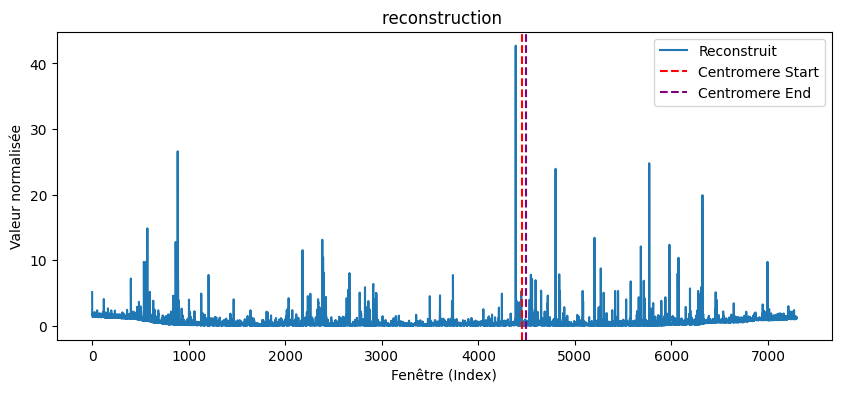

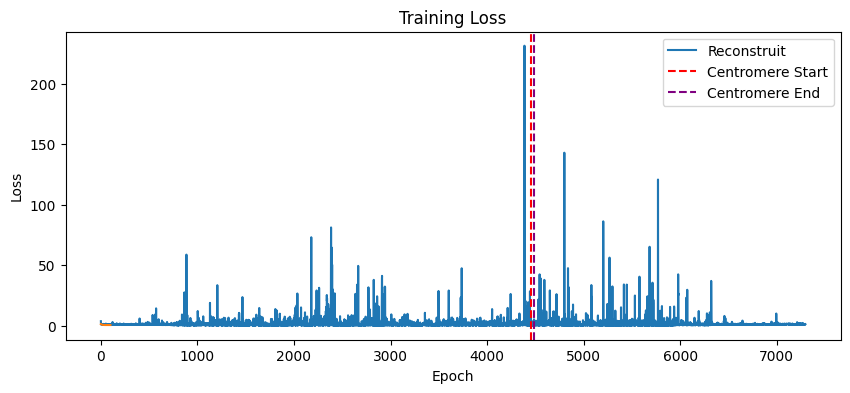

[[<tf.Tensor: shape=(2590,), dtype=float32, numpy=
array([0.31590226, 0.31316087, 0.35751274, ..., 3.9437532 , 0.4415097 ,
       2.143604  ], dtype=float32)>, array([ 0.7704763,  0.7634586,  0.871963 , ..., 17.469673 ,  1.9557719,
        9.495667 ], dtype=float32)], [<tf.Tensor: shape=(3458,), dtype=float32, numpy=
array([0.84758735, 0.75183105, 0.78168184, ..., 0.8472217 , 0.73171717,
       0.69455117], dtype=float32)>, array([1.0952119, 0.9719387, 1.0110059, ..., 1.5214452, 1.3135943,
       1.2464677], dtype=float32)], [<tf.Tensor: shape=(3746,), dtype=float32, numpy=
array([0.30874923, 0.40268493, 0.3191041 , ..., 1.4542493 , 1.4084473 ,
       1.4887613 ], dtype=float32)>, array([0.78956646, 1.0295734 , 0.8157056 , ..., 1.2307026 , 1.1916574 ,
       1.2593096 ], dtype=float32)], [<tf.Tensor: shape=(4629,), dtype=float32, numpy=
array([0.52157134, 0.62983674, 0.6286797 , ..., 0.90355587, 0.779844  ,
       0.738602  ], dtype=float32)>, array([0.97224534, 1.1746576 , 1.1730971 ,

  8%|███▍                                       | 8/100 [00:00<00:02, 36.87it/s]

Epoch 1, Loss: 1.2499325275421143
Epoch 2, Loss: 1.212725281715393
Epoch 3, Loss: 1.176403522491455
Epoch 4, Loss: 1.1410988569259644
Epoch 5, Loss: 1.106916904449463
Epoch 6, Loss: 1.0739394426345825
Epoch 7, Loss: 1.0422344207763672
Epoch 8, Loss: 1.0118483304977417


 16%|██████▋                                   | 16/100 [00:00<00:02, 37.59it/s]

Epoch 9, Loss: 0.9827889204025269
Epoch 10, Loss: 0.9550426602363586
Epoch 11, Loss: 0.9286349415779114
Epoch 12, Loss: 0.903562605381012
Epoch 13, Loss: 0.8798043727874756
Epoch 14, Loss: 0.8573761582374573
Epoch 15, Loss: 0.8362927436828613
Epoch 16, Loss: 0.8165428638458252


 24%|██████████                                | 24/100 [00:00<00:02, 37.21it/s]

Epoch 17, Loss: 0.7981200814247131
Epoch 18, Loss: 0.7810235619544983
Epoch 19, Loss: 0.7652358412742615
Epoch 20, Loss: 0.7507326602935791
Epoch 21, Loss: 0.7374835014343262
Epoch 22, Loss: 0.7254412174224854
Epoch 23, Loss: 0.7145422697067261
Epoch 24, Loss: 0.704716145992279


 32%|█████████████▍                            | 32/100 [00:00<00:01, 37.28it/s]

Epoch 25, Loss: 0.6958879828453064
Epoch 26, Loss: 0.6879717707633972
Epoch 27, Loss: 0.6808866858482361
Epoch 28, Loss: 0.674550473690033
Epoch 29, Loss: 0.6688856482505798
Epoch 30, Loss: 0.6638189554214478
Epoch 31, Loss: 0.6592836380004883
Epoch 32, Loss: 0.6552168130874634


 40%|████████████████▊                         | 40/100 [00:01<00:01, 37.52it/s]

Epoch 33, Loss: 0.6515615582466125
Epoch 34, Loss: 0.6482677459716797
Epoch 35, Loss: 0.6452918648719788
Epoch 36, Loss: 0.6425955891609192
Epoch 37, Loss: 0.6401450037956238
Epoch 38, Loss: 0.6379098892211914
Epoch 39, Loss: 0.6358665823936462
Epoch 40, Loss: 0.633993923664093


 44%|██████████████████▍                       | 44/100 [00:01<00:01, 35.84it/s]

Epoch 41, Loss: 0.6322746276855469
Epoch 42, Loss: 0.6306930780410767
Epoch 43, Loss: 0.6292366981506348
Epoch 44, Loss: 0.627894401550293
Epoch 45, Loss: 0.6266567707061768
Epoch 46, Loss: 0.6255157589912415
Epoch 47, Loss: 0.6244637966156006


 52%|█████████████████████▊                    | 52/100 [00:01<00:01, 36.02it/s]

Epoch 48, Loss: 0.6234945058822632
Epoch 49, Loss: 0.6226019263267517
Epoch 50, Loss: 0.6217800378799438
Epoch 51, Loss: 0.6210231781005859
Epoch 52, Loss: 0.6203256845474243
Epoch 53, Loss: 0.6196824312210083
Epoch 54, Loss: 0.6190882921218872
Epoch 55, Loss: 0.618537962436676


 60%|█████████████████████████▏                | 60/100 [00:01<00:01, 36.34it/s]

Epoch 56, Loss: 0.6180272698402405
Epoch 57, Loss: 0.6175517439842224
Epoch 58, Loss: 0.6171070337295532
Epoch 59, Loss: 0.6166893839836121
Epoch 60, Loss: 0.6162962317466736
Epoch 61, Loss: 0.6159250140190125
Epoch 62, Loss: 0.6155736446380615
Epoch 63, Loss: 0.6152404546737671


 68%|████████████████████████████▌             | 68/100 [00:01<00:00, 36.60it/s]

Epoch 64, Loss: 0.614923894405365
Epoch 65, Loss: 0.6146225929260254
Epoch 66, Loss: 0.6143359541893005
Epoch 67, Loss: 0.6140631437301636
Epoch 68, Loss: 0.6138035655021667
Epoch 69, Loss: 0.6135563850402832
Epoch 70, Loss: 0.6133211255073547
Epoch 71, Loss: 0.6130964159965515


 76%|███████████████████████████████▉          | 76/100 [00:02<00:00, 37.20it/s]

Epoch 72, Loss: 0.6128819584846497
Epoch 73, Loss: 0.6126769781112671
Epoch 74, Loss: 0.6124805212020874
Epoch 75, Loss: 0.612291693687439
Epoch 76, Loss: 0.6121100187301636
Epoch 77, Loss: 0.6119346022605896
Epoch 78, Loss: 0.6117655634880066
Epoch 79, Loss: 0.6116020679473877


 84%|███████████████████████████████████▎      | 84/100 [00:02<00:00, 37.62it/s]

Epoch 80, Loss: 0.6114441752433777
Epoch 81, Loss: 0.6112914681434631
Epoch 82, Loss: 0.6111435890197754
Epoch 83, Loss: 0.611000120639801
Epoch 84, Loss: 0.6108613014221191
Epoch 85, Loss: 0.6107265949249268
Epoch 86, Loss: 0.6105960607528687
Epoch 87, Loss: 0.6104692220687866


 92%|██████████████████████████████████████▋   | 92/100 [00:02<00:00, 37.50it/s]

Epoch 88, Loss: 0.6103459000587463
Epoch 89, Loss: 0.6102259755134583
Epoch 90, Loss: 0.6101091504096985
Epoch 91, Loss: 0.6099955439567566
Epoch 92, Loss: 0.6098847985267639
Epoch 93, Loss: 0.6097767949104309
Epoch 94, Loss: 0.609671413898468
Epoch 95, Loss: 0.6095685362815857


100%|█████████████████████████████████████████| 100/100 [00:02<00:00, 37.01it/s]

Epoch 96, Loss: 0.6094684600830078
Epoch 97, Loss: 0.6093708872795105
Epoch 98, Loss: 0.6092756986618042
Epoch 99, Loss: 0.6091829538345337
Epoch 100, Loss: 0.609092652797699


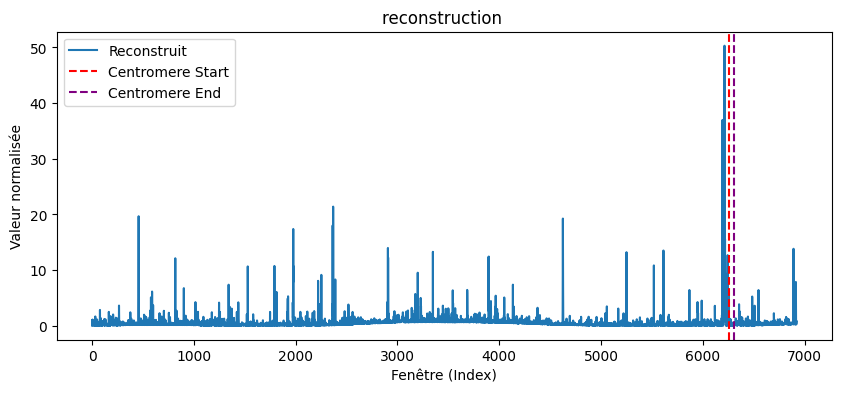

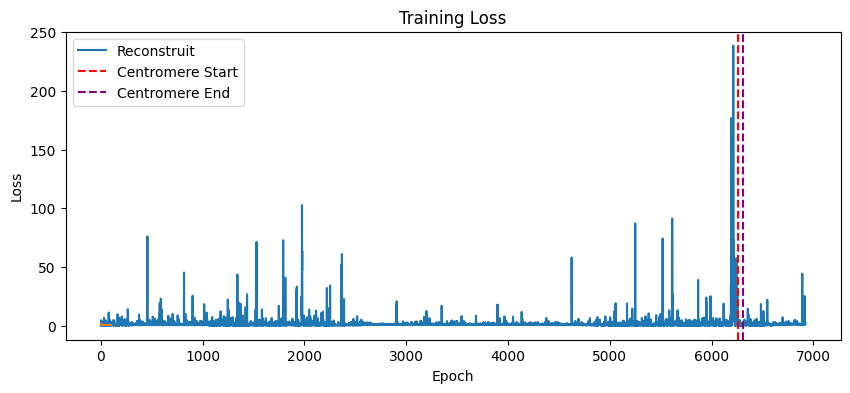

[[<tf.Tensor: shape=(2590,), dtype=float32, numpy=
array([0.31590226, 0.31316087, 0.35751274, ..., 3.9437532 , 0.4415097 ,
       2.143604  ], dtype=float32)>, array([ 0.7704763,  0.7634586,  0.871963 , ..., 17.469673 ,  1.9557719,
        9.495667 ], dtype=float32)], [<tf.Tensor: shape=(3458,), dtype=float32, numpy=
array([0.84758735, 0.75183105, 0.78168184, ..., 0.8472217 , 0.73171717,
       0.69455117], dtype=float32)>, array([1.0952119, 0.9719387, 1.0110059, ..., 1.5214452, 1.3135943,
       1.2464677], dtype=float32)], [<tf.Tensor: shape=(3746,), dtype=float32, numpy=
array([0.30874923, 0.40268493, 0.3191041 , ..., 1.4542493 , 1.4084473 ,
       1.4887613 ], dtype=float32)>, array([0.78956646, 1.0295734 , 0.8157056 , ..., 1.2307026 , 1.1916574 ,
       1.2593096 ], dtype=float32)], [<tf.Tensor: shape=(4629,), dtype=float32, numpy=
array([0.52157134, 0.62983674, 0.6286797 , ..., 0.90355587, 0.779844  ,
       0.738602  ], dtype=float32)>, array([0.97224534, 1.1746576 , 1.1730971 ,

  8%|███▍                                       | 8/100 [00:00<00:02, 36.72it/s]

Epoch 1, Loss: 1.211820363998413
Epoch 2, Loss: 1.1751127243041992
Epoch 3, Loss: 1.1393159627914429
Epoch 4, Loss: 1.1046150922775269
Epoch 5, Loss: 1.0711332559585571
Epoch 6, Loss: 1.0388977527618408
Epoch 7, Loss: 1.0078926086425781
Epoch 8, Loss: 0.9780803322792053


 16%|██████▋                                   | 16/100 [00:00<00:02, 37.37it/s]

Epoch 9, Loss: 0.9494807720184326
Epoch 10, Loss: 0.9220942854881287
Epoch 11, Loss: 0.8959459662437439
Epoch 12, Loss: 0.8710805177688599
Epoch 13, Loss: 0.8475229740142822
Epoch 14, Loss: 0.8253093361854553
Epoch 15, Loss: 0.8044673800468445
Epoch 16, Loss: 0.7850074172019958


 24%|██████████                                | 24/100 [00:00<00:02, 37.81it/s]

Epoch 17, Loss: 0.7669313549995422
Epoch 18, Loss: 0.7502346038818359
Epoch 19, Loss: 0.7348970770835876
Epoch 20, Loss: 0.7208768129348755
Epoch 21, Loss: 0.708125650882721
Epoch 22, Loss: 0.6965819597244263
Epoch 23, Loss: 0.6861718893051147
Epoch 24, Loss: 0.676819384098053


 32%|█████████████▍                            | 32/100 [00:00<00:01, 37.61it/s]

Epoch 25, Loss: 0.6684399247169495
Epoch 26, Loss: 0.6609434485435486
Epoch 27, Loss: 0.6542448997497559
Epoch 28, Loss: 0.648266077041626
Epoch 29, Loss: 0.6429307460784912
Epoch 30, Loss: 0.6381681561470032
Epoch 31, Loss: 0.633911669254303
Epoch 32, Loss: 0.6301042437553406


 40%|████████████████▊                         | 40/100 [00:01<00:01, 37.62it/s]

Epoch 33, Loss: 0.6266918778419495
Epoch 34, Loss: 0.6236280202865601
Epoch 35, Loss: 0.6208711862564087
Epoch 36, Loss: 0.6183846592903137
Epoch 37, Loss: 0.6161366105079651
Epoch 38, Loss: 0.61409991979599
Epoch 39, Loss: 0.6122503280639648
Epoch 40, Loss: 0.6105672717094421


 48%|████████████████████▏                     | 48/100 [00:01<00:01, 36.77it/s]

Epoch 41, Loss: 0.609032392501831
Epoch 42, Loss: 0.6076297163963318
Epoch 43, Loss: 0.6063451170921326
Epoch 44, Loss: 0.6051661372184753
Epoch 45, Loss: 0.6040815114974976
Epoch 46, Loss: 0.6030812859535217
Epoch 47, Loss: 0.6021568179130554
Epoch 48, Loss: 0.6013004779815674


 52%|█████████████████████▊                    | 52/100 [00:01<00:01, 35.49it/s]

Epoch 49, Loss: 0.6005057692527771
Epoch 50, Loss: 0.5997671484947205
Epoch 51, Loss: 0.5990797281265259
Epoch 52, Loss: 0.5984393954277039
Epoch 53, Loss: 0.5978423357009888
Epoch 54, Loss: 0.5972847938537598
Epoch 55, Loss: 0.5967644453048706


 60%|█████████████████████████▏                | 60/100 [00:01<00:01, 34.40it/s]

Epoch 56, Loss: 0.5962781310081482
Epoch 57, Loss: 0.5958232879638672
Epoch 58, Loss: 0.5953973531723022
Epoch 59, Loss: 0.594998300075531
Epoch 60, Loss: 0.594623327255249
Epoch 61, Loss: 0.5942710638046265
Epoch 62, Loss: 0.5939390063285828


 68%|████████████████████████████▌             | 68/100 [00:01<00:00, 34.02it/s]

Epoch 63, Loss: 0.5936257243156433
Epoch 64, Loss: 0.5933294892311096
Epoch 65, Loss: 0.5930490493774414
Epoch 66, Loss: 0.5927830338478088
Epoch 67, Loss: 0.5925301313400269
Epoch 68, Loss: 0.5922888517379761
Epoch 69, Loss: 0.5920587778091431


 76%|███████████████████████████████▉          | 76/100 [00:02<00:00, 33.76it/s]

Epoch 70, Loss: 0.5918387770652771
Epoch 71, Loss: 0.5916281342506409
Epoch 72, Loss: 0.5914261937141418
Epoch 73, Loss: 0.5912322998046875
Epoch 74, Loss: 0.5910463333129883
Epoch 75, Loss: 0.5908675193786621
Epoch 76, Loss: 0.5906952619552612


 84%|███████████████████████████████████▎      | 84/100 [00:02<00:00, 35.37it/s]

Epoch 77, Loss: 0.5905292630195618
Epoch 78, Loss: 0.5903692841529846
Epoch 79, Loss: 0.5902147889137268
Epoch 80, Loss: 0.5900654196739197
Epoch 81, Loss: 0.5899211764335632
Epoch 82, Loss: 0.5897815823554993
Epoch 83, Loss: 0.5896466374397278
Epoch 84, Loss: 0.5895159840583801


 92%|██████████████████████████████████████▋   | 92/100 [00:02<00:00, 36.44it/s]

Epoch 85, Loss: 0.5893892049789429
Epoch 86, Loss: 0.5892664790153503
Epoch 87, Loss: 0.5891473293304443
Epoch 88, Loss: 0.5890318751335144
Epoch 89, Loss: 0.5889199376106262
Epoch 90, Loss: 0.5888112187385559
Epoch 91, Loss: 0.5887057185173035
Epoch 92, Loss: 0.5886030793190002


100%|█████████████████████████████████████████| 100/100 [00:02<00:00, 35.97it/s]

Epoch 93, Loss: 0.5885034203529358
Epoch 94, Loss: 0.5884064435958862
Epoch 95, Loss: 0.5883119702339172
Epoch 96, Loss: 0.5882200002670288
Epoch 97, Loss: 0.588130533695221
Epoch 98, Loss: 0.5880434513092041
Epoch 99, Loss: 0.5879584550857544
Epoch 100, Loss: 0.5878756642341614


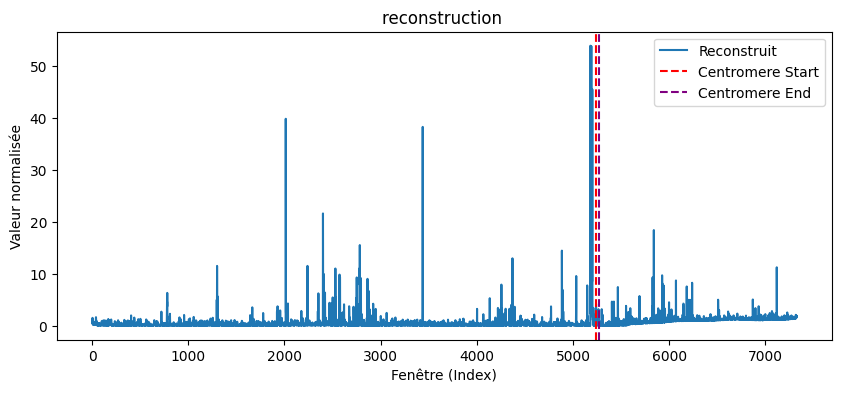

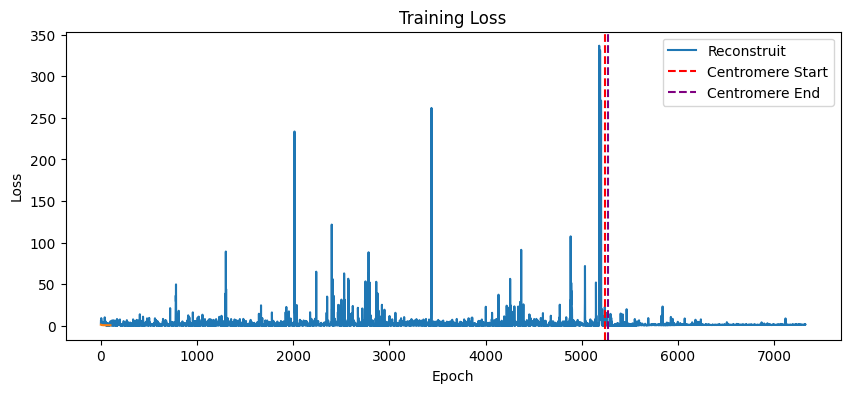

[[<tf.Tensor: shape=(2590,), dtype=float32, numpy=
array([0.31590226, 0.31316087, 0.35751274, ..., 3.9437532 , 0.4415097 ,
       2.143604  ], dtype=float32)>, array([ 0.7704763,  0.7634586,  0.871963 , ..., 17.469673 ,  1.9557719,
        9.495667 ], dtype=float32)], [<tf.Tensor: shape=(3458,), dtype=float32, numpy=
array([0.84758735, 0.75183105, 0.78168184, ..., 0.8472217 , 0.73171717,
       0.69455117], dtype=float32)>, array([1.0952119, 0.9719387, 1.0110059, ..., 1.5214452, 1.3135943,
       1.2464677], dtype=float32)], [<tf.Tensor: shape=(3746,), dtype=float32, numpy=
array([0.30874923, 0.40268493, 0.3191041 , ..., 1.4542493 , 1.4084473 ,
       1.4887613 ], dtype=float32)>, array([0.78956646, 1.0295734 , 0.8157056 , ..., 1.2307026 , 1.1916574 ,
       1.2593096 ], dtype=float32)], [<tf.Tensor: shape=(4629,), dtype=float32, numpy=
array([0.52157134, 0.62983674, 0.6286797 , ..., 0.90355587, 0.779844  ,
       0.738602  ], dtype=float32)>, array([0.97224534, 1.1746576 , 1.1730971 ,

  8%|███▍                                       | 8/100 [00:00<00:02, 37.11it/s]

Epoch 1, Loss: 1.245144009590149
Epoch 2, Loss: 1.2109222412109375
Epoch 3, Loss: 1.1773676872253418
Epoch 4, Loss: 1.1448487043380737
Epoch 5, Loss: 1.1135506629943848
Epoch 6, Loss: 1.083625316619873
Epoch 7, Loss: 1.0550729036331177
Epoch 8, Loss: 1.0279245376586914


 16%|██████▋                                   | 16/100 [00:00<00:02, 37.55it/s]

Epoch 9, Loss: 1.0020654201507568
Epoch 10, Loss: 0.9774261116981506
Epoch 11, Loss: 0.9539747834205627
Epoch 12, Loss: 0.9316591620445251
Epoch 13, Loss: 0.9104540944099426
Epoch 14, Loss: 0.8903457522392273
Epoch 15, Loss: 0.8713303208351135
Epoch 16, Loss: 0.8533855676651001


 24%|██████████                                | 24/100 [00:00<00:02, 37.63it/s]

Epoch 17, Loss: 0.836488664150238
Epoch 18, Loss: 0.8206197023391724
Epoch 19, Loss: 0.8057434558868408
Epoch 20, Loss: 0.7918316721916199
Epoch 21, Loss: 0.7788494825363159
Epoch 22, Loss: 0.7667720317840576
Epoch 23, Loss: 0.7555710673332214
Epoch 24, Loss: 0.7452139258384705


 32%|█████████████▍                            | 32/100 [00:00<00:01, 37.03it/s]

Epoch 25, Loss: 0.7356710433959961
Epoch 26, Loss: 0.7269079685211182
Epoch 27, Loss: 0.7188859581947327
Epoch 28, Loss: 0.7115634679794312
Epoch 29, Loss: 0.7048936486244202
Epoch 30, Loss: 0.6988294124603271
Epoch 31, Loss: 0.693321704864502
Epoch 32, Loss: 0.6883204579353333


 40%|████████████████▊                         | 40/100 [00:01<00:01, 37.27it/s]

Epoch 33, Loss: 0.6837793588638306
Epoch 34, Loss: 0.6796531677246094
Epoch 35, Loss: 0.6759020090103149
Epoch 36, Loss: 0.6724896430969238
Epoch 37, Loss: 0.669382631778717
Epoch 38, Loss: 0.6665514707565308
Epoch 39, Loss: 0.6639705896377563
Epoch 40, Loss: 0.6616160273551941


 48%|████████████████████▏                     | 48/100 [00:01<00:01, 37.13it/s]

Epoch 41, Loss: 0.6594670414924622
Epoch 42, Loss: 0.6575028896331787
Epoch 43, Loss: 0.6557051539421082
Epoch 44, Loss: 0.6540584564208984
Epoch 45, Loss: 0.6525476574897766
Epoch 46, Loss: 0.651161789894104
Epoch 47, Loss: 0.6498920321464539
Epoch 48, Loss: 0.6487303972244263


 56%|███████████████████████▌                  | 56/100 [00:01<00:01, 37.25it/s]

Epoch 49, Loss: 0.6476696133613586
Epoch 50, Loss: 0.6467021107673645
Epoch 51, Loss: 0.6458209156990051
Epoch 52, Loss: 0.6450188159942627
Epoch 53, Loss: 0.6442883014678955
Epoch 54, Loss: 0.6436222791671753
Epoch 55, Loss: 0.6430131793022156
Epoch 56, Loss: 0.6424539685249329


 64%|██████████████████████████▉               | 64/100 [00:01<00:00, 36.11it/s]

Epoch 57, Loss: 0.6419383883476257
Epoch 58, Loss: 0.6414600610733032
Epoch 59, Loss: 0.6410131454467773
Epoch 60, Loss: 0.6405927538871765
Epoch 61, Loss: 0.6401941776275635
Epoch 62, Loss: 0.6398144960403442
Epoch 63, Loss: 0.6394512057304382
Epoch 64, Loss: 0.6391035914421082


 72%|██████████████████████████████▏           | 72/100 [00:01<00:00, 35.42it/s]

Epoch 65, Loss: 0.638771116733551
Epoch 66, Loss: 0.6384537220001221
Epoch 67, Loss: 0.6381518244743347
Epoch 68, Loss: 0.6378654837608337
Epoch 69, Loss: 0.6375945806503296
Epoch 70, Loss: 0.6373388171195984
Epoch 71, Loss: 0.6370971202850342
Epoch 72, Loss: 0.6368690729141235


 80%|█████████████████████████████████▌        | 80/100 [00:02<00:00, 36.00it/s]

Epoch 73, Loss: 0.6366540789604187
Epoch 74, Loss: 0.6364496350288391
Epoch 75, Loss: 0.636255145072937
Epoch 76, Loss: 0.6360698938369751
Epoch 77, Loss: 0.6358932256698608
Epoch 78, Loss: 0.6357243657112122
Epoch 79, Loss: 0.635563313961029
Epoch 80, Loss: 0.6354094743728638


 88%|████████████████████████████████████▉     | 88/100 [00:02<00:00, 36.27it/s]

Epoch 81, Loss: 0.6352624297142029
Epoch 82, Loss: 0.6351216435432434
Epoch 83, Loss: 0.6349868774414062
Epoch 84, Loss: 0.6348576545715332
Epoch 85, Loss: 0.6347336173057556
Epoch 86, Loss: 0.6346147060394287
Epoch 87, Loss: 0.6345006823539734
Epoch 88, Loss: 0.6343914270401001


 96%|████████████████████████████████████████▎ | 96/100 [00:02<00:00, 36.70it/s]

Epoch 89, Loss: 0.6342868208885193
Epoch 90, Loss: 0.6341866254806519
Epoch 91, Loss: 0.6340906620025635
Epoch 92, Loss: 0.6339985132217407
Epoch 93, Loss: 0.6339101791381836
Epoch 94, Loss: 0.6338251233100891
Epoch 95, Loss: 0.6337432265281677
Epoch 96, Loss: 0.6336641907691956


100%|█████████████████████████████████████████| 100/100 [00:02<00:00, 36.66it/s]


Epoch 97, Loss: 0.6335880160331726
Epoch 98, Loss: 0.633514404296875
Epoch 99, Loss: 0.6334435343742371
Epoch 100, Loss: 0.6333751082420349


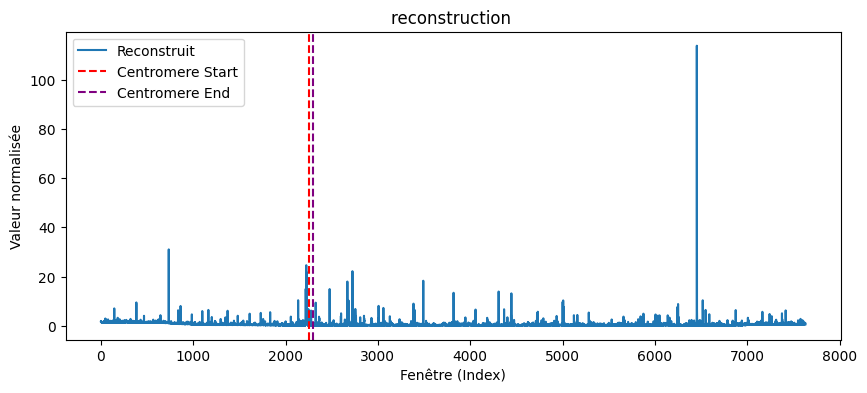

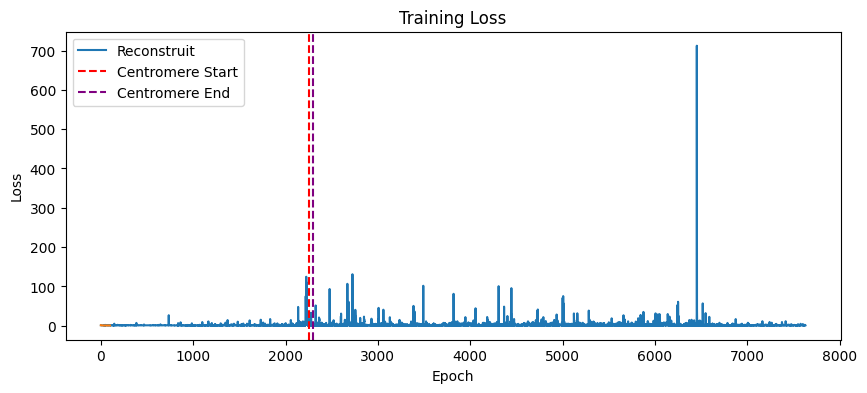

[[<tf.Tensor: shape=(2590,), dtype=float32, numpy=
array([0.31590226, 0.31316087, 0.35751274, ..., 3.9437532 , 0.4415097 ,
       2.143604  ], dtype=float32)>, array([ 0.7704763,  0.7634586,  0.871963 , ..., 17.469673 ,  1.9557719,
        9.495667 ], dtype=float32)], [<tf.Tensor: shape=(3458,), dtype=float32, numpy=
array([0.84758735, 0.75183105, 0.78168184, ..., 0.8472217 , 0.73171717,
       0.69455117], dtype=float32)>, array([1.0952119, 0.9719387, 1.0110059, ..., 1.5214452, 1.3135943,
       1.2464677], dtype=float32)], [<tf.Tensor: shape=(3746,), dtype=float32, numpy=
array([0.30874923, 0.40268493, 0.3191041 , ..., 1.4542493 , 1.4084473 ,
       1.4887613 ], dtype=float32)>, array([0.78956646, 1.0295734 , 0.8157056 , ..., 1.2307026 , 1.1916574 ,
       1.2593096 ], dtype=float32)], [<tf.Tensor: shape=(4629,), dtype=float32, numpy=
array([0.52157134, 0.62983674, 0.6286797 , ..., 0.90355587, 0.779844  ,
       0.738602  ], dtype=float32)>, array([0.97224534, 1.1746576 , 1.1730971 ,

  8%|███▍                                       | 8/100 [00:00<00:02, 36.21it/s]

Epoch 1, Loss: 1.3157955408096313
Epoch 2, Loss: 1.2747012376785278
Epoch 3, Loss: 1.2338758707046509
Epoch 4, Loss: 1.1948258876800537
Epoch 5, Loss: 1.1571749448776245
Epoch 6, Loss: 1.1204795837402344
Epoch 7, Loss: 1.0845892429351807
Epoch 8, Loss: 1.0495707988739014


 16%|██████▋                                   | 16/100 [00:00<00:02, 37.39it/s]

Epoch 9, Loss: 1.015763759613037
Epoch 10, Loss: 0.9835346341133118
Epoch 11, Loss: 0.9530602097511292
Epoch 12, Loss: 0.9243514537811279
Epoch 13, Loss: 0.8973660469055176
Epoch 14, Loss: 0.8720425963401794
Epoch 15, Loss: 0.8483274579048157
Epoch 16, Loss: 0.8261942267417908


 24%|██████████                                | 24/100 [00:00<00:02, 37.33it/s]

Epoch 17, Loss: 0.8055883646011353
Epoch 18, Loss: 0.7864579558372498
Epoch 19, Loss: 0.7687565684318542
Epoch 20, Loss: 0.7524429559707642
Epoch 21, Loss: 0.737473726272583
Epoch 22, Loss: 0.7237963676452637
Epoch 23, Loss: 0.7113534808158875
Epoch 24, Loss: 0.7000770568847656


 32%|█████████████▍                            | 32/100 [00:00<00:01, 37.68it/s]

Epoch 25, Loss: 0.6898910999298096
Epoch 26, Loss: 0.6807204484939575
Epoch 27, Loss: 0.6724858283996582
Epoch 28, Loss: 0.6651097536087036
Epoch 29, Loss: 0.658515214920044
Epoch 30, Loss: 0.6526258587837219
Epoch 31, Loss: 0.6473692655563354
Epoch 32, Loss: 0.6426786780357361


 40%|████████████████▊                         | 40/100 [00:01<00:01, 37.74it/s]

Epoch 33, Loss: 0.6384904980659485
Epoch 34, Loss: 0.6347459554672241
Epoch 35, Loss: 0.6313919425010681
Epoch 36, Loss: 0.6283805966377258
Epoch 37, Loss: 0.6256694197654724
Epoch 38, Loss: 0.6232211589813232
Epoch 39, Loss: 0.6210037469863892
Epoch 40, Loss: 0.6189892888069153


 48%|████████████████████▏                     | 48/100 [00:01<00:01, 37.94it/s]

Epoch 41, Loss: 0.6171529293060303
Epoch 42, Loss: 0.6154736876487732
Epoch 43, Loss: 0.6139348745346069
Epoch 44, Loss: 0.612521231174469
Epoch 45, Loss: 0.6112197637557983
Epoch 46, Loss: 0.6100190281867981
Epoch 47, Loss: 0.6089097261428833
Epoch 48, Loss: 0.6078831553459167


 56%|███████████████████████▌                  | 56/100 [00:01<00:01, 38.00it/s]

Epoch 49, Loss: 0.6069318056106567
Epoch 50, Loss: 0.606049656867981
Epoch 51, Loss: 0.605230450630188
Epoch 52, Loss: 0.6044690012931824
Epoch 53, Loss: 0.6037601232528687
Epoch 54, Loss: 0.6031003594398499
Epoch 55, Loss: 0.6024855971336365
Epoch 56, Loss: 0.6019125580787659


 64%|██████████████████████████▉               | 64/100 [00:01<00:00, 37.55it/s]

Epoch 57, Loss: 0.6013773083686829
Epoch 58, Loss: 0.6008768677711487
Epoch 59, Loss: 0.6004090905189514
Epoch 60, Loss: 0.5999705195426941
Epoch 61, Loss: 0.5995598435401917
Epoch 62, Loss: 0.5991746187210083
Epoch 63, Loss: 0.5988127589225769
Epoch 64, Loss: 0.5984713435173035


 72%|██████████████████████████████▏           | 72/100 [00:01<00:00, 36.65it/s]

Epoch 65, Loss: 0.5981492400169373
Epoch 66, Loss: 0.5978459119796753
Epoch 67, Loss: 0.5975591540336609
Epoch 68, Loss: 0.5972877740859985
Epoch 69, Loss: 0.5970306992530823
Epoch 70, Loss: 0.5967864990234375
Epoch 71, Loss: 0.5965542197227478
Epoch 72, Loss: 0.5963330268859863


 80%|█████████████████████████████████▌        | 80/100 [00:02<00:00, 36.02it/s]

Epoch 73, Loss: 0.5961216688156128
Epoch 74, Loss: 0.595919132232666
Epoch 75, Loss: 0.5957253575325012
Epoch 76, Loss: 0.5955392718315125
Epoch 77, Loss: 0.5953603386878967
Epoch 78, Loss: 0.5951882600784302
Epoch 79, Loss: 0.5950223207473755
Epoch 80, Loss: 0.5948620438575745


 88%|████████████████████████████████████▉     | 88/100 [00:02<00:00, 36.50it/s]

Epoch 81, Loss: 0.5947074890136719
Epoch 82, Loss: 0.5945580005645752
Epoch 83, Loss: 0.5944133400917053
Epoch 84, Loss: 0.5942733883857727
Epoch 85, Loss: 0.5941376686096191
Epoch 86, Loss: 0.5940062403678894
Epoch 87, Loss: 0.5938788056373596
Epoch 88, Loss: 0.5937552452087402


 96%|████████████████████████████████████████▎ | 96/100 [00:02<00:00, 36.30it/s]

Epoch 89, Loss: 0.5936353802680969
Epoch 90, Loss: 0.5935190916061401
Epoch 91, Loss: 0.5934062600135803
Epoch 92, Loss: 0.5932965278625488
Epoch 93, Loss: 0.5931902527809143
Epoch 94, Loss: 0.593086838722229
Epoch 95, Loss: 0.592986524105072
Epoch 96, Loss: 0.5928888320922852


100%|█████████████████████████████████████████| 100/100 [00:02<00:00, 36.96it/s]


Epoch 97, Loss: 0.5927938222885132
Epoch 98, Loss: 0.5927016139030457
Epoch 99, Loss: 0.5926117300987244
Epoch 100, Loss: 0.5925242304801941


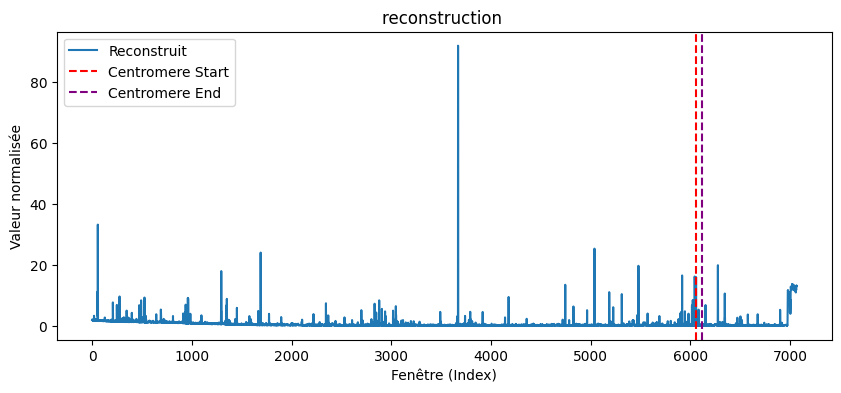

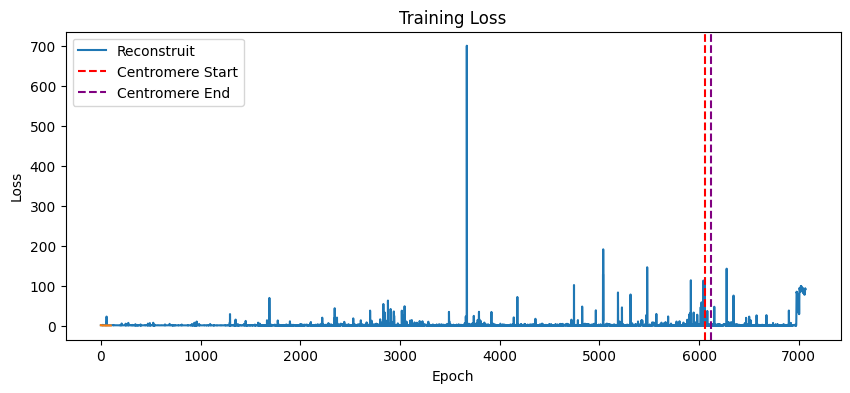

[[<tf.Tensor: shape=(2590,), dtype=float32, numpy=
array([0.31590226, 0.31316087, 0.35751274, ..., 3.9437532 , 0.4415097 ,
       2.143604  ], dtype=float32)>, array([ 0.7704763,  0.7634586,  0.871963 , ..., 17.469673 ,  1.9557719,
        9.495667 ], dtype=float32)], [<tf.Tensor: shape=(3458,), dtype=float32, numpy=
array([0.84758735, 0.75183105, 0.78168184, ..., 0.8472217 , 0.73171717,
       0.69455117], dtype=float32)>, array([1.0952119, 0.9719387, 1.0110059, ..., 1.5214452, 1.3135943,
       1.2464677], dtype=float32)], [<tf.Tensor: shape=(3746,), dtype=float32, numpy=
array([0.30874923, 0.40268493, 0.3191041 , ..., 1.4542493 , 1.4084473 ,
       1.4887613 ], dtype=float32)>, array([0.78956646, 1.0295734 , 0.8157056 , ..., 1.2307026 , 1.1916574 ,
       1.2593096 ], dtype=float32)], [<tf.Tensor: shape=(4629,), dtype=float32, numpy=
array([0.52157134, 0.62983674, 0.6286797 , ..., 0.90355587, 0.779844  ,
       0.738602  ], dtype=float32)>, array([0.97224534, 1.1746576 , 1.1730971 ,

  8%|███▍                                       | 8/100 [00:00<00:02, 36.80it/s]

Epoch 1, Loss: 1.304227352142334
Epoch 2, Loss: 1.2616760730743408
Epoch 3, Loss: 1.2211029529571533
Epoch 4, Loss: 1.1826090812683105
Epoch 5, Loss: 1.1461546421051025
Epoch 6, Loss: 1.1116818189620972
Epoch 7, Loss: 1.07914400100708
Epoch 8, Loss: 1.048456072807312


 16%|██████▋                                   | 16/100 [00:00<00:02, 37.59it/s]

Epoch 9, Loss: 1.0194947719573975
Epoch 10, Loss: 0.9921500086784363
Epoch 11, Loss: 0.9663049578666687
Epoch 12, Loss: 0.941832959651947
Epoch 13, Loss: 0.9186466932296753
Epoch 14, Loss: 0.896678626537323
Epoch 15, Loss: 0.8758679032325745
Epoch 16, Loss: 0.8561664819717407


 24%|██████████                                | 24/100 [00:00<00:02, 37.20it/s]

Epoch 17, Loss: 0.8375364542007446
Epoch 18, Loss: 0.8199347853660583
Epoch 19, Loss: 0.8033268451690674
Epoch 20, Loss: 0.7876669764518738
Epoch 21, Loss: 0.772916853427887
Epoch 22, Loss: 0.7590343952178955
Epoch 23, Loss: 0.7459831833839417
Epoch 24, Loss: 0.7337302565574646


 32%|█████████████▍                            | 32/100 [00:00<00:01, 37.50it/s]

Epoch 25, Loss: 0.7222474813461304
Epoch 26, Loss: 0.7115074396133423
Epoch 27, Loss: 0.7014849185943604
Epoch 28, Loss: 0.6921563744544983
Epoch 29, Loss: 0.6834974884986877
Epoch 30, Loss: 0.6754827499389648
Epoch 31, Loss: 0.6680883765220642
Epoch 32, Loss: 0.6612864136695862


 40%|████████████████▊                         | 40/100 [00:01<00:01, 37.41it/s]

Epoch 33, Loss: 0.655047595500946
Epoch 34, Loss: 0.6493434309959412
Epoch 35, Loss: 0.6441430449485779
Epoch 36, Loss: 0.6394143104553223
Epoch 37, Loss: 0.6351233124732971
Epoch 38, Loss: 0.6312370896339417
Epoch 39, Loss: 0.6277220249176025
Epoch 40, Loss: 0.6245447397232056


 48%|████████████████████▏                     | 48/100 [00:01<00:01, 37.44it/s]

Epoch 41, Loss: 0.6216731071472168
Epoch 42, Loss: 0.6190762519836426
Epoch 43, Loss: 0.616725504398346
Epoch 44, Loss: 0.6145935654640198
Epoch 45, Loss: 0.6126559376716614
Epoch 46, Loss: 0.610890805721283
Epoch 47, Loss: 0.609279215335846
Epoch 48, Loss: 0.6078053712844849


 56%|███████████████████████▌                  | 56/100 [00:01<00:01, 37.42it/s]

Epoch 49, Loss: 0.6064544320106506
Epoch 50, Loss: 0.6052141189575195
Epoch 51, Loss: 0.6040738821029663
Epoch 52, Loss: 0.603024423122406
Epoch 53, Loss: 0.6020569801330566
Epoch 54, Loss: 0.6011633276939392
Epoch 55, Loss: 0.6003363728523254
Epoch 56, Loss: 0.5995687246322632


 64%|██████████████████████████▉               | 64/100 [00:01<00:00, 36.77it/s]

Epoch 57, Loss: 0.5988544225692749
Epoch 58, Loss: 0.5981875658035278
Epoch 59, Loss: 0.5975631475448608
Epoch 60, Loss: 0.5969767570495605
Epoch 61, Loss: 0.59642493724823
Epoch 62, Loss: 0.5959047079086304
Epoch 63, Loss: 0.5954138040542603
Epoch 64, Loss: 0.5949501991271973


 72%|██████████████████████████████▏           | 72/100 [00:01<00:00, 36.83it/s]

Epoch 65, Loss: 0.5945124626159668
Epoch 66, Loss: 0.5940990447998047
Epoch 67, Loss: 0.5937085747718811
Epoch 68, Loss: 0.5933400988578796
Epoch 69, Loss: 0.5929922461509705
Epoch 70, Loss: 0.5926638841629028
Epoch 71, Loss: 0.592353105545044
Epoch 72, Loss: 0.5920590758323669


 80%|█████████████████████████████████▌        | 80/100 [00:02<00:00, 36.40it/s]

Epoch 73, Loss: 0.5917799472808838
Epoch 74, Loss: 0.5915143489837646
Epoch 75, Loss: 0.591261088848114
Epoch 76, Loss: 0.5910191535949707
Epoch 77, Loss: 0.5907873511314392
Epoch 78, Loss: 0.5905649065971375
Epoch 79, Loss: 0.5903512835502625
Epoch 80, Loss: 0.5901457071304321


 88%|████████████████████████████████████▉     | 88/100 [00:02<00:00, 35.98it/s]

Epoch 81, Loss: 0.5899476408958435
Epoch 82, Loss: 0.5897567868232727
Epoch 83, Loss: 0.5895728468894958
Epoch 84, Loss: 0.58939528465271
Epoch 85, Loss: 0.5892238616943359
Epoch 86, Loss: 0.5890581607818604
Epoch 87, Loss: 0.5888981819152832
Epoch 88, Loss: 0.5887436866760254


 96%|████████████████████████████████████████▎ | 96/100 [00:02<00:00, 36.29it/s]

Epoch 89, Loss: 0.5885945558547974
Epoch 90, Loss: 0.5884504914283752
Epoch 91, Loss: 0.5883113145828247
Epoch 92, Loss: 0.5881768465042114
Epoch 93, Loss: 0.5880468487739563
Epoch 94, Loss: 0.5879212021827698
Epoch 95, Loss: 0.5877999067306519
Epoch 96, Loss: 0.5876826047897339


100%|█████████████████████████████████████████| 100/100 [00:02<00:00, 36.74it/s]


Epoch 97, Loss: 0.5875693559646606
Epoch 98, Loss: 0.5874598026275635
Epoch 99, Loss: 0.5873539447784424
Epoch 100, Loss: 0.5872514843940735


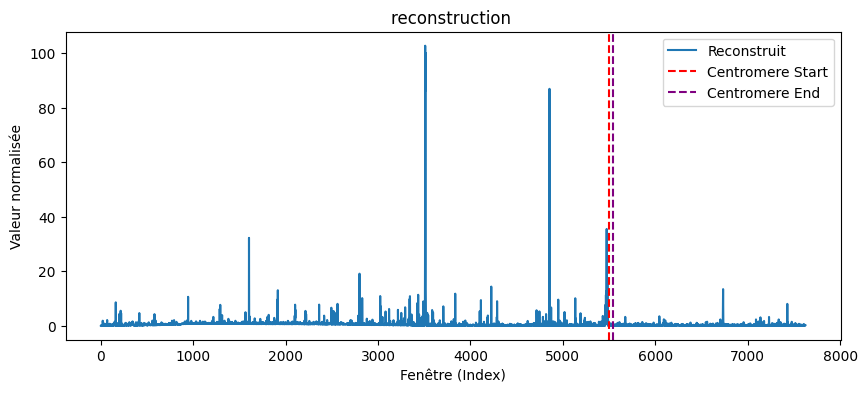

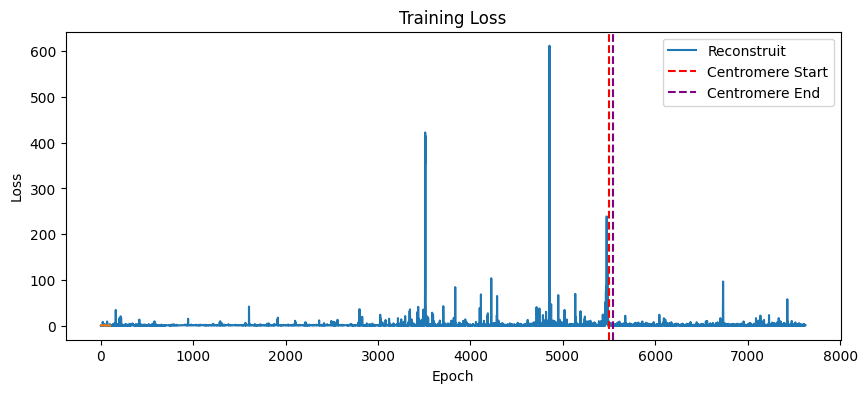

[[<tf.Tensor: shape=(2590,), dtype=float32, numpy=
array([0.31590226, 0.31316087, 0.35751274, ..., 3.9437532 , 0.4415097 ,
       2.143604  ], dtype=float32)>, array([ 0.7704763,  0.7634586,  0.871963 , ..., 17.469673 ,  1.9557719,
        9.495667 ], dtype=float32)], [<tf.Tensor: shape=(3458,), dtype=float32, numpy=
array([0.84758735, 0.75183105, 0.78168184, ..., 0.8472217 , 0.73171717,
       0.69455117], dtype=float32)>, array([1.0952119, 0.9719387, 1.0110059, ..., 1.5214452, 1.3135943,
       1.2464677], dtype=float32)], [<tf.Tensor: shape=(3746,), dtype=float32, numpy=
array([0.30874923, 0.40268493, 0.3191041 , ..., 1.4542493 , 1.4084473 ,
       1.4887613 ], dtype=float32)>, array([0.78956646, 1.0295734 , 0.8157056 , ..., 1.2307026 , 1.1916574 ,
       1.2593096 ], dtype=float32)], [<tf.Tensor: shape=(4629,), dtype=float32, numpy=
array([0.52157134, 0.62983674, 0.6286797 , ..., 0.90355587, 0.779844  ,
       0.738602  ], dtype=float32)>, array([0.97224534, 1.1746576 , 1.1730971 ,

  8%|███▍                                       | 8/100 [00:00<00:02, 35.67it/s]

Epoch 1, Loss: 1.2239717245101929
Epoch 2, Loss: 1.185153603553772
Epoch 3, Loss: 1.1470468044281006
Epoch 4, Loss: 1.1099481582641602
Epoch 5, Loss: 1.073931097984314
Epoch 6, Loss: 1.0389697551727295
Epoch 7, Loss: 1.0050151348114014
Epoch 8, Loss: 0.9720983505249023


 16%|██████▋                                   | 16/100 [00:00<00:02, 36.36it/s]

Epoch 9, Loss: 0.9403370022773743
Epoch 10, Loss: 0.9098659753799438
Epoch 11, Loss: 0.8808357119560242
Epoch 12, Loss: 0.8533821702003479
Epoch 13, Loss: 0.8275817036628723
Epoch 14, Loss: 0.8034853339195251
Epoch 15, Loss: 0.7811046242713928
Epoch 16, Loss: 0.7604420185089111


 24%|██████████                                | 24/100 [00:00<00:02, 36.24it/s]

Epoch 17, Loss: 0.7414746284484863
Epoch 18, Loss: 0.7241513729095459
Epoch 19, Loss: 0.7084044218063354
Epoch 20, Loss: 0.694154679775238
Epoch 21, Loss: 0.681308925151825
Epoch 22, Loss: 0.6697697639465332
Epoch 23, Loss: 0.6594256162643433
Epoch 24, Loss: 0.6501678228378296


 32%|█████████████▍                            | 32/100 [00:00<00:01, 36.66it/s]

Epoch 25, Loss: 0.6418933868408203
Epoch 26, Loss: 0.63450026512146
Epoch 27, Loss: 0.6278921365737915
Epoch 28, Loss: 0.6219819188117981
Epoch 29, Loss: 0.6166906952857971
Epoch 30, Loss: 0.6119458079338074
Epoch 31, Loss: 0.6076828837394714
Epoch 32, Loss: 0.6038447022438049


 40%|████████████████▊                         | 40/100 [00:01<00:01, 36.38it/s]

Epoch 33, Loss: 0.6003825068473816
Epoch 34, Loss: 0.5972521901130676
Epoch 35, Loss: 0.5944151878356934
Epoch 36, Loss: 0.5918389558792114
Epoch 37, Loss: 0.5894942879676819
Epoch 38, Loss: 0.587356448173523
Epoch 39, Loss: 0.585403561592102
Epoch 40, Loss: 0.5836169123649597


 48%|████████████████████▏                     | 48/100 [00:01<00:01, 36.80it/s]

Epoch 41, Loss: 0.5819796919822693
Epoch 42, Loss: 0.5804774165153503
Epoch 43, Loss: 0.5790966153144836
Epoch 44, Loss: 0.5778259634971619
Epoch 45, Loss: 0.5766553282737732
Epoch 46, Loss: 0.5755753517150879
Epoch 47, Loss: 0.5745779871940613
Epoch 48, Loss: 0.5736555457115173


 56%|███████████████████████▌                  | 56/100 [00:01<00:01, 36.82it/s]

Epoch 49, Loss: 0.5728015303611755
Epoch 50, Loss: 0.572009801864624
Epoch 51, Loss: 0.5712746381759644
Epoch 52, Loss: 0.5705914497375488
Epoch 53, Loss: 0.5699557662010193
Epoch 54, Loss: 0.5693636536598206
Epoch 55, Loss: 0.5688113570213318
Epoch 56, Loss: 0.5682958364486694


 64%|██████████████████████████▉               | 64/100 [00:01<00:00, 36.46it/s]

Epoch 57, Loss: 0.5678141713142395
Epoch 58, Loss: 0.567363440990448
Epoch 59, Loss: 0.566941499710083
Epoch 60, Loss: 0.5665459632873535
Epoch 61, Loss: 0.5661749839782715
Epoch 62, Loss: 0.565826416015625
Epoch 63, Loss: 0.5654987692832947
Epoch 64, Loss: 0.5651900768280029


 72%|██████████████████████████████▏           | 72/100 [00:01<00:00, 36.43it/s]

Epoch 65, Loss: 0.5648990869522095
Epoch 66, Loss: 0.5646239519119263
Epoch 67, Loss: 0.5643636584281921
Epoch 68, Loss: 0.5641169548034668
Epoch 69, Loss: 0.5638828277587891
Epoch 70, Loss: 0.5636600852012634
Epoch 71, Loss: 0.5634479522705078
Epoch 72, Loss: 0.5632454752922058


 76%|███████████████████████████████▉          | 76/100 [00:02<00:00, 35.90it/s]

Epoch 73, Loss: 0.5630521774291992
Epoch 74, Loss: 0.5628671050071716
Epoch 75, Loss: 0.5626898407936096
Epoch 76, Loss: 0.5625197887420654
Epoch 77, Loss: 0.5623562335968018
Epoch 78, Loss: 0.5621992349624634
Epoch 79, Loss: 0.5620479583740234


 84%|███████████████████████████████████▎      | 84/100 [00:02<00:00, 34.83it/s]

Epoch 80, Loss: 0.5619022846221924
Epoch 81, Loss: 0.5617619156837463
Epoch 82, Loss: 0.5616265535354614
Epoch 83, Loss: 0.5614960193634033
Epoch 84, Loss: 0.5613699555397034
Epoch 85, Loss: 0.5612481236457825
Epoch 86, Loss: 0.5611305236816406


 92%|██████████████████████████████████████▋   | 92/100 [00:02<00:00, 35.08it/s]

Epoch 87, Loss: 0.5610167980194092
Epoch 88, Loss: 0.560906708240509
Epoch 89, Loss: 0.5608003735542297
Epoch 90, Loss: 0.5606973767280579
Epoch 91, Loss: 0.5605977177619934
Epoch 92, Loss: 0.5605010986328125
Epoch 93, Loss: 0.5604075789451599
Epoch 94, Loss: 0.560316801071167


100%|█████████████████████████████████████████| 100/100 [00:02<00:00, 35.96it/s]

Epoch 95, Loss: 0.5602287650108337
Epoch 96, Loss: 0.5601433515548706
Epoch 97, Loss: 0.5600603818893433
Epoch 98, Loss: 0.5599797964096069
Epoch 99, Loss: 0.5599013566970825
Epoch 100, Loss: 0.5598251223564148


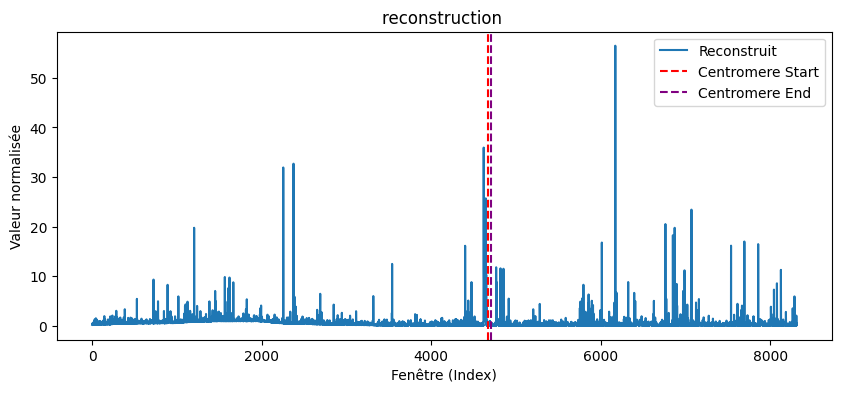

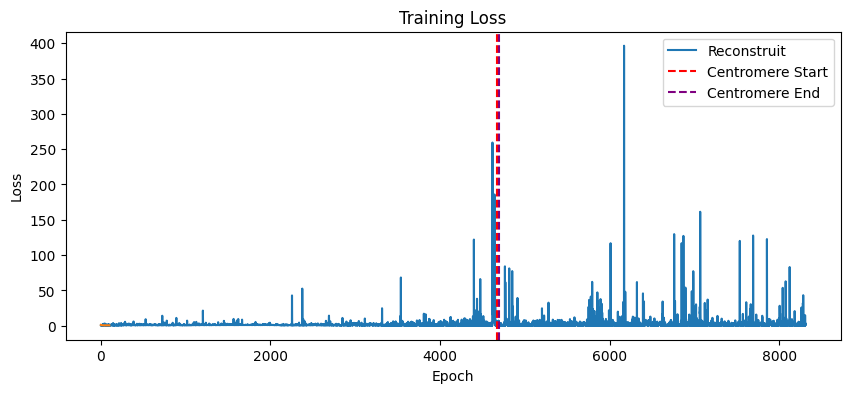

[[<tf.Tensor: shape=(2590,), dtype=float32, numpy=
array([0.31590226, 0.31316087, 0.35751274, ..., 3.9437532 , 0.4415097 ,
       2.143604  ], dtype=float32)>, array([ 0.7704763,  0.7634586,  0.871963 , ..., 17.469673 ,  1.9557719,
        9.495667 ], dtype=float32)], [<tf.Tensor: shape=(3458,), dtype=float32, numpy=
array([0.84758735, 0.75183105, 0.78168184, ..., 0.8472217 , 0.73171717,
       0.69455117], dtype=float32)>, array([1.0952119, 0.9719387, 1.0110059, ..., 1.5214452, 1.3135943,
       1.2464677], dtype=float32)], [<tf.Tensor: shape=(3746,), dtype=float32, numpy=
array([0.30874923, 0.40268493, 0.3191041 , ..., 1.4542493 , 1.4084473 ,
       1.4887613 ], dtype=float32)>, array([0.78956646, 1.0295734 , 0.8157056 , ..., 1.2307026 , 1.1916574 ,
       1.2593096 ], dtype=float32)], [<tf.Tensor: shape=(4629,), dtype=float32, numpy=
array([0.52157134, 0.62983674, 0.6286797 , ..., 0.90355587, 0.779844  ,
       0.738602  ], dtype=float32)>, array([0.97224534, 1.1746576 , 1.1730971 ,

  8%|███▍                                       | 8/100 [00:00<00:02, 35.42it/s]

Epoch 1, Loss: 1.2896032333374023
Epoch 2, Loss: 1.2449171543121338
Epoch 3, Loss: 1.200609803199768
Epoch 4, Loss: 1.157139539718628
Epoch 5, Loss: 1.1150274276733398
Epoch 6, Loss: 1.0747356414794922
Epoch 7, Loss: 1.036583662033081
Epoch 8, Loss: 1.0007493495941162


 16%|██████▋                                   | 16/100 [00:00<00:02, 36.24it/s]

Epoch 9, Loss: 0.9673060774803162
Epoch 10, Loss: 0.9362305402755737
Epoch 11, Loss: 0.9074254035949707
Epoch 12, Loss: 0.8807809352874756
Epoch 13, Loss: 0.8561932444572449
Epoch 14, Loss: 0.8335771560668945
Epoch 15, Loss: 0.8128178119659424
Epoch 16, Loss: 0.7937904000282288


 24%|██████████                                | 24/100 [00:00<00:02, 36.28it/s]

Epoch 17, Loss: 0.776373028755188
Epoch 18, Loss: 0.760444164276123
Epoch 19, Loss: 0.7458840012550354
Epoch 20, Loss: 0.7325816750526428
Epoch 21, Loss: 0.7204307913780212
Epoch 22, Loss: 0.7093321681022644
Epoch 23, Loss: 0.6991942524909973
Epoch 24, Loss: 0.68994140625


 32%|█████████████▍                            | 32/100 [00:00<00:01, 36.38it/s]

Epoch 25, Loss: 0.6815041303634644
Epoch 26, Loss: 0.6738141775131226
Epoch 27, Loss: 0.66681307554245
Epoch 28, Loss: 0.6604472398757935
Epoch 29, Loss: 0.6546649932861328
Epoch 30, Loss: 0.6494187116622925
Epoch 31, Loss: 0.6446629166603088
Epoch 32, Loss: 0.6403538584709167


 40%|████████████████▊                         | 40/100 [00:01<00:01, 36.46it/s]

Epoch 33, Loss: 0.6364514231681824
Epoch 34, Loss: 0.6329163312911987
Epoch 35, Loss: 0.6297082901000977
Epoch 36, Loss: 0.6267907023429871
Epoch 37, Loss: 0.624129593372345
Epoch 38, Loss: 0.6216946244239807
Epoch 39, Loss: 0.6194598078727722
Epoch 40, Loss: 0.6174019575119019


 48%|████████████████████▏                     | 48/100 [00:01<00:01, 36.23it/s]

Epoch 41, Loss: 0.6155025959014893
Epoch 42, Loss: 0.6137474179267883
Epoch 43, Loss: 0.6121242046356201
Epoch 44, Loss: 0.6106234192848206
Epoch 45, Loss: 0.6092380881309509
Epoch 46, Loss: 0.6079611778259277
Epoch 47, Loss: 0.6067864298820496
Epoch 48, Loss: 0.6057074069976807


 56%|███████████████████████▌                  | 56/100 [00:01<00:01, 36.56it/s]

Epoch 49, Loss: 0.6047177910804749
Epoch 50, Loss: 0.6038103103637695
Epoch 51, Loss: 0.6029781103134155
Epoch 52, Loss: 0.6022131443023682
Epoch 53, Loss: 0.6015077829360962
Epoch 54, Loss: 0.6008542776107788
Epoch 55, Loss: 0.6002461314201355
Epoch 56, Loss: 0.5996772050857544


 64%|██████████████████████████▉               | 64/100 [00:01<00:00, 36.37it/s]

Epoch 57, Loss: 0.5991420149803162
Epoch 58, Loss: 0.5986372232437134
Epoch 59, Loss: 0.5981597304344177
Epoch 60, Loss: 0.5977078080177307
Epoch 61, Loss: 0.5972802639007568
Epoch 62, Loss: 0.5968760848045349
Epoch 63, Loss: 0.5964946150779724
Epoch 64, Loss: 0.5961349606513977


 68%|████████████████████████████▌             | 68/100 [00:01<00:00, 36.05it/s]

Epoch 65, Loss: 0.5957959294319153
Epoch 66, Loss: 0.5954763889312744
Epoch 67, Loss: 0.5951749086380005
Epoch 68, Loss: 0.5948898792266846
Epoch 69, Loss: 0.5946196913719177
Epoch 70, Loss: 0.5943630933761597
Epoch 71, Loss: 0.5941186547279358
Epoch 72, Loss: 0.5938853621482849


 80%|█████████████████████████████████▌        | 80/100 [00:02<00:00, 35.34it/s]

Epoch 73, Loss: 0.5936620831489563
Epoch 74, Loss: 0.5934479832649231
Epoch 75, Loss: 0.5932425856590271
Epoch 76, Loss: 0.5930452942848206
Epoch 77, Loss: 0.5928559899330139
Epoch 78, Loss: 0.5926739573478699
Epoch 79, Loss: 0.5924989581108093
Epoch 80, Loss: 0.5923303961753845


 88%|████████████████████████████████████▉     | 88/100 [00:02<00:00, 35.60it/s]

Epoch 81, Loss: 0.5921680331230164
Epoch 82, Loss: 0.5920114517211914
Epoch 83, Loss: 0.5918602347373962
Epoch 84, Loss: 0.5917143225669861
Epoch 85, Loss: 0.5915731191635132
Epoch 86, Loss: 0.591436505317688
Epoch 87, Loss: 0.5913042426109314
Epoch 88, Loss: 0.5911762714385986


 96%|████████████████████████████████████████▎ | 96/100 [00:02<00:00, 35.05it/s]

Epoch 89, Loss: 0.5910524129867554
Epoch 90, Loss: 0.5909324884414673
Epoch 91, Loss: 0.5908164381980896
Epoch 92, Loss: 0.5907039046287537
Epoch 93, Loss: 0.5905948281288147
Epoch 94, Loss: 0.5904889702796936
Epoch 95, Loss: 0.5903860926628113
Epoch 96, Loss: 0.5902860760688782


100%|█████████████████████████████████████████| 100/100 [00:02<00:00, 35.79it/s]


Epoch 97, Loss: 0.59018874168396
Epoch 98, Loss: 0.5900939106941223
Epoch 99, Loss: 0.5900015234947205
Epoch 100, Loss: 0.5899114608764648


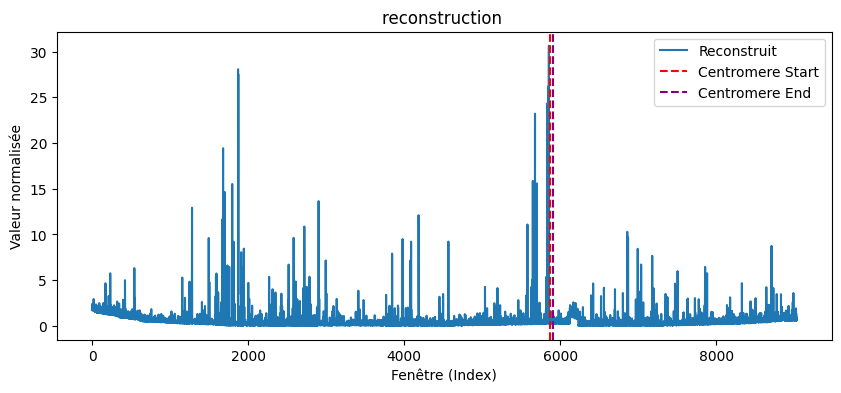

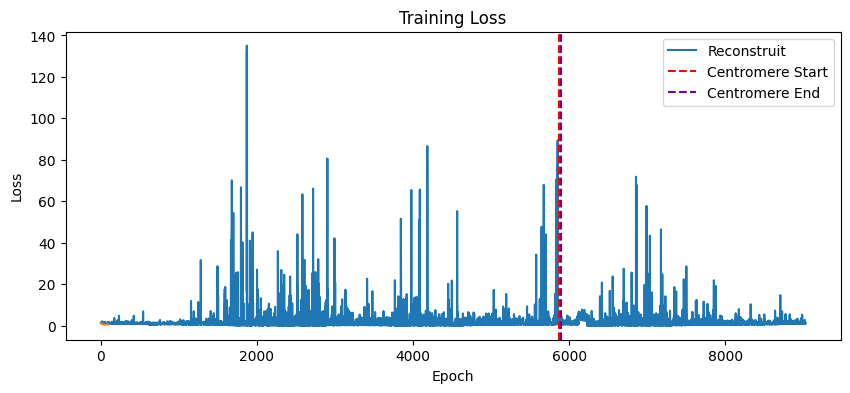

[[<tf.Tensor: shape=(2590,), dtype=float32, numpy=
array([0.31590226, 0.31316087, 0.35751274, ..., 3.9437532 , 0.4415097 ,
       2.143604  ], dtype=float32)>, array([ 0.7704763,  0.7634586,  0.871963 , ..., 17.469673 ,  1.9557719,
        9.495667 ], dtype=float32)], [<tf.Tensor: shape=(3458,), dtype=float32, numpy=
array([0.84758735, 0.75183105, 0.78168184, ..., 0.8472217 , 0.73171717,
       0.69455117], dtype=float32)>, array([1.0952119, 0.9719387, 1.0110059, ..., 1.5214452, 1.3135943,
       1.2464677], dtype=float32)], [<tf.Tensor: shape=(3746,), dtype=float32, numpy=
array([0.30874923, 0.40268493, 0.3191041 , ..., 1.4542493 , 1.4084473 ,
       1.4887613 ], dtype=float32)>, array([0.78956646, 1.0295734 , 0.8157056 , ..., 1.2307026 , 1.1916574 ,
       1.2593096 ], dtype=float32)], [<tf.Tensor: shape=(4629,), dtype=float32, numpy=
array([0.52157134, 0.62983674, 0.6286797 , ..., 0.90355587, 0.779844  ,
       0.738602  ], dtype=float32)>, array([0.97224534, 1.1746576 , 1.1730971 ,

  8%|███▍                                       | 8/100 [00:00<00:02, 35.53it/s]

Epoch 1, Loss: 1.193771243095398
Epoch 2, Loss: 1.1568773984909058
Epoch 3, Loss: 1.120569109916687
Epoch 4, Loss: 1.0851484537124634
Epoch 5, Loss: 1.0507895946502686
Epoch 6, Loss: 1.0176832675933838
Epoch 7, Loss: 0.9860265851020813
Epoch 8, Loss: 0.9559402465820312


 16%|██████▋                                   | 16/100 [00:00<00:02, 35.98it/s]

Epoch 9, Loss: 0.927484393119812
Epoch 10, Loss: 0.900668203830719
Epoch 11, Loss: 0.8754945397377014
Epoch 12, Loss: 0.8519988059997559
Epoch 13, Loss: 0.8301833271980286
Epoch 14, Loss: 0.8099745512008667
Epoch 15, Loss: 0.7913211584091187
Epoch 16, Loss: 0.7741634845733643


 24%|██████████                                | 24/100 [00:00<00:02, 36.20it/s]

Epoch 17, Loss: 0.758432149887085
Epoch 18, Loss: 0.7440381050109863
Epoch 19, Loss: 0.7308956384658813
Epoch 20, Loss: 0.7189152836799622
Epoch 21, Loss: 0.7079982161521912
Epoch 22, Loss: 0.698052167892456
Epoch 23, Loss: 0.6890039443969727
Epoch 24, Loss: 0.6807683706283569


 32%|█████████████▍                            | 32/100 [00:00<00:01, 36.57it/s]

Epoch 25, Loss: 0.6732689142227173
Epoch 26, Loss: 0.6664459705352783
Epoch 27, Loss: 0.6602295637130737
Epoch 28, Loss: 0.6545602679252625
Epoch 29, Loss: 0.6493853330612183
Epoch 30, Loss: 0.644659698009491
Epoch 31, Loss: 0.6403411626815796
Epoch 32, Loss: 0.6363917589187622


 40%|████████████████▊                         | 40/100 [00:01<00:01, 36.45it/s]

Epoch 33, Loss: 0.6327778100967407
Epoch 34, Loss: 0.6294682621955872
Epoch 35, Loss: 0.6264354586601257
Epoch 36, Loss: 0.6236549615859985
Epoch 37, Loss: 0.6211037039756775
Epoch 38, Loss: 0.6187626123428345
Epoch 39, Loss: 0.6166142225265503
Epoch 40, Loss: 0.6146436333656311


 48%|████████████████████▏                     | 48/100 [00:01<00:01, 36.28it/s]

Epoch 41, Loss: 0.6128374338150024
Epoch 42, Loss: 0.6111836433410645
Epoch 43, Loss: 0.6096705198287964
Epoch 44, Loss: 0.6082885265350342
Epoch 45, Loss: 0.6070272326469421
Epoch 46, Loss: 0.6058769226074219
Epoch 47, Loss: 0.604828417301178
Epoch 48, Loss: 0.6038728952407837


 56%|███████████████████████▌                  | 56/100 [00:01<00:01, 35.99it/s]

Epoch 49, Loss: 0.6030014157295227
Epoch 50, Loss: 0.602206289768219
Epoch 51, Loss: 0.601479709148407
Epoch 52, Loss: 0.6008139848709106
Epoch 53, Loss: 0.6002018451690674
Epoch 54, Loss: 0.5996361970901489
Epoch 55, Loss: 0.5991106033325195
Epoch 56, Loss: 0.5986188650131226


 60%|█████████████████████████▏                | 60/100 [00:01<00:01, 35.33it/s]

Epoch 57, Loss: 0.5981559753417969
Epoch 58, Loss: 0.5977171063423157
Epoch 59, Loss: 0.5972989797592163
Epoch 60, Loss: 0.5968990325927734
Epoch 61, Loss: 0.5965150594711304
Epoch 62, Loss: 0.5961464047431946
Epoch 63, Loss: 0.5957924723625183


 68%|████████████████████████████▌             | 68/100 [00:01<00:00, 35.07it/s]

Epoch 64, Loss: 0.5954534411430359
Epoch 65, Loss: 0.5951294898986816
Epoch 66, Loss: 0.5948207974433899
Epoch 67, Loss: 0.5945274233818054
Epoch 68, Loss: 0.5942492485046387
Epoch 69, Loss: 0.5939857363700867
Epoch 70, Loss: 0.5937363505363464


 76%|███████████████████████████████▉          | 76/100 [00:02<00:00, 34.99it/s]

Epoch 71, Loss: 0.593500018119812
Epoch 72, Loss: 0.5932756066322327
Epoch 73, Loss: 0.5930619835853577
Epoch 74, Loss: 0.592858076095581
Epoch 75, Loss: 0.5926626920700073
Epoch 76, Loss: 0.5924749374389648
Epoch 77, Loss: 0.5922939777374268
Epoch 78, Loss: 0.5921192765235901


 84%|███████████████████████████████████▎      | 84/100 [00:02<00:00, 35.18it/s]

Epoch 79, Loss: 0.5919502377510071
Epoch 80, Loss: 0.5917865633964539
Epoch 81, Loss: 0.5916278958320618
Epoch 82, Loss: 0.5914741158485413
Epoch 83, Loss: 0.591325044631958
Epoch 84, Loss: 0.5911806225776672
Epoch 85, Loss: 0.5910406112670898
Epoch 86, Loss: 0.5909048914909363


 92%|██████████████████████████████████████▋   | 92/100 [00:02<00:00, 35.56it/s]

Epoch 87, Loss: 0.5907734632492065
Epoch 88, Loss: 0.5906460881233215
Epoch 89, Loss: 0.5905225872993469
Epoch 90, Loss: 0.5904028415679932
Epoch 91, Loss: 0.5902865529060364
Epoch 92, Loss: 0.5901735424995422
Epoch 93, Loss: 0.5900635719299316
Epoch 94, Loss: 0.589956521987915


100%|█████████████████████████████████████████| 100/100 [00:02<00:00, 35.73it/s]

Epoch 95, Loss: 0.5898522734642029
Epoch 96, Loss: 0.5897505879402161
Epoch 97, Loss: 0.5896515250205994
Epoch 98, Loss: 0.5895548462867737
Epoch 99, Loss: 0.5894603729248047
Epoch 100, Loss: 0.5893682241439819


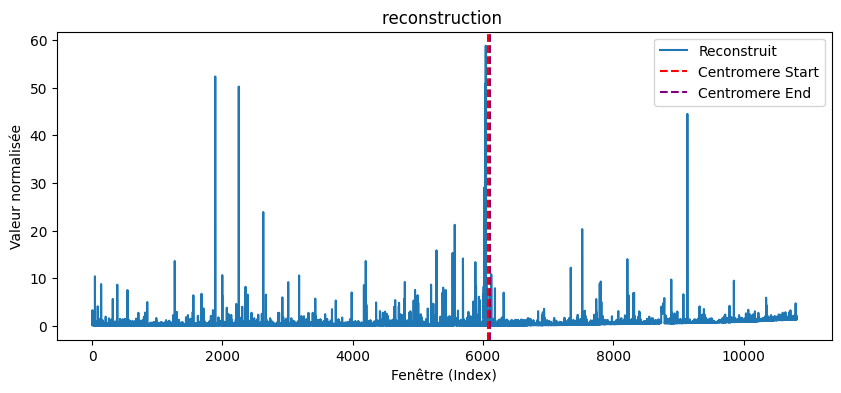

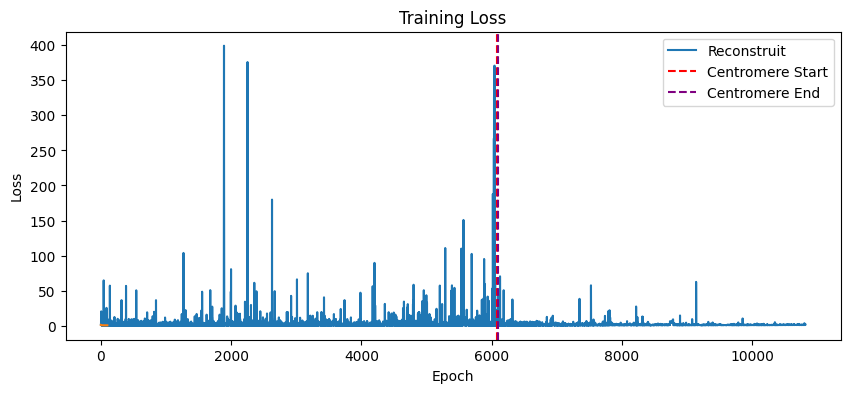

[[<tf.Tensor: shape=(2590,), dtype=float32, numpy=
array([0.31590226, 0.31316087, 0.35751274, ..., 3.9437532 , 0.4415097 ,
       2.143604  ], dtype=float32)>, array([ 0.7704763,  0.7634586,  0.871963 , ..., 17.469673 ,  1.9557719,
        9.495667 ], dtype=float32)], [<tf.Tensor: shape=(3458,), dtype=float32, numpy=
array([0.84758735, 0.75183105, 0.78168184, ..., 0.8472217 , 0.73171717,
       0.69455117], dtype=float32)>, array([1.0952119, 0.9719387, 1.0110059, ..., 1.5214452, 1.3135943,
       1.2464677], dtype=float32)], [<tf.Tensor: shape=(3746,), dtype=float32, numpy=
array([0.30874923, 0.40268493, 0.3191041 , ..., 1.4542493 , 1.4084473 ,
       1.4887613 ], dtype=float32)>, array([0.78956646, 1.0295734 , 0.8157056 , ..., 1.2307026 , 1.1916574 ,
       1.2593096 ], dtype=float32)], [<tf.Tensor: shape=(4629,), dtype=float32, numpy=
array([0.52157134, 0.62983674, 0.6286797 , ..., 0.90355587, 0.779844  ,
       0.738602  ], dtype=float32)>, array([0.97224534, 1.1746576 , 1.1730971 ,

  8%|███▍                                       | 8/100 [00:00<00:02, 35.41it/s]

Epoch 1, Loss: 1.182395577430725
Epoch 2, Loss: 1.144326090812683
Epoch 3, Loss: 1.1073710918426514
Epoch 4, Loss: 1.0717638731002808
Epoch 5, Loss: 1.0377140045166016
Epoch 6, Loss: 1.0053478479385376
Epoch 7, Loss: 0.9746860265731812
Epoch 8, Loss: 0.9457013607025146


 16%|██████▋                                   | 16/100 [00:00<00:02, 35.55it/s]

Epoch 9, Loss: 0.9183578491210938
Epoch 10, Loss: 0.8926299214363098
Epoch 11, Loss: 0.8684756755828857
Epoch 12, Loss: 0.8458589911460876
Epoch 13, Loss: 0.8247529864311218
Epoch 14, Loss: 0.8051186203956604
Epoch 15, Loss: 0.7869179248809814
Epoch 16, Loss: 0.7701109051704407


 24%|██████████                                | 24/100 [00:00<00:02, 36.14it/s]

Epoch 17, Loss: 0.7546418309211731
Epoch 18, Loss: 0.7404563426971436
Epoch 19, Loss: 0.727490246295929
Epoch 20, Loss: 0.7156765460968018
Epoch 21, Loss: 0.7049398422241211
Epoch 22, Loss: 0.6952046751976013
Epoch 23, Loss: 0.68639075756073
Epoch 24, Loss: 0.6784232258796692


 32%|█████████████▍                            | 32/100 [00:00<00:01, 35.88it/s]

Epoch 25, Loss: 0.671224057674408
Epoch 26, Loss: 0.6647180318832397
Epoch 27, Loss: 0.6588336229324341
Epoch 28, Loss: 0.6534984111785889
Epoch 29, Loss: 0.6486465930938721
Epoch 30, Loss: 0.6442177891731262
Epoch 31, Loss: 0.6401566863059998
Epoch 32, Loss: 0.6364135146141052


 36%|███████████████                           | 36/100 [00:01<00:01, 36.03it/s]

Epoch 33, Loss: 0.6329466104507446
Epoch 34, Loss: 0.6297243237495422
Epoch 35, Loss: 0.6267250776290894
Epoch 36, Loss: 0.6239363551139832
Epoch 37, Loss: 0.6213520169258118
Epoch 38, Loss: 0.6189675331115723
Epoch 39, Loss: 0.6167720556259155


 44%|██████████████████▍                       | 44/100 [00:01<00:01, 34.75it/s]

Epoch 40, Loss: 0.6147556900978088
Epoch 41, Loss: 0.6129076480865479
Epoch 42, Loss: 0.6112204790115356
Epoch 43, Loss: 0.6096872687339783
Epoch 44, Loss: 0.6083014607429504
Epoch 45, Loss: 0.6070562601089478
Epoch 46, Loss: 0.6059408783912659


 52%|█████████████████████▊                    | 52/100 [00:01<00:01, 34.79it/s]

Epoch 47, Loss: 0.6049445867538452
Epoch 48, Loss: 0.6040531396865845
Epoch 49, Loss: 0.6032494306564331
Epoch 50, Loss: 0.6025170683860779
Epoch 51, Loss: 0.6018405556678772
Epoch 52, Loss: 0.6012067198753357
Epoch 53, Loss: 0.6006062030792236
Epoch 54, Loss: 0.6000324487686157


 60%|█████████████████████████▏                | 60/100 [00:01<00:01, 34.54it/s]

Epoch 55, Loss: 0.599481999874115
Epoch 56, Loss: 0.5989540815353394
Epoch 57, Loss: 0.598449170589447
Epoch 58, Loss: 0.5979687571525574
Epoch 59, Loss: 0.5975144505500793
Epoch 60, Loss: 0.597087562084198
Epoch 61, Loss: 0.5966883301734924
Epoch 62, Loss: 0.5963162183761597


 68%|████████████████████████████▌             | 68/100 [00:01<00:00, 34.80it/s]

Epoch 63, Loss: 0.5959697365760803
Epoch 64, Loss: 0.5956467390060425
Epoch 65, Loss: 0.5953444838523865
Epoch 66, Loss: 0.5950602293014526
Epoch 67, Loss: 0.5947908759117126
Epoch 68, Loss: 0.5945340991020203
Epoch 69, Loss: 0.5942876935005188
Epoch 70, Loss: 0.5940499305725098


 76%|███████████████████████████████▉          | 76/100 [00:02<00:00, 35.35it/s]

Epoch 71, Loss: 0.5938194990158081
Epoch 72, Loss: 0.5935958027839661
Epoch 73, Loss: 0.593378484249115
Epoch 74, Loss: 0.5931677222251892
Epoch 75, Loss: 0.5929635167121887
Epoch 76, Loss: 0.592766284942627
Epoch 77, Loss: 0.5925761461257935
Epoch 78, Loss: 0.59239262342453


 84%|███████████████████████████████████▎      | 84/100 [00:02<00:00, 35.71it/s]

Epoch 79, Loss: 0.5922163128852844
Epoch 80, Loss: 0.5920469164848328
Epoch 81, Loss: 0.5918843746185303
Epoch 82, Loss: 0.5917284488677979
Epoch 83, Loss: 0.5915783643722534
Epoch 84, Loss: 0.5914338827133179
Epoch 85, Loss: 0.5912943482398987
Epoch 86, Loss: 0.5911591053009033


 92%|██████████████████████████████████████▋   | 92/100 [00:02<00:00, 36.14it/s]

Epoch 87, Loss: 0.5910276770591736
Epoch 88, Loss: 0.5908997654914856
Epoch 89, Loss: 0.5907749533653259
Epoch 90, Loss: 0.590653121471405
Epoch 91, Loss: 0.5905340909957886
Epoch 92, Loss: 0.5904178619384766
Epoch 93, Loss: 0.590304434299469
Epoch 94, Loss: 0.5901938676834106


100%|█████████████████████████████████████████| 100/100 [00:02<00:00, 35.37it/s]

Epoch 95, Loss: 0.5900861024856567
Epoch 96, Loss: 0.589981198310852
Epoch 97, Loss: 0.5898791551589966
Epoch 98, Loss: 0.589779794216156
Epoch 99, Loss: 0.5896830558776855
Epoch 100, Loss: 0.5895888805389404


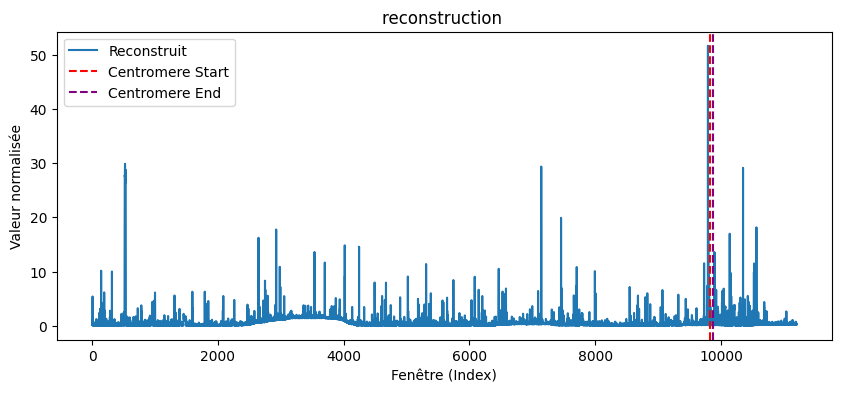

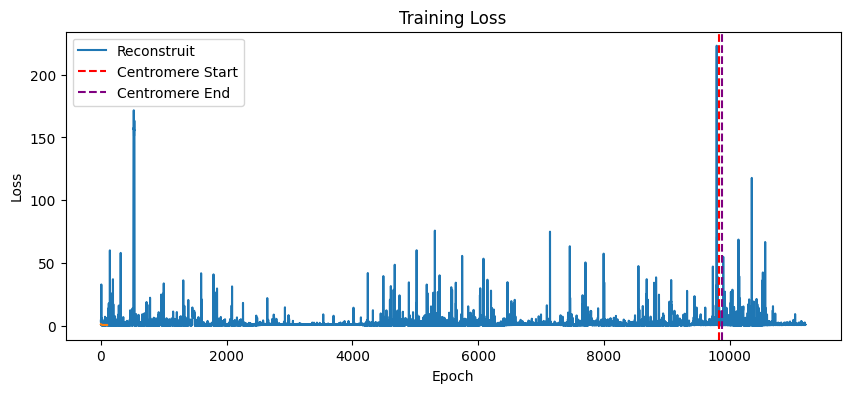

[[<tf.Tensor: shape=(2590,), dtype=float32, numpy=
array([0.31590226, 0.31316087, 0.35751274, ..., 3.9437532 , 0.4415097 ,
       2.143604  ], dtype=float32)>, array([ 0.7704763,  0.7634586,  0.871963 , ..., 17.469673 ,  1.9557719,
        9.495667 ], dtype=float32)], [<tf.Tensor: shape=(3458,), dtype=float32, numpy=
array([0.84758735, 0.75183105, 0.78168184, ..., 0.8472217 , 0.73171717,
       0.69455117], dtype=float32)>, array([1.0952119, 0.9719387, 1.0110059, ..., 1.5214452, 1.3135943,
       1.2464677], dtype=float32)], [<tf.Tensor: shape=(3746,), dtype=float32, numpy=
array([0.30874923, 0.40268493, 0.3191041 , ..., 1.4542493 , 1.4084473 ,
       1.4887613 ], dtype=float32)>, array([0.78956646, 1.0295734 , 0.8157056 , ..., 1.2307026 , 1.1916574 ,
       1.2593096 ], dtype=float32)], [<tf.Tensor: shape=(4629,), dtype=float32, numpy=
array([0.52157134, 0.62983674, 0.6286797 , ..., 0.90355587, 0.779844  ,
       0.738602  ], dtype=float32)>, array([0.97224534, 1.1746576 , 1.1730971 ,

  8%|███▍                                       | 8/100 [00:00<00:02, 34.02it/s]

Epoch 1, Loss: 1.2135037183761597
Epoch 2, Loss: 1.1729758977890015
Epoch 3, Loss: 1.1331416368484497
Epoch 4, Loss: 1.0945165157318115
Epoch 5, Loss: 1.05756676197052
Epoch 6, Loss: 1.0225334167480469
Epoch 7, Loss: 0.9894537329673767
Epoch 8, Loss: 0.9582778215408325


 16%|██████▋                                   | 16/100 [00:00<00:02, 34.62it/s]

Epoch 9, Loss: 0.9289902448654175
Epoch 10, Loss: 0.9015306234359741
Epoch 11, Loss: 0.8758450746536255
Epoch 12, Loss: 0.8518816232681274
Epoch 13, Loss: 0.8295897245407104
Epoch 14, Loss: 0.8089248538017273
Epoch 15, Loss: 0.7898404002189636
Epoch 16, Loss: 0.7722775340080261


 20%|████████▍                                 | 20/100 [00:00<00:02, 34.51it/s]

Epoch 17, Loss: 0.7561597228050232
Epoch 18, Loss: 0.7414225935935974
Epoch 19, Loss: 0.7279837727546692
Epoch 20, Loss: 0.71575927734375
Epoch 21, Loss: 0.7046546936035156
Epoch 22, Loss: 0.6945836544036865
Epoch 23, Loss: 0.6854544878005981


 28%|███████████▊                              | 28/100 [00:00<00:02, 33.51it/s]

Epoch 24, Loss: 0.6771827340126038
Epoch 25, Loss: 0.6696851849555969
Epoch 26, Loss: 0.6628830432891846
Epoch 27, Loss: 0.6567074060440063
Epoch 28, Loss: 0.6510922908782959
Epoch 29, Loss: 0.6459781527519226
Epoch 30, Loss: 0.6413149833679199


 36%|███████████████                           | 36/100 [00:01<00:01, 34.07it/s]

Epoch 31, Loss: 0.6370538473129272
Epoch 32, Loss: 0.6331524848937988
Epoch 33, Loss: 0.6295726895332336
Epoch 34, Loss: 0.6262829303741455
Epoch 35, Loss: 0.6232539415359497
Epoch 36, Loss: 0.6204596161842346
Epoch 37, Loss: 0.6178772449493408
Epoch 38, Loss: 0.6154869198799133


 44%|██████████████████▍                       | 44/100 [00:01<00:01, 34.24it/s]

Epoch 39, Loss: 0.6132690906524658
Epoch 40, Loss: 0.6112078428268433
Epoch 41, Loss: 0.6092895269393921
Epoch 42, Loss: 0.6075021028518677
Epoch 43, Loss: 0.6058354377746582
Epoch 44, Loss: 0.6042802333831787
Epoch 45, Loss: 0.602828323841095


 52%|█████████████████████▊                    | 52/100 [00:01<00:01, 34.71it/s]

Epoch 46, Loss: 0.6014724373817444
Epoch 47, Loss: 0.6002060174942017
Epoch 48, Loss: 0.5990228056907654
Epoch 49, Loss: 0.597916841506958
Epoch 50, Loss: 0.5968828201293945
Epoch 51, Loss: 0.5959158539772034
Epoch 52, Loss: 0.5950112342834473
Epoch 53, Loss: 0.594164252281189


 60%|█████████████████████████▏                | 60/100 [00:01<00:01, 34.96it/s]

Epoch 54, Loss: 0.5933704376220703
Epoch 55, Loss: 0.5926255583763123
Epoch 56, Loss: 0.5919257998466492
Epoch 57, Loss: 0.591267466545105
Epoch 58, Loss: 0.5906473398208618
Epoch 59, Loss: 0.5900623202323914
Epoch 60, Loss: 0.5895094275474548
Epoch 61, Loss: 0.5889861583709717


 68%|████████████████████████████▌             | 68/100 [00:01<00:00, 34.78it/s]

Epoch 62, Loss: 0.5884901285171509
Epoch 63, Loss: 0.5880194306373596
Epoch 64, Loss: 0.5875719785690308
Epoch 65, Loss: 0.5871458649635315
Epoch 66, Loss: 0.5867395997047424
Epoch 67, Loss: 0.5863514542579651
Epoch 68, Loss: 0.5859799981117249
Epoch 69, Loss: 0.5856238603591919


 76%|███████████████████████████████▉          | 76/100 [00:02<00:00, 35.36it/s]

Epoch 70, Loss: 0.5852819085121155
Epoch 71, Loss: 0.5849535465240479
Epoch 72, Loss: 0.5846377015113831
Epoch 73, Loss: 0.5843335390090942
Epoch 74, Loss: 0.5840405821800232
Epoch 75, Loss: 0.5837583541870117
Epoch 76, Loss: 0.5834864974021912
Epoch 77, Loss: 0.583224356174469


 84%|███████████████████████████████████▎      | 84/100 [00:02<00:00, 35.46it/s]

Epoch 78, Loss: 0.5829717516899109
Epoch 79, Loss: 0.5827281475067139
Epoch 80, Loss: 0.5824933648109436
Epoch 81, Loss: 0.582267165184021
Epoch 82, Loss: 0.5820491909980774
Epoch 83, Loss: 0.5818394422531128
Epoch 84, Loss: 0.5816372036933899
Epoch 85, Loss: 0.5814424753189087


 92%|██████████████████████████████████████▋   | 92/100 [00:02<00:00, 35.57it/s]

Epoch 86, Loss: 0.5812551379203796
Epoch 87, Loss: 0.5810747146606445
Epoch 88, Loss: 0.5809012651443481
Epoch 89, Loss: 0.5807341933250427
Epoch 90, Loss: 0.5805730819702148
Epoch 91, Loss: 0.5804178714752197
Epoch 92, Loss: 0.580268144607544
Epoch 93, Loss: 0.5801237225532532


100%|█████████████████████████████████████████| 100/100 [00:02<00:00, 34.72it/s]

Epoch 94, Loss: 0.5799840688705444
Epoch 95, Loss: 0.579849123954773
Epoch 96, Loss: 0.5797187685966492
Epoch 97, Loss: 0.5795925855636597
Epoch 98, Loss: 0.5794704556465149
Epoch 99, Loss: 0.5793522000312805
Epoch 100, Loss: 0.5792375802993774


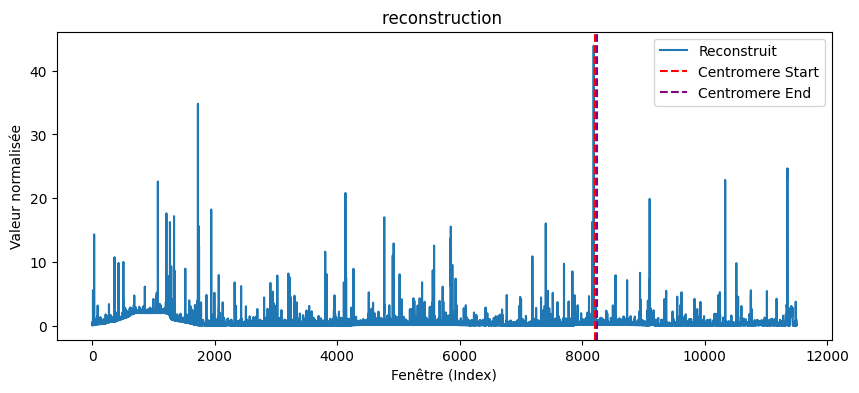

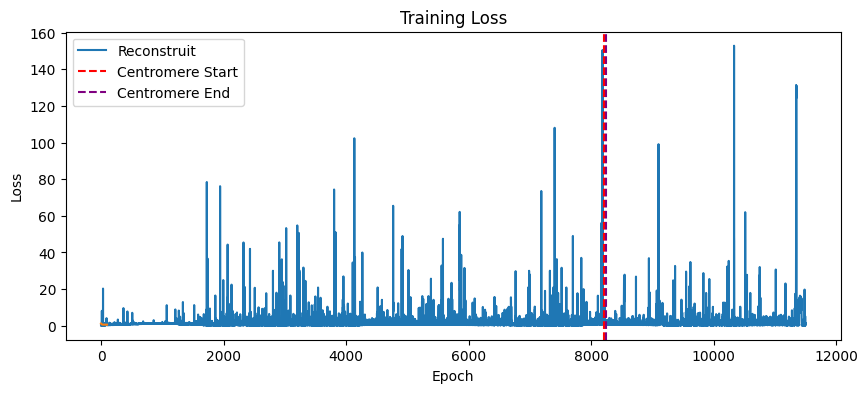

[[<tf.Tensor: shape=(2590,), dtype=float32, numpy=
array([0.31590226, 0.31316087, 0.35751274, ..., 3.9437532 , 0.4415097 ,
       2.143604  ], dtype=float32)>, array([ 0.7704763,  0.7634586,  0.871963 , ..., 17.469673 ,  1.9557719,
        9.495667 ], dtype=float32)], [<tf.Tensor: shape=(3458,), dtype=float32, numpy=
array([0.84758735, 0.75183105, 0.78168184, ..., 0.8472217 , 0.73171717,
       0.69455117], dtype=float32)>, array([1.0952119, 0.9719387, 1.0110059, ..., 1.5214452, 1.3135943,
       1.2464677], dtype=float32)], [<tf.Tensor: shape=(3746,), dtype=float32, numpy=
array([0.30874923, 0.40268493, 0.3191041 , ..., 1.4542493 , 1.4084473 ,
       1.4887613 ], dtype=float32)>, array([0.78956646, 1.0295734 , 0.8157056 , ..., 1.2307026 , 1.1916574 ,
       1.2593096 ], dtype=float32)], [<tf.Tensor: shape=(4629,), dtype=float32, numpy=
array([0.52157134, 0.62983674, 0.6286797 , ..., 0.90355587, 0.779844  ,
       0.738602  ], dtype=float32)>, array([0.97224534, 1.1746576 , 1.1730971 ,

  4%|█▋                                         | 4/100 [00:00<00:03, 30.80it/s]

Epoch 1, Loss: 1.2931344509124756
Epoch 2, Loss: 1.2511075735092163
Epoch 3, Loss: 1.2105753421783447
Epoch 4, Loss: 1.1717196702957153
Epoch 5, Loss: 1.1346769332885742
Epoch 6, Loss: 1.0994646549224854
Epoch 7, Loss: 1.0660866498947144


 12%|█████                                     | 12/100 [00:00<00:02, 31.21it/s]

Epoch 8, Loss: 1.034484624862671
Epoch 9, Loss: 1.0045944452285767
Epoch 10, Loss: 0.9763480424880981
Epoch 11, Loss: 0.9496362805366516
Epoch 12, Loss: 0.9243300557136536
Epoch 13, Loss: 0.9003268480300903
Epoch 14, Loss: 0.8775579333305359


 20%|████████▍                                 | 20/100 [00:00<00:02, 32.30it/s]

Epoch 15, Loss: 0.8559735417366028
Epoch 16, Loss: 0.8355440497398376
Epoch 17, Loss: 0.8162520527839661
Epoch 18, Loss: 0.7980907559394836
Epoch 19, Loss: 0.7810596823692322
Epoch 20, Loss: 0.7651491761207581
Epoch 21, Loss: 0.7503498196601868


 28%|███████████▊                              | 28/100 [00:00<00:02, 32.69it/s]

Epoch 22, Loss: 0.736642062664032
Epoch 23, Loss: 0.7239961624145508
Epoch 24, Loss: 0.7123818397521973
Epoch 25, Loss: 0.701755940914154
Epoch 26, Loss: 0.6920661330223083
Epoch 27, Loss: 0.6832547187805176
Epoch 28, Loss: 0.6752586364746094


 36%|███████████████                           | 36/100 [00:01<00:01, 33.41it/s]

Epoch 29, Loss: 0.6680112481117249
Epoch 30, Loss: 0.6614469289779663
Epoch 31, Loss: 0.6555018424987793
Epoch 32, Loss: 0.6501118540763855
Epoch 33, Loss: 0.6452191472053528
Epoch 34, Loss: 0.6407689452171326
Epoch 35, Loss: 0.6367111802101135
Epoch 36, Loss: 0.6330020427703857


 40%|████████████████▊                         | 40/100 [00:01<00:01, 33.70it/s]

Epoch 37, Loss: 0.6296024918556213
Epoch 38, Loss: 0.6264789700508118
Epoch 39, Loss: 0.6236034631729126
Epoch 40, Loss: 0.6209534406661987
Epoch 41, Loss: 0.6185121536254883
Epoch 42, Loss: 0.6162684559822083
Epoch 43, Loss: 0.6142162084579468


 48%|████████████████████▏                     | 48/100 [00:01<00:01, 33.92it/s]

Epoch 44, Loss: 0.6123501658439636
Epoch 45, Loss: 0.6106649041175842
Epoch 46, Loss: 0.6091511845588684
Epoch 47, Loss: 0.6077927350997925
Epoch 48, Loss: 0.6065685749053955
Epoch 49, Loss: 0.6054538488388062
Epoch 50, Loss: 0.6044237017631531


 56%|███████████████████████▌                  | 56/100 [00:01<00:01, 34.40it/s]

Epoch 51, Loss: 0.603455662727356
Epoch 52, Loss: 0.6025317311286926
Epoch 53, Loss: 0.6016401648521423
Epoch 54, Loss: 0.6007756590843201
Epoch 55, Loss: 0.5999364256858826
Epoch 56, Loss: 0.5991253852844238
Epoch 57, Loss: 0.598347008228302
Epoch 58, Loss: 0.5976065397262573


 64%|██████████████████████████▉               | 64/100 [00:01<00:01, 34.38it/s]

Epoch 59, Loss: 0.5969077944755554
Epoch 60, Loss: 0.5962538123130798
Epoch 61, Loss: 0.5956454277038574
Epoch 62, Loss: 0.5950803756713867
Epoch 63, Loss: 0.5945557355880737
Epoch 64, Loss: 0.5940659046173096
Epoch 65, Loss: 0.5936052799224854


 72%|██████████████████████████████▏           | 72/100 [00:02<00:00, 34.36it/s]

Epoch 66, Loss: 0.5931681990623474
Epoch 67, Loss: 0.592749834060669
Epoch 68, Loss: 0.5923466682434082
Epoch 69, Loss: 0.5919567346572876
Epoch 70, Loss: 0.5915793180465698
Epoch 71, Loss: 0.5912147164344788
Epoch 72, Loss: 0.5908636450767517


 80%|█████████████████████████████████▌        | 80/100 [00:02<00:00, 34.68it/s]

Epoch 73, Loss: 0.590526819229126
Epoch 74, Loss: 0.5902047753334045
Epoch 75, Loss: 0.589897632598877
Epoch 76, Loss: 0.5896047353744507
Epoch 77, Loss: 0.5893256068229675
Epoch 78, Loss: 0.5890588760375977
Epoch 79, Loss: 0.588803768157959
Epoch 80, Loss: 0.588559091091156


 88%|████████████████████████████████████▉     | 88/100 [00:02<00:00, 34.51it/s]

Epoch 81, Loss: 0.5883241891860962
Epoch 82, Loss: 0.5880983471870422
Epoch 83, Loss: 0.5878812074661255
Epoch 84, Loss: 0.5876724123954773
Epoch 85, Loss: 0.5874715447425842
Epoch 86, Loss: 0.5872779488563538
Epoch 87, Loss: 0.5870913863182068
Epoch 88, Loss: 0.5869113206863403


 96%|████████████████████████████████████████▎ | 96/100 [00:02<00:00, 34.65it/s]

Epoch 89, Loss: 0.5867372155189514
Epoch 90, Loss: 0.5865688920021057
Epoch 91, Loss: 0.5864059925079346
Epoch 92, Loss: 0.5862481594085693
Epoch 93, Loss: 0.5860951542854309
Epoch 94, Loss: 0.5859469175338745
Epoch 95, Loss: 0.5858035683631897
Epoch 96, Loss: 0.5856647491455078


100%|█████████████████████████████████████████| 100/100 [00:02<00:00, 33.75it/s]


Epoch 97, Loss: 0.5855304002761841
Epoch 98, Loss: 0.5854002237319946
Epoch 99, Loss: 0.5852741599082947
Epoch 100, Loss: 0.585151731967926


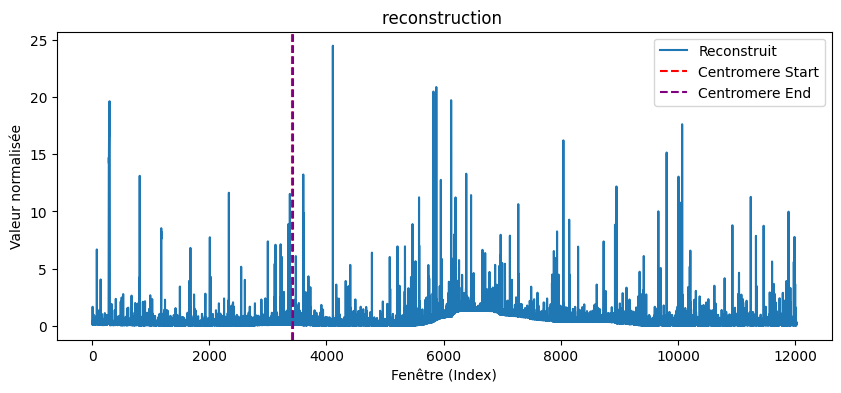

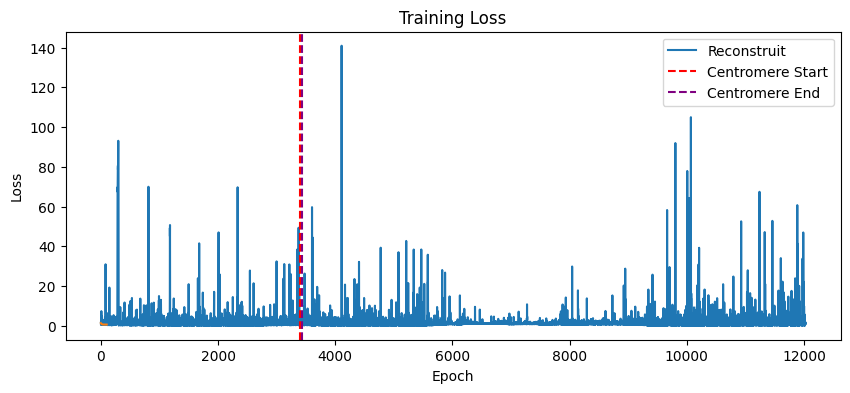

[[<tf.Tensor: shape=(2590,), dtype=float32, numpy=
array([0.31590226, 0.31316087, 0.35751274, ..., 3.9437532 , 0.4415097 ,
       2.143604  ], dtype=float32)>, array([ 0.7704763,  0.7634586,  0.871963 , ..., 17.469673 ,  1.9557719,
        9.495667 ], dtype=float32)], [<tf.Tensor: shape=(3458,), dtype=float32, numpy=
array([0.84758735, 0.75183105, 0.78168184, ..., 0.8472217 , 0.73171717,
       0.69455117], dtype=float32)>, array([1.0952119, 0.9719387, 1.0110059, ..., 1.5214452, 1.3135943,
       1.2464677], dtype=float32)], [<tf.Tensor: shape=(3746,), dtype=float32, numpy=
array([0.30874923, 0.40268493, 0.3191041 , ..., 1.4542493 , 1.4084473 ,
       1.4887613 ], dtype=float32)>, array([0.78956646, 1.0295734 , 0.8157056 , ..., 1.2307026 , 1.1916574 ,
       1.2593096 ], dtype=float32)], [<tf.Tensor: shape=(4629,), dtype=float32, numpy=
array([0.52157134, 0.62983674, 0.6286797 , ..., 0.90355587, 0.779844  ,
       0.738602  ], dtype=float32)>, array([0.97224534, 1.1746576 , 1.1730971 ,

  7%|███                                        | 7/100 [00:00<00:02, 33.37it/s]

Epoch 1, Loss: 1.212774395942688
Epoch 2, Loss: 1.1666216850280762
Epoch 3, Loss: 1.122098445892334
Epoch 4, Loss: 1.0793529748916626
Epoch 5, Loss: 1.0385169982910156
Epoch 6, Loss: 0.9998690485954285
Epoch 7, Loss: 0.963568925857544
Epoch 8, Loss: 0.9297797083854675


 15%|██████▎                                   | 15/100 [00:00<00:02, 34.56it/s]

Epoch 9, Loss: 0.8985531330108643
Epoch 10, Loss: 0.8698902726173401
Epoch 11, Loss: 0.8437105417251587
Epoch 12, Loss: 0.8198723196983337
Epoch 13, Loss: 0.7982308268547058
Epoch 14, Loss: 0.7786234021186829
Epoch 15, Loss: 0.7608898878097534
Epoch 16, Loss: 0.7448630928993225


 23%|█████████▋                                | 23/100 [00:00<00:02, 34.70it/s]

Epoch 17, Loss: 0.7303869128227234
Epoch 18, Loss: 0.7173075675964355
Epoch 19, Loss: 0.7054800391197205
Epoch 20, Loss: 0.6947672963142395
Epoch 21, Loss: 0.6850485801696777
Epoch 22, Loss: 0.6762198805809021
Epoch 23, Loss: 0.6681835651397705
Epoch 24, Loss: 0.6608588695526123


 31%|█████████████                             | 31/100 [00:00<00:01, 35.22it/s]

Epoch 25, Loss: 0.6541739702224731
Epoch 26, Loss: 0.6480683088302612
Epoch 27, Loss: 0.6424875259399414
Epoch 28, Loss: 0.6373860239982605
Epoch 29, Loss: 0.6327224373817444
Epoch 30, Loss: 0.6284601092338562
Epoch 31, Loss: 0.6245653033256531
Epoch 32, Loss: 0.6210079193115234


 39%|████████████████▍                         | 39/100 [00:01<00:01, 35.17it/s]

Epoch 33, Loss: 0.6177586913108826
Epoch 34, Loss: 0.6147906184196472
Epoch 35, Loss: 0.6120794415473938
Epoch 36, Loss: 0.6096011400222778
Epoch 37, Loss: 0.6073336601257324
Epoch 38, Loss: 0.6052560210227966
Epoch 39, Loss: 0.603348970413208
Epoch 40, Loss: 0.6015947461128235


 47%|███████████████████▋                      | 47/100 [00:01<00:01, 35.37it/s]

Epoch 41, Loss: 0.5999778509140015
Epoch 42, Loss: 0.598483681678772
Epoch 43, Loss: 0.5970994234085083
Epoch 44, Loss: 0.5958138704299927
Epoch 45, Loss: 0.594617486000061
Epoch 46, Loss: 0.5935013294219971
Epoch 47, Loss: 0.5924583077430725
Epoch 48, Loss: 0.5914818644523621


 55%|███████████████████████                   | 55/100 [00:01<00:01, 35.40it/s]

Epoch 49, Loss: 0.5905666351318359
Epoch 50, Loss: 0.5897078514099121
Epoch 51, Loss: 0.5889016389846802
Epoch 52, Loss: 0.5881444811820984
Epoch 53, Loss: 0.5874334573745728
Epoch 54, Loss: 0.5867655873298645
Epoch 55, Loss: 0.5861381888389587
Epoch 56, Loss: 0.5855488181114197


 63%|██████████████████████████▍               | 63/100 [00:01<00:01, 35.19it/s]

Epoch 57, Loss: 0.5849949717521667
Epoch 58, Loss: 0.5844743847846985
Epoch 59, Loss: 0.5839846134185791
Epoch 60, Loss: 0.583523690700531
Epoch 61, Loss: 0.5830893516540527
Epoch 62, Loss: 0.5826791524887085
Epoch 63, Loss: 0.5822914242744446
Epoch 64, Loss: 0.5819237232208252


 71%|█████████████████████████████▊            | 71/100 [00:02<00:00, 35.41it/s]

Epoch 65, Loss: 0.5815746188163757
Epoch 66, Loss: 0.5812421441078186
Epoch 67, Loss: 0.5809248685836792
Epoch 68, Loss: 0.5806212425231934
Epoch 69, Loss: 0.5803301930427551
Epoch 70, Loss: 0.5800507664680481
Epoch 71, Loss: 0.579781711101532
Epoch 72, Loss: 0.5795225501060486


 79%|█████████████████████████████████▏        | 79/100 [00:02<00:00, 35.19it/s]

Epoch 73, Loss: 0.5792725682258606
Epoch 74, Loss: 0.5790311694145203
Epoch 75, Loss: 0.5787979960441589
Epoch 76, Loss: 0.5785726308822632
Epoch 77, Loss: 0.5783545970916748
Epoch 78, Loss: 0.5781438946723938
Epoch 79, Loss: 0.5779402256011963
Epoch 80, Loss: 0.5777431726455688


 87%|████████████████████████████████████▌     | 87/100 [00:02<00:00, 35.49it/s]

Epoch 81, Loss: 0.5775526165962219
Epoch 82, Loss: 0.5773683190345764
Epoch 83, Loss: 0.5771900415420532
Epoch 84, Loss: 0.5770175457000732
Epoch 85, Loss: 0.5768504738807678
Epoch 86, Loss: 0.5766885876655579
Epoch 87, Loss: 0.5765316486358643
Epoch 88, Loss: 0.5763794779777527


 95%|███████████████████████████████████████▉  | 95/100 [00:02<00:00, 35.28it/s]

Epoch 89, Loss: 0.5762318968772888
Epoch 90, Loss: 0.5760886073112488
Epoch 91, Loss: 0.5759494304656982
Epoch 92, Loss: 0.5758143663406372
Epoch 93, Loss: 0.5756829977035522
Epoch 94, Loss: 0.5755553841590881
Epoch 95, Loss: 0.5754311680793762
Epoch 96, Loss: 0.5753104090690613


100%|█████████████████████████████████████████| 100/100 [00:02<00:00, 35.06it/s]


Epoch 97, Loss: 0.5751929879188538
Epoch 98, Loss: 0.5750788450241089
Epoch 99, Loss: 0.5749677419662476
Epoch 100, Loss: 0.574859619140625


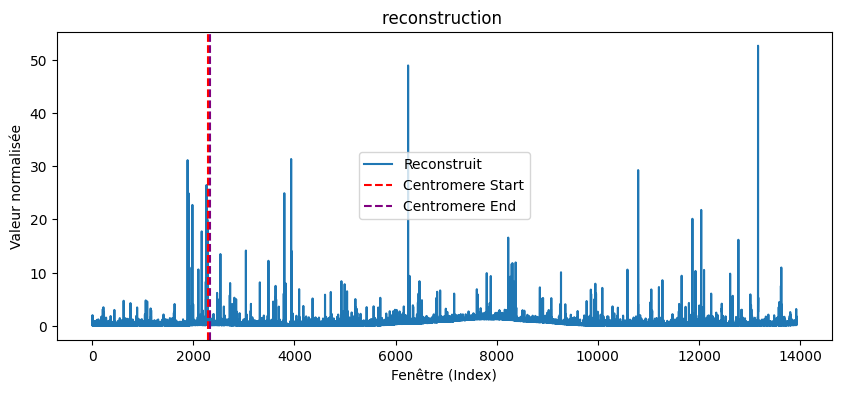

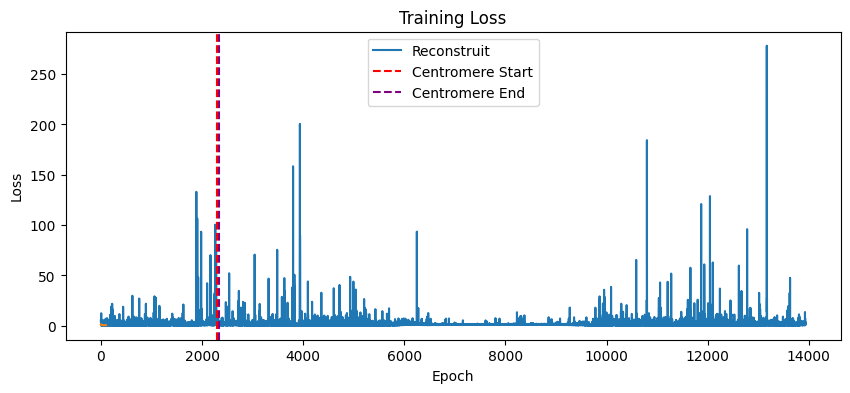

[[<tf.Tensor: shape=(2590,), dtype=float32, numpy=
array([0.31590226, 0.31316087, 0.35751274, ..., 3.9437532 , 0.4415097 ,
       2.143604  ], dtype=float32)>, array([ 0.7704763,  0.7634586,  0.871963 , ..., 17.469673 ,  1.9557719,
        9.495667 ], dtype=float32)], [<tf.Tensor: shape=(3458,), dtype=float32, numpy=
array([0.84758735, 0.75183105, 0.78168184, ..., 0.8472217 , 0.73171717,
       0.69455117], dtype=float32)>, array([1.0952119, 0.9719387, 1.0110059, ..., 1.5214452, 1.3135943,
       1.2464677], dtype=float32)], [<tf.Tensor: shape=(3746,), dtype=float32, numpy=
array([0.30874923, 0.40268493, 0.3191041 , ..., 1.4542493 , 1.4084473 ,
       1.4887613 ], dtype=float32)>, array([0.78956646, 1.0295734 , 0.8157056 , ..., 1.2307026 , 1.1916574 ,
       1.2593096 ], dtype=float32)], [<tf.Tensor: shape=(4629,), dtype=float32, numpy=
array([0.52157134, 0.62983674, 0.6286797 , ..., 0.90355587, 0.779844  ,
       0.738602  ], dtype=float32)>, array([0.97224534, 1.1746576 , 1.1730971 ,

  4%|█▋                                         | 4/100 [00:00<00:02, 32.05it/s]

Epoch 1, Loss: 1.2280992269515991
Epoch 2, Loss: 1.1871036291122437
Epoch 3, Loss: 1.1473298072814941
Epoch 4, Loss: 1.1088825464248657
Epoch 5, Loss: 1.0718549489974976
Epoch 6, Loss: 1.0363820791244507
Epoch 7, Loss: 1.0026211738586426


 12%|█████                                     | 12/100 [00:00<00:02, 33.40it/s]

Epoch 8, Loss: 0.9707293510437012
Epoch 9, Loss: 0.9408071041107178
Epoch 10, Loss: 0.9129353761672974
Epoch 11, Loss: 0.8871144652366638
Epoch 12, Loss: 0.863271951675415
Epoch 13, Loss: 0.8413140773773193
Epoch 14, Loss: 0.8211300373077393


 20%|████████▍                                 | 20/100 [00:00<00:02, 34.12it/s]

Epoch 15, Loss: 0.8026025295257568
Epoch 16, Loss: 0.7856167554855347
Epoch 17, Loss: 0.7700751423835754
Epoch 18, Loss: 0.7558866739273071
Epoch 19, Loss: 0.7429481148719788
Epoch 20, Loss: 0.7311545014381409
Epoch 21, Loss: 0.7204116582870483


 28%|███████████▊                              | 28/100 [00:00<00:02, 33.70it/s]

Epoch 22, Loss: 0.7106317281723022
Epoch 23, Loss: 0.7017295360565186
Epoch 24, Loss: 0.69362473487854
Epoch 25, Loss: 0.6862456202507019
Epoch 26, Loss: 0.6795245409011841
Epoch 27, Loss: 0.6734002828598022
Epoch 28, Loss: 0.6678183674812317


 36%|███████████████                           | 36/100 [00:01<00:01, 34.09it/s]

Epoch 29, Loss: 0.6627286076545715
Epoch 30, Loss: 0.6580864191055298
Epoch 31, Loss: 0.6538503170013428
Epoch 32, Loss: 0.6499846577644348
Epoch 33, Loss: 0.6464543342590332
Epoch 34, Loss: 0.643230140209198
Epoch 35, Loss: 0.6402844190597534
Epoch 36, Loss: 0.6375912427902222


 44%|██████████████████▍                       | 44/100 [00:01<00:01, 34.23it/s]

Epoch 37, Loss: 0.6351281404495239
Epoch 38, Loss: 0.632872998714447
Epoch 39, Loss: 0.6308048963546753
Epoch 40, Loss: 0.6289058923721313
Epoch 41, Loss: 0.6271582245826721
Epoch 42, Loss: 0.6255428791046143
Epoch 43, Loss: 0.6240453720092773
Epoch 44, Loss: 0.6226537227630615


 52%|█████████████████████▊                    | 52/100 [00:01<00:01, 34.43it/s]

Epoch 45, Loss: 0.6213566660881042
Epoch 46, Loss: 0.620143473148346
Epoch 47, Loss: 0.6190007328987122
Epoch 48, Loss: 0.6179255247116089
Epoch 49, Loss: 0.6169120669364929
Epoch 50, Loss: 0.6159551739692688
Epoch 51, Loss: 0.6150500774383545
Epoch 52, Loss: 0.6141930818557739


 56%|███████████████████████▌                  | 56/100 [00:01<00:01, 34.28it/s]

Epoch 53, Loss: 0.613379955291748
Epoch 54, Loss: 0.6126084327697754
Epoch 55, Loss: 0.6118756532669067
Epoch 56, Loss: 0.6111788153648376
Epoch 57, Loss: 0.6105156540870667
Epoch 58, Loss: 0.6098836660385132
Epoch 59, Loss: 0.609281063079834


 64%|██████████████████████████▉               | 64/100 [00:01<00:01, 34.38it/s]

Epoch 60, Loss: 0.6087062358856201
Epoch 61, Loss: 0.6081573963165283
Epoch 62, Loss: 0.6076322793960571
Epoch 63, Loss: 0.6071288585662842
Epoch 64, Loss: 0.6066460609436035
Epoch 65, Loss: 0.6061826348304749
Epoch 66, Loss: 0.605737030506134


 72%|██████████████████████████████▏           | 72/100 [00:02<00:00, 34.22it/s]

Epoch 67, Loss: 0.6053078174591064
Epoch 68, Loss: 0.604892909526825
Epoch 69, Loss: 0.6044918894767761
Epoch 70, Loss: 0.6041035056114197
Epoch 71, Loss: 0.6037263870239258
Epoch 72, Loss: 0.6033603549003601
Epoch 73, Loss: 0.6030040383338928


 80%|█████████████████████████████████▌        | 80/100 [00:02<00:00, 33.09it/s]

Epoch 74, Loss: 0.6026567816734314
Epoch 75, Loss: 0.6023186445236206
Epoch 76, Loss: 0.6019899249076843
Epoch 77, Loss: 0.6016706824302673
Epoch 78, Loss: 0.6013601422309875
Epoch 79, Loss: 0.6010582447052002
Epoch 80, Loss: 0.600764811038971


 84%|███████████████████████████████████▎      | 84/100 [00:02<00:00, 32.82it/s]

Epoch 81, Loss: 0.6004800796508789
Epoch 82, Loss: 0.6002038717269897
Epoch 83, Loss: 0.5999361276626587
Epoch 84, Loss: 0.5996766686439514
Epoch 85, Loss: 0.5994253754615784
Epoch 86, Loss: 0.5991819500923157
Epoch 87, Loss: 0.5989466905593872


 92%|██████████████████████████████████████▋   | 92/100 [00:02<00:00, 32.64it/s]

Epoch 88, Loss: 0.5987193584442139
Epoch 89, Loss: 0.598499596118927
Epoch 90, Loss: 0.5982876420021057
Epoch 91, Loss: 0.5980833172798157
Epoch 92, Loss: 0.5978866815567017
Epoch 93, Loss: 0.5976977348327637
Epoch 94, Loss: 0.5975161194801331


100%|█████████████████████████████████████████| 100/100 [00:02<00:00, 33.59it/s]

Epoch 95, Loss: 0.5973418354988098
Epoch 96, Loss: 0.5971748232841492
Epoch 97, Loss: 0.5970147252082825
Epoch 98, Loss: 0.5968618988990784
Epoch 99, Loss: 0.5967157483100891
Epoch 100, Loss: 0.5965760946273804


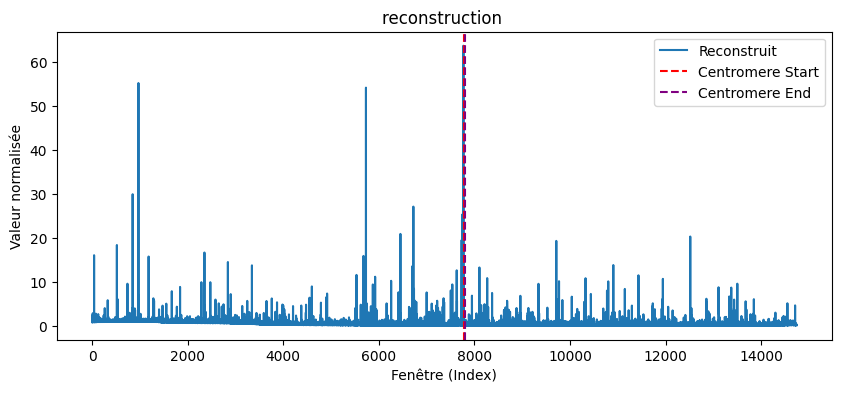

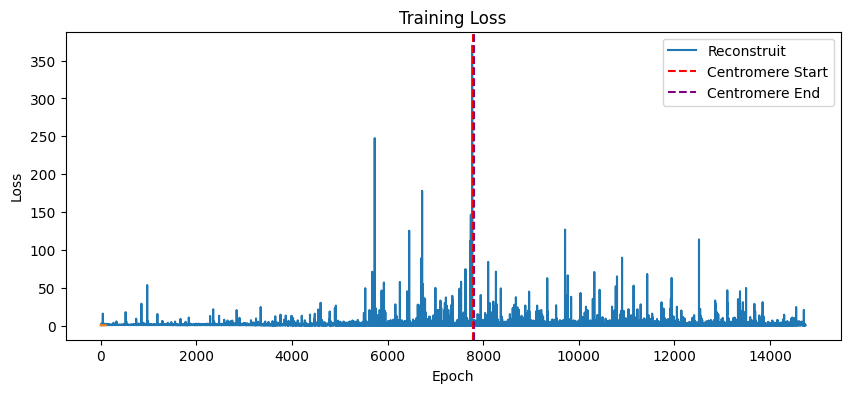

[[<tf.Tensor: shape=(2590,), dtype=float32, numpy=
array([0.31590226, 0.31316087, 0.35751274, ..., 3.9437532 , 0.4415097 ,
       2.143604  ], dtype=float32)>, array([ 0.7704763,  0.7634586,  0.871963 , ..., 17.469673 ,  1.9557719,
        9.495667 ], dtype=float32)], [<tf.Tensor: shape=(3458,), dtype=float32, numpy=
array([0.84758735, 0.75183105, 0.78168184, ..., 0.8472217 , 0.73171717,
       0.69455117], dtype=float32)>, array([1.0952119, 0.9719387, 1.0110059, ..., 1.5214452, 1.3135943,
       1.2464677], dtype=float32)], [<tf.Tensor: shape=(3746,), dtype=float32, numpy=
array([0.30874923, 0.40268493, 0.3191041 , ..., 1.4542493 , 1.4084473 ,
       1.4887613 ], dtype=float32)>, array([0.78956646, 1.0295734 , 0.8157056 , ..., 1.2307026 , 1.1916574 ,
       1.2593096 ], dtype=float32)], [<tf.Tensor: shape=(4629,), dtype=float32, numpy=
array([0.52157134, 0.62983674, 0.6286797 , ..., 0.90355587, 0.779844  ,
       0.738602  ], dtype=float32)>, array([0.97224534, 1.1746576 , 1.1730971 ,

  8%|███▍                                       | 8/100 [00:00<00:02, 33.80it/s]

Epoch 1, Loss: 1.2300602197647095
Epoch 2, Loss: 1.1930845975875854
Epoch 3, Loss: 1.1572185754776
Epoch 4, Loss: 1.122570514678955
Epoch 5, Loss: 1.0892008543014526
Epoch 6, Loss: 1.057164192199707
Epoch 7, Loss: 1.026332974433899
Epoch 8, Loss: 0.9966375827789307


 16%|██████▋                                   | 16/100 [00:00<00:02, 34.26it/s]

Epoch 9, Loss: 0.9681046605110168
Epoch 10, Loss: 0.9407529234886169
Epoch 11, Loss: 0.9146142601966858
Epoch 12, Loss: 0.8897379636764526
Epoch 13, Loss: 0.8661596775054932
Epoch 14, Loss: 0.8439164757728577
Epoch 15, Loss: 0.8230158686637878
Epoch 16, Loss: 0.8034706711769104


 24%|██████████                                | 24/100 [00:00<00:02, 34.52it/s]

Epoch 17, Loss: 0.7852739691734314
Epoch 18, Loss: 0.7684107422828674
Epoch 19, Loss: 0.7528576254844666
Epoch 20, Loss: 0.7385832071304321
Epoch 21, Loss: 0.7255460619926453
Epoch 22, Loss: 0.7136878967285156
Epoch 23, Loss: 0.7029433250427246
Epoch 24, Loss: 0.6932423114776611


 28%|███████████▊                              | 28/100 [00:00<00:02, 34.51it/s]

Epoch 25, Loss: 0.6845079660415649
Epoch 26, Loss: 0.6766581535339355
Epoch 27, Loss: 0.6696113348007202
Epoch 28, Loss: 0.6632869243621826
Epoch 29, Loss: 0.6576101183891296
Epoch 30, Loss: 0.6525112986564636
Epoch 31, Loss: 0.6479297876358032


 36%|███████████████                           | 36/100 [00:01<00:01, 33.74it/s]

Epoch 32, Loss: 0.6438127756118774
Epoch 33, Loss: 0.6401161551475525
Epoch 34, Loss: 0.6368048787117004
Epoch 35, Loss: 0.6338493227958679
Epoch 36, Loss: 0.6312322616577148
Epoch 37, Loss: 0.6289315223693848
Epoch 38, Loss: 0.626899242401123


 44%|██████████████████▍                       | 44/100 [00:01<00:01, 33.03it/s]

Epoch 39, Loss: 0.6250872611999512
Epoch 40, Loss: 0.623458981513977
Epoch 41, Loss: 0.6219820976257324
Epoch 42, Loss: 0.6206284761428833
Epoch 43, Loss: 0.6193758249282837
Epoch 44, Loss: 0.6182066798210144
Epoch 45, Loss: 0.617109477519989


 52%|█████████████████████▊                    | 52/100 [00:01<00:01, 33.53it/s]

Epoch 46, Loss: 0.6160768270492554
Epoch 47, Loss: 0.615105152130127
Epoch 48, Loss: 0.614193856716156
Epoch 49, Loss: 0.6133432388305664
Epoch 50, Loss: 0.612554132938385
Epoch 51, Loss: 0.6118272542953491
Epoch 52, Loss: 0.6111615896224976


 56%|███████████████████████▌                  | 56/100 [00:01<00:01, 33.16it/s]

Epoch 53, Loss: 0.6105546951293945
Epoch 54, Loss: 0.6100026369094849
Epoch 55, Loss: 0.609500527381897
Epoch 56, Loss: 0.6090422868728638
Epoch 57, Loss: 0.6086217761039734
Epoch 58, Loss: 0.6082327961921692
Epoch 59, Loss: 0.6078694462776184


 64%|██████████████████████████▉               | 64/100 [00:01<00:01, 33.17it/s]

Epoch 60, Loss: 0.6075264811515808
Epoch 61, Loss: 0.6072000861167908
Epoch 62, Loss: 0.6068880558013916
Epoch 63, Loss: 0.6065890789031982
Epoch 64, Loss: 0.6063029170036316
Epoch 65, Loss: 0.6060301065444946
Epoch 66, Loss: 0.6057710647583008


 72%|██████████████████████████████▏           | 72/100 [00:02<00:00, 33.94it/s]

Epoch 67, Loss: 0.6055266261100769
Epoch 68, Loss: 0.6052968502044678
Epoch 69, Loss: 0.6050811409950256
Epoch 70, Loss: 0.6048786044120789
Epoch 71, Loss: 0.6046878695487976
Epoch 72, Loss: 0.6045071482658386
Epoch 73, Loss: 0.6043349504470825
Epoch 74, Loss: 0.6041700839996338


 80%|█████████████████████████████████▌        | 80/100 [00:02<00:00, 34.13it/s]

Epoch 75, Loss: 0.6040114164352417
Epoch 76, Loss: 0.6038583517074585
Epoch 77, Loss: 0.6037104725837708
Epoch 78, Loss: 0.6035676002502441
Epoch 79, Loss: 0.6034300923347473
Epoch 80, Loss: 0.6032978296279907
Epoch 81, Loss: 0.6031711101531982


 88%|████████████████████████████████████▉     | 88/100 [00:02<00:00, 33.53it/s]

Epoch 82, Loss: 0.6030496954917908
Epoch 83, Loss: 0.6029335856437683
Epoch 84, Loss: 0.602822482585907
Epoch 85, Loss: 0.6027157306671143
Epoch 86, Loss: 0.6026131510734558
Epoch 87, Loss: 0.6025140285491943
Epoch 88, Loss: 0.6024181246757507


 92%|██████████████████████████████████████▋   | 92/100 [00:02<00:00, 33.32it/s]

Epoch 89, Loss: 0.6023248434066772
Epoch 90, Loss: 0.6022342443466187
Epoch 91, Loss: 0.6021460890769958
Epoch 92, Loss: 0.6020603775978088
Epoch 93, Loss: 0.6019771695137024
Epoch 94, Loss: 0.6018964648246765
Epoch 95, Loss: 0.6018183827400208


100%|█████████████████████████████████████████| 100/100 [00:02<00:00, 33.53it/s]

Epoch 96, Loss: 0.601742684841156
Epoch 97, Loss: 0.6016696095466614
Epoch 98, Loss: 0.6015987992286682
Epoch 99, Loss: 0.6015302538871765
Epoch 100, Loss: 0.6014637351036072


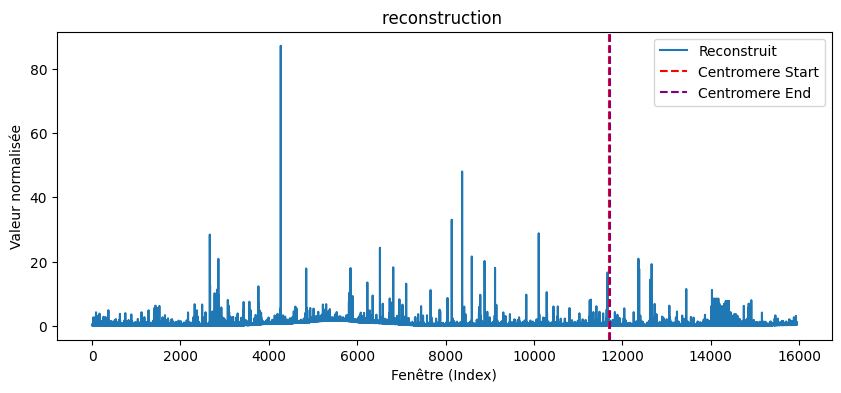

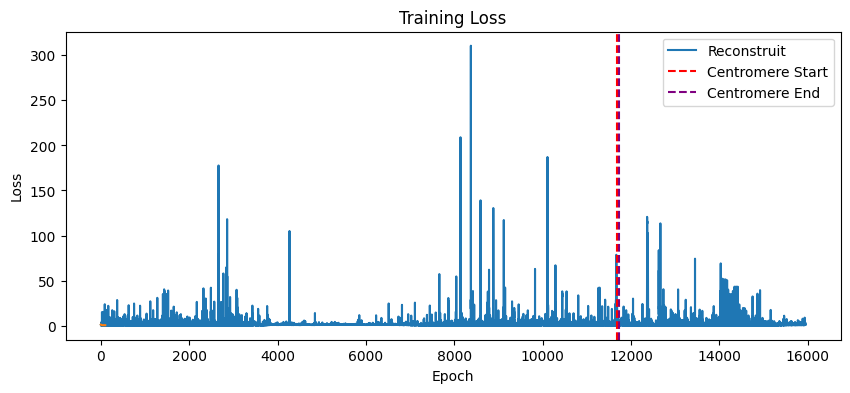

[[<tf.Tensor: shape=(2590,), dtype=float32, numpy=
array([0.31590226, 0.31316087, 0.35751274, ..., 3.9437532 , 0.4415097 ,
       2.143604  ], dtype=float32)>, array([ 0.7704763,  0.7634586,  0.871963 , ..., 17.469673 ,  1.9557719,
        9.495667 ], dtype=float32)], [<tf.Tensor: shape=(3458,), dtype=float32, numpy=
array([0.84758735, 0.75183105, 0.78168184, ..., 0.8472217 , 0.73171717,
       0.69455117], dtype=float32)>, array([1.0952119, 0.9719387, 1.0110059, ..., 1.5214452, 1.3135943,
       1.2464677], dtype=float32)], [<tf.Tensor: shape=(3746,), dtype=float32, numpy=
array([0.30874923, 0.40268493, 0.3191041 , ..., 1.4542493 , 1.4084473 ,
       1.4887613 ], dtype=float32)>, array([0.78956646, 1.0295734 , 0.8157056 , ..., 1.2307026 , 1.1916574 ,
       1.2593096 ], dtype=float32)], [<tf.Tensor: shape=(4629,), dtype=float32, numpy=
array([0.52157134, 0.62983674, 0.6286797 , ..., 0.90355587, 0.779844  ,
       0.738602  ], dtype=float32)>, array([0.97224534, 1.1746576 , 1.1730971 ,

  7%|███                                        | 7/100 [00:00<00:02, 31.49it/s]

Epoch 1, Loss: 1.2546985149383545
Epoch 2, Loss: 1.215295672416687
Epoch 3, Loss: 1.1774197816848755
Epoch 4, Loss: 1.1409858465194702
Epoch 5, Loss: 1.1059819459915161
Epoch 6, Loss: 1.0722922086715698
Epoch 7, Loss: 1.0397186279296875


 11%|████▌                                     | 11/100 [00:00<00:02, 32.00it/s]

Epoch 8, Loss: 1.0081065893173218
Epoch 9, Loss: 0.9773924350738525
Epoch 10, Loss: 0.9475913047790527
Epoch 11, Loss: 0.9187772274017334
Epoch 12, Loss: 0.8910446763038635
Epoch 13, Loss: 0.8644870519638062
Epoch 14, Loss: 0.8391732573509216


 19%|███████▉                                  | 19/100 [00:00<00:02, 32.98it/s]

Epoch 15, Loss: 0.8151441216468811
Epoch 16, Loss: 0.7924797534942627
Epoch 17, Loss: 0.7712447643280029
Epoch 18, Loss: 0.7514985203742981
Epoch 19, Loss: 0.7332796454429626
Epoch 20, Loss: 0.7165829539299011
Epoch 21, Loss: 0.7013913989067078


 27%|███████████▎                              | 27/100 [00:00<00:02, 33.27it/s]

Epoch 22, Loss: 0.6876668334007263
Epoch 23, Loss: 0.6753466129302979
Epoch 24, Loss: 0.664347767829895
Epoch 25, Loss: 0.6545729637145996
Epoch 26, Loss: 0.64591383934021
Epoch 27, Loss: 0.6382570862770081
Epoch 28, Loss: 0.6314903497695923


 35%|██████████████▋                           | 35/100 [00:01<00:01, 33.35it/s]

Epoch 29, Loss: 0.6255053281784058
Epoch 30, Loss: 0.6202001571655273
Epoch 31, Loss: 0.6154841780662537
Epoch 32, Loss: 0.6112759709358215
Epoch 33, Loss: 0.607505738735199
Epoch 34, Loss: 0.6041151881217957
Epoch 35, Loss: 0.6010587215423584


 39%|████████████████▍                         | 39/100 [00:01<00:01, 33.42it/s]

Epoch 36, Loss: 0.5982954502105713
Epoch 37, Loss: 0.5957878232002258
Epoch 38, Loss: 0.5935069918632507
Epoch 39, Loss: 0.5914296507835388
Epoch 40, Loss: 0.5895364880561829
Epoch 41, Loss: 0.5878100991249084
Epoch 42, Loss: 0.5862351059913635


 47%|███████████████████▋                      | 47/100 [00:01<00:01, 33.20it/s]

Epoch 43, Loss: 0.5847972631454468
Epoch 44, Loss: 0.5834836363792419
Epoch 45, Loss: 0.582285463809967
Epoch 46, Loss: 0.5811904072761536
Epoch 47, Loss: 0.5801845788955688
Epoch 48, Loss: 0.5792589783668518
Epoch 49, Loss: 0.5784056186676025


 55%|███████████████████████                   | 55/100 [00:01<00:01, 33.03it/s]

Epoch 50, Loss: 0.5776174068450928
Epoch 51, Loss: 0.5768882036209106
Epoch 52, Loss: 0.5762127637863159
Epoch 53, Loss: 0.5755863189697266
Epoch 54, Loss: 0.5750043392181396
Epoch 55, Loss: 0.5744631290435791
Epoch 56, Loss: 0.5739589333534241


 63%|██████████████████████████▍               | 63/100 [00:01<00:01, 33.23it/s]

Epoch 57, Loss: 0.5734884738922119
Epoch 58, Loss: 0.5730487704277039
Epoch 59, Loss: 0.5726369619369507
Epoch 60, Loss: 0.572250247001648
Epoch 61, Loss: 0.5718863010406494
Epoch 62, Loss: 0.5715429782867432
Epoch 63, Loss: 0.5712183713912964


 67%|████████████████████████████▏             | 67/100 [00:02<00:00, 33.40it/s]

Epoch 64, Loss: 0.5709105730056763
Epoch 65, Loss: 0.5706182718276978
Epoch 66, Loss: 0.5703403353691101
Epoch 67, Loss: 0.5700756311416626
Epoch 68, Loss: 0.5698232650756836
Epoch 69, Loss: 0.5695825815200806
Epoch 70, Loss: 0.5693531036376953


 75%|███████████████████████████████▌          | 75/100 [00:02<00:00, 33.31it/s]

Epoch 71, Loss: 0.5691338777542114
Epoch 72, Loss: 0.5689245462417603
Epoch 73, Loss: 0.5687242150306702
Epoch 74, Loss: 0.5685328841209412
Epoch 75, Loss: 0.5683498382568359
Epoch 76, Loss: 0.5681745409965515
Epoch 77, Loss: 0.5680067539215088


 83%|██████████████████████████████████▊       | 83/100 [00:02<00:00, 33.48it/s]

Epoch 78, Loss: 0.5678457617759705
Epoch 79, Loss: 0.5676911473274231
Epoch 80, Loss: 0.5675424933433533
Epoch 81, Loss: 0.5673993825912476
Epoch 82, Loss: 0.5672616362571716
Epoch 83, Loss: 0.5671286582946777
Epoch 84, Loss: 0.5670004487037659


 91%|██████████████████████████████████████▏   | 91/100 [00:02<00:00, 33.57it/s]

Epoch 85, Loss: 0.5668763518333435
Epoch 86, Loss: 0.5667561888694763
Epoch 87, Loss: 0.5666399002075195
Epoch 88, Loss: 0.5665270090103149
Epoch 89, Loss: 0.5664176344871521
Epoch 90, Loss: 0.5663115978240967
Epoch 91, Loss: 0.5662084817886353


 95%|███████████████████████████████████████▉  | 95/100 [00:02<00:00, 33.29it/s]

Epoch 92, Loss: 0.5661083459854126
Epoch 93, Loss: 0.5660111904144287
Epoch 94, Loss: 0.5659167766571045
Epoch 95, Loss: 0.5658249855041504
Epoch 96, Loss: 0.5657357573509216
Epoch 97, Loss: 0.5656490325927734
Epoch 98, Loss: 0.5655646920204163


100%|█████████████████████████████████████████| 100/100 [00:03<00:00, 33.16it/s]


Epoch 99, Loss: 0.5654826760292053
Epoch 100, Loss: 0.5654028654098511


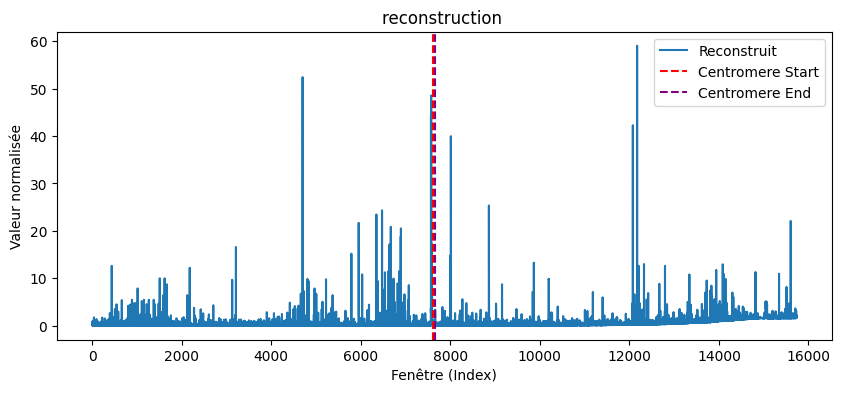

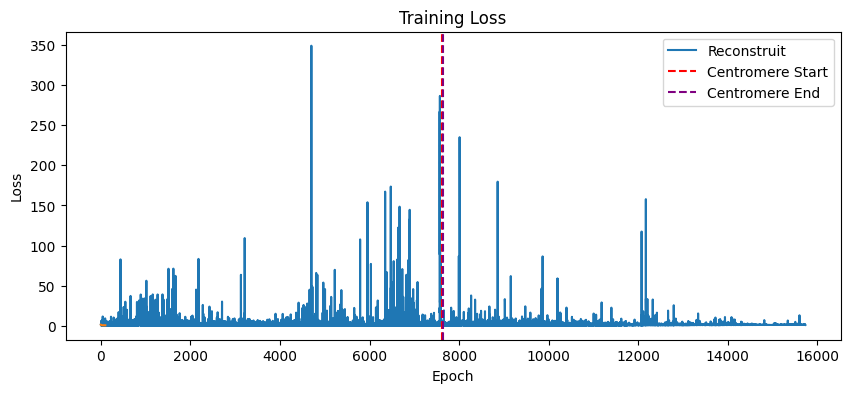

[[<tf.Tensor: shape=(2590,), dtype=float32, numpy=
array([0.31590226, 0.31316087, 0.35751274, ..., 3.9437532 , 0.4415097 ,
       2.143604  ], dtype=float32)>, array([ 0.7704763,  0.7634586,  0.871963 , ..., 17.469673 ,  1.9557719,
        9.495667 ], dtype=float32)], [<tf.Tensor: shape=(3458,), dtype=float32, numpy=
array([0.84758735, 0.75183105, 0.78168184, ..., 0.8472217 , 0.73171717,
       0.69455117], dtype=float32)>, array([1.0952119, 0.9719387, 1.0110059, ..., 1.5214452, 1.3135943,
       1.2464677], dtype=float32)], [<tf.Tensor: shape=(3746,), dtype=float32, numpy=
array([0.30874923, 0.40268493, 0.3191041 , ..., 1.4542493 , 1.4084473 ,
       1.4887613 ], dtype=float32)>, array([0.78956646, 1.0295734 , 0.8157056 , ..., 1.2307026 , 1.1916574 ,
       1.2593096 ], dtype=float32)], [<tf.Tensor: shape=(4629,), dtype=float32, numpy=
array([0.52157134, 0.62983674, 0.6286797 , ..., 0.90355587, 0.779844  ,
       0.738602  ], dtype=float32)>, array([0.97224534, 1.1746576 , 1.1730971 ,

  7%|███                                        | 7/100 [00:00<00:02, 32.13it/s]

Epoch 1, Loss: 1.237496018409729
Epoch 2, Loss: 1.2007529735565186
Epoch 3, Loss: 1.164987325668335
Epoch 4, Loss: 1.1303414106369019
Epoch 5, Loss: 1.0971167087554932
Epoch 6, Loss: 1.0655864477157593
Epoch 7, Loss: 1.0356688499450684


 11%|████▌                                     | 11/100 [00:00<00:02, 31.79it/s]

Epoch 8, Loss: 1.00731360912323
Epoch 9, Loss: 0.9804558157920837
Epoch 10, Loss: 0.9550093412399292
Epoch 11, Loss: 0.9308925271034241
Epoch 12, Loss: 0.9080302715301514
Epoch 13, Loss: 0.8863963484764099
Epoch 14, Loss: 0.8659639954566956


 19%|███████▉                                  | 19/100 [00:00<00:02, 32.70it/s]

Epoch 15, Loss: 0.846712589263916
Epoch 16, Loss: 0.8286646008491516
Epoch 17, Loss: 0.811833381652832
Epoch 18, Loss: 0.7961924076080322
Epoch 19, Loss: 0.7817296385765076
Epoch 20, Loss: 0.7684319615364075
Epoch 21, Loss: 0.7562806010246277


 27%|███████████▎                              | 27/100 [00:00<00:02, 32.80it/s]

Epoch 22, Loss: 0.7452425360679626
Epoch 23, Loss: 0.7352626919746399
Epoch 24, Loss: 0.726270318031311
Epoch 25, Loss: 0.7181891202926636
Epoch 26, Loss: 0.7109379768371582
Epoch 27, Loss: 0.7044358849525452
Epoch 28, Loss: 0.6986042261123657


 35%|██████████████▋                           | 35/100 [00:01<00:01, 32.68it/s]

Epoch 29, Loss: 0.6933696269989014
Epoch 30, Loss: 0.6886632442474365
Epoch 31, Loss: 0.6844222545623779
Epoch 32, Loss: 0.6805919408798218
Epoch 33, Loss: 0.6771222949028015
Epoch 34, Loss: 0.6739713549613953
Epoch 35, Loss: 0.6711035370826721


 39%|████████████████▍                         | 39/100 [00:01<00:01, 32.79it/s]

Epoch 36, Loss: 0.6684908270835876
Epoch 37, Loss: 0.6661062836647034
Epoch 38, Loss: 0.6639227867126465
Epoch 39, Loss: 0.6619212627410889
Epoch 40, Loss: 0.6600866317749023
Epoch 41, Loss: 0.6584067344665527
Epoch 42, Loss: 0.6568720936775208


 47%|███████████████████▋                      | 47/100 [00:01<00:01, 32.92it/s]

Epoch 43, Loss: 0.6554747819900513
Epoch 44, Loss: 0.6542083024978638
Epoch 45, Loss: 0.6530655026435852
Epoch 46, Loss: 0.6520377993583679
Epoch 47, Loss: 0.6511126160621643
Epoch 48, Loss: 0.6502732634544373
Epoch 49, Loss: 0.6495047807693481


 55%|███████████████████████                   | 55/100 [00:01<00:01, 33.26it/s]

Epoch 50, Loss: 0.6488075852394104
Epoch 51, Loss: 0.6481798887252808
Epoch 52, Loss: 0.6476047039031982
Epoch 53, Loss: 0.6470656394958496
Epoch 54, Loss: 0.6465529203414917
Epoch 55, Loss: 0.6460616588592529
Epoch 56, Loss: 0.6455904245376587


 63%|██████████████████████████▍               | 63/100 [00:01<00:01, 32.95it/s]

Epoch 57, Loss: 0.6451405882835388
Epoch 58, Loss: 0.6447151303291321
Epoch 59, Loss: 0.6443184018135071
Epoch 60, Loss: 0.6439523696899414
Epoch 61, Loss: 0.6436136960983276
Epoch 62, Loss: 0.6432954668998718
Epoch 63, Loss: 0.6429929137229919


 67%|████████████████████████████▏             | 67/100 [00:02<00:01, 32.35it/s]

Epoch 64, Loss: 0.6427040696144104
Epoch 65, Loss: 0.642427921295166
Epoch 66, Loss: 0.6421638131141663
Epoch 67, Loss: 0.6419110298156738
Epoch 68, Loss: 0.6416690349578857
Epoch 69, Loss: 0.6414373517036438
Epoch 70, Loss: 0.6412150263786316


 75%|███████████████████████████████▌          | 75/100 [00:02<00:00, 31.89it/s]

Epoch 71, Loss: 0.6410017609596252
Epoch 72, Loss: 0.6407972574234009
Epoch 73, Loss: 0.6406006813049316
Epoch 74, Loss: 0.640411913394928
Epoch 75, Loss: 0.6402302384376526
Epoch 76, Loss: 0.6400554180145264
Epoch 77, Loss: 0.6398872137069702


 83%|██████████████████████████████████▊       | 83/100 [00:02<00:00, 31.23it/s]

Epoch 78, Loss: 0.6397249698638916
Epoch 79, Loss: 0.6395685076713562
Epoch 80, Loss: 0.6394174098968506
Epoch 81, Loss: 0.6392713785171509
Epoch 82, Loss: 0.6391300559043884
Epoch 83, Loss: 0.6389931440353394
Epoch 84, Loss: 0.6388603448867798


 91%|██████████████████████████████████████▏   | 91/100 [00:02<00:00, 31.58it/s]

Epoch 85, Loss: 0.6387314796447754
Epoch 86, Loss: 0.6386063098907471
Epoch 87, Loss: 0.6384846568107605
Epoch 88, Loss: 0.6383664011955261
Epoch 89, Loss: 0.6382513046264648
Epoch 90, Loss: 0.6381394267082214
Epoch 91, Loss: 0.6380305290222168


 95%|███████████████████████████████████████▉  | 95/100 [00:02<00:00, 31.56it/s]

Epoch 92, Loss: 0.6379247307777405
Epoch 93, Loss: 0.6378215551376343
Epoch 94, Loss: 0.6377211809158325
Epoch 95, Loss: 0.6376236081123352
Epoch 96, Loss: 0.6375284790992737
Epoch 97, Loss: 0.6374358534812927
Epoch 98, Loss: 0.6373457312583923


100%|█████████████████████████████████████████| 100/100 [00:03<00:00, 32.20it/s]


Epoch 99, Loss: 0.6372578144073486
Epoch 100, Loss: 0.6371720433235168


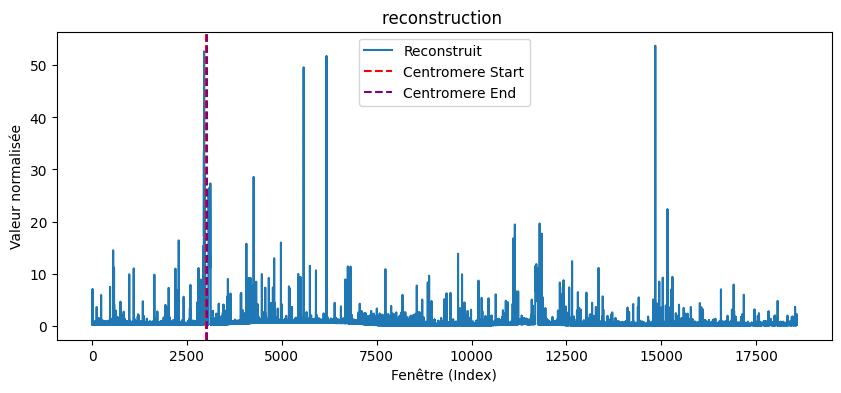

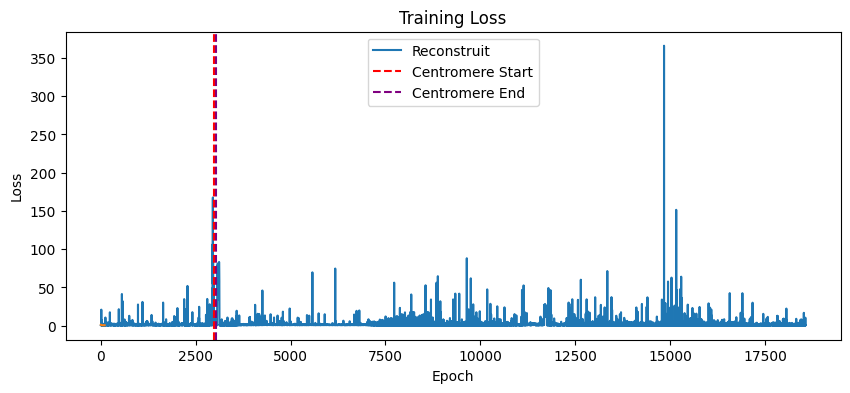

[[<tf.Tensor: shape=(2590,), dtype=float32, numpy=
array([0.31590226, 0.31316087, 0.35751274, ..., 3.9437532 , 0.4415097 ,
       2.143604  ], dtype=float32)>, array([ 0.7704763,  0.7634586,  0.871963 , ..., 17.469673 ,  1.9557719,
        9.495667 ], dtype=float32)], [<tf.Tensor: shape=(3458,), dtype=float32, numpy=
array([0.84758735, 0.75183105, 0.78168184, ..., 0.8472217 , 0.73171717,
       0.69455117], dtype=float32)>, array([1.0952119, 0.9719387, 1.0110059, ..., 1.5214452, 1.3135943,
       1.2464677], dtype=float32)], [<tf.Tensor: shape=(3746,), dtype=float32, numpy=
array([0.30874923, 0.40268493, 0.3191041 , ..., 1.4542493 , 1.4084473 ,
       1.4887613 ], dtype=float32)>, array([0.78956646, 1.0295734 , 0.8157056 , ..., 1.2307026 , 1.1916574 ,
       1.2593096 ], dtype=float32)], [<tf.Tensor: shape=(4629,), dtype=float32, numpy=
array([0.52157134, 0.62983674, 0.6286797 , ..., 0.90355587, 0.779844  ,
       0.738602  ], dtype=float32)>, array([0.97224534, 1.1746576 , 1.1730971 ,

  3%|█▎                                         | 3/100 [00:00<00:03, 27.71it/s]

Epoch 1, Loss: 1.2728642225265503
Epoch 2, Loss: 1.23309326171875
Epoch 3, Loss: 1.19429612159729
Epoch 4, Loss: 1.156793236732483
Epoch 5, Loss: 1.1207672357559204
Epoch 6, Loss: 1.0862575769424438
Epoch 7, Loss: 1.0532175302505493


 11%|████▌                                     | 11/100 [00:00<00:03, 29.53it/s]

Epoch 8, Loss: 1.0215837955474854
Epoch 9, Loss: 0.9913032650947571
Epoch 10, Loss: 0.9623520374298096
Epoch 11, Loss: 0.9347137212753296
Epoch 12, Loss: 0.9084070324897766
Epoch 13, Loss: 0.8834586143493652
Epoch 14, Loss: 0.8598886132240295


 19%|███████▉                                  | 19/100 [00:00<00:02, 30.91it/s]

Epoch 15, Loss: 0.837705135345459
Epoch 16, Loss: 0.8169241547584534
Epoch 17, Loss: 0.7975434064865112
Epoch 18, Loss: 0.7795504331588745
Epoch 19, Loss: 0.7629233002662659
Epoch 20, Loss: 0.7476301789283752
Epoch 21, Loss: 0.7336252331733704


 27%|███████████▎                              | 27/100 [00:00<00:02, 31.33it/s]

Epoch 22, Loss: 0.7208534479141235
Epoch 23, Loss: 0.7092517614364624
Epoch 24, Loss: 0.6987481117248535
Epoch 25, Loss: 0.6892653107643127
Epoch 26, Loss: 0.680720865726471
Epoch 27, Loss: 0.6730323433876038
Epoch 28, Loss: 0.6661186218261719


 35%|██████████████▋                           | 35/100 [00:01<00:02, 31.56it/s]

Epoch 29, Loss: 0.6599017381668091
Epoch 30, Loss: 0.6543071866035461
Epoch 31, Loss: 0.64926677942276
Epoch 32, Loss: 0.6447182297706604
Epoch 33, Loss: 0.6406056880950928
Epoch 34, Loss: 0.636879563331604
Epoch 35, Loss: 0.6334964632987976


 39%|████████████████▍                         | 39/100 [00:01<00:01, 31.64it/s]

Epoch 36, Loss: 0.6304185390472412
Epoch 37, Loss: 0.6276134252548218
Epoch 38, Loss: 0.6250528693199158
Epoch 39, Loss: 0.6227126121520996
Epoch 40, Loss: 0.6205717325210571
Epoch 41, Loss: 0.6186123490333557
Epoch 42, Loss: 0.6168190240859985


 47%|███████████████████▋                      | 47/100 [00:01<00:01, 31.47it/s]

Epoch 43, Loss: 0.6151778697967529
Epoch 44, Loss: 0.6136764287948608
Epoch 45, Loss: 0.6123036742210388
Epoch 46, Loss: 0.6110489368438721
Epoch 47, Loss: 0.6099020838737488
Epoch 48, Loss: 0.6088539958000183
Epoch 49, Loss: 0.6078953742980957


 55%|███████████████████████                   | 55/100 [00:01<00:01, 31.72it/s]

Epoch 50, Loss: 0.607017457485199
Epoch 51, Loss: 0.6062119603157043
Epoch 52, Loss: 0.6054709553718567
Epoch 53, Loss: 0.6047870516777039
Epoch 54, Loss: 0.6041533946990967
Epoch 55, Loss: 0.6035640239715576
Epoch 56, Loss: 0.6030135750770569


 63%|██████████████████████████▍               | 63/100 [00:02<00:01, 31.96it/s]

Epoch 57, Loss: 0.6024978756904602
Epoch 58, Loss: 0.6020130515098572
Epoch 59, Loss: 0.601556122303009
Epoch 60, Loss: 0.60112464427948
Epoch 61, Loss: 0.6007168889045715
Epoch 62, Loss: 0.6003316044807434
Epoch 63, Loss: 0.599967360496521


 67%|████████████████████████████▏             | 67/100 [00:02<00:01, 31.54it/s]

Epoch 64, Loss: 0.5996232628822327
Epoch 65, Loss: 0.599298357963562
Epoch 66, Loss: 0.5989916920661926
Epoch 67, Loss: 0.5987021327018738
Epoch 68, Loss: 0.5984286069869995
Epoch 69, Loss: 0.5981698632240295
Epoch 70, Loss: 0.5979248881340027


 75%|███████████████████████████████▌          | 75/100 [00:02<00:00, 31.50it/s]

Epoch 71, Loss: 0.5976924896240234
Epoch 72, Loss: 0.5974715352058411
Epoch 73, Loss: 0.5972608923912048
Epoch 74, Loss: 0.5970598459243774
Epoch 75, Loss: 0.5968673229217529
Epoch 76, Loss: 0.5966827869415283
Epoch 77, Loss: 0.5965054631233215


 83%|██████████████████████████████████▊       | 83/100 [00:02<00:00, 31.68it/s]

Epoch 78, Loss: 0.5963349342346191
Epoch 79, Loss: 0.5961707830429077
Epoch 80, Loss: 0.5960127115249634
Epoch 81, Loss: 0.5958605408668518
Epoch 82, Loss: 0.5957139134407043
Epoch 83, Loss: 0.5955727100372314
Epoch 84, Loss: 0.5954364538192749


 91%|██████████████████████████████████████▏   | 91/100 [00:02<00:00, 31.47it/s]

Epoch 85, Loss: 0.5953052043914795
Epoch 86, Loss: 0.5951785445213318
Epoch 87, Loss: 0.5950562953948975
Epoch 88, Loss: 0.594938337802887
Epoch 89, Loss: 0.5948243141174316
Epoch 90, Loss: 0.5947138667106628
Epoch 91, Loss: 0.5946069955825806


 95%|███████████████████████████████████████▉  | 95/100 [00:03<00:00, 31.52it/s]

Epoch 92, Loss: 0.5945032835006714
Epoch 93, Loss: 0.5944024920463562
Epoch 94, Loss: 0.594304621219635
Epoch 95, Loss: 0.5942094326019287
Epoch 96, Loss: 0.594116747379303
Epoch 97, Loss: 0.594026505947113
Epoch 98, Loss: 0.5939386487007141


100%|█████████████████████████████████████████| 100/100 [00:03<00:00, 31.33it/s]


Epoch 99, Loss: 0.5938531160354614
Epoch 100, Loss: 0.593769907951355


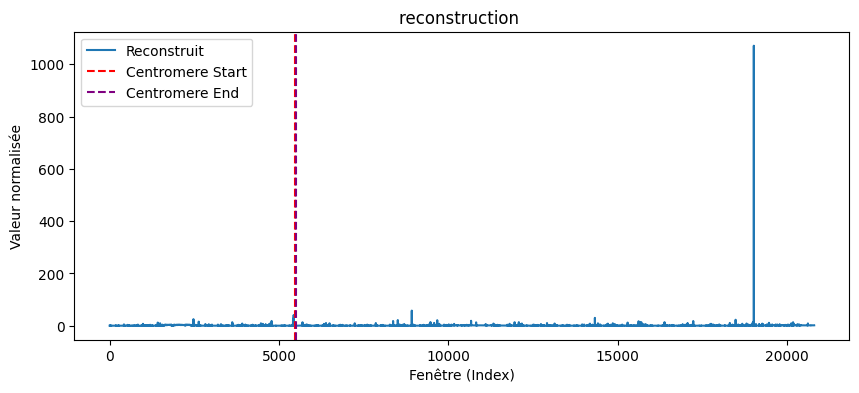

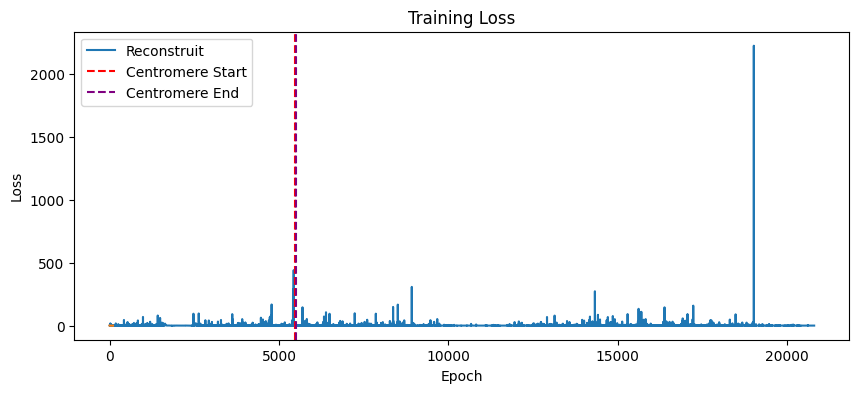

[[<tf.Tensor: shape=(2590,), dtype=float32, numpy=
array([0.31590226, 0.31316087, 0.35751274, ..., 3.9437532 , 0.4415097 ,
       2.143604  ], dtype=float32)>, array([ 0.7704763,  0.7634586,  0.871963 , ..., 17.469673 ,  1.9557719,
        9.495667 ], dtype=float32)], [<tf.Tensor: shape=(3458,), dtype=float32, numpy=
array([0.84758735, 0.75183105, 0.78168184, ..., 0.8472217 , 0.73171717,
       0.69455117], dtype=float32)>, array([1.0952119, 0.9719387, 1.0110059, ..., 1.5214452, 1.3135943,
       1.2464677], dtype=float32)], [<tf.Tensor: shape=(3746,), dtype=float32, numpy=
array([0.30874923, 0.40268493, 0.3191041 , ..., 1.4542493 , 1.4084473 ,
       1.4887613 ], dtype=float32)>, array([0.78956646, 1.0295734 , 0.8157056 , ..., 1.2307026 , 1.1916574 ,
       1.2593096 ], dtype=float32)], [<tf.Tensor: shape=(4629,), dtype=float32, numpy=
array([0.52157134, 0.62983674, 0.6286797 , ..., 0.90355587, 0.779844  ,
       0.738602  ], dtype=float32)>, array([0.97224534, 1.1746576 , 1.1730971 ,

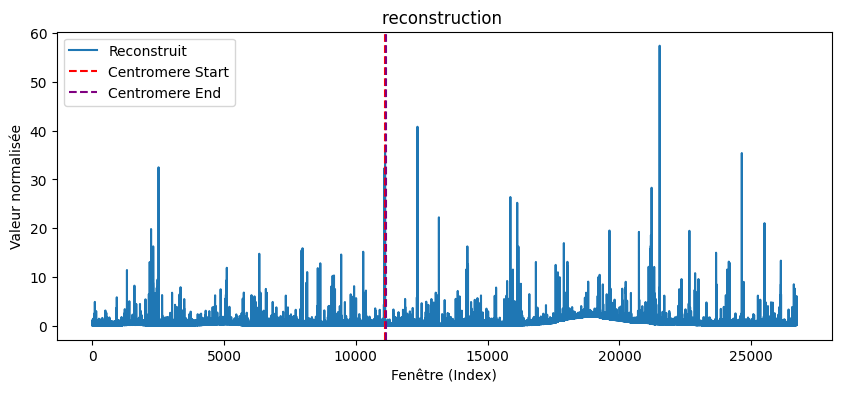

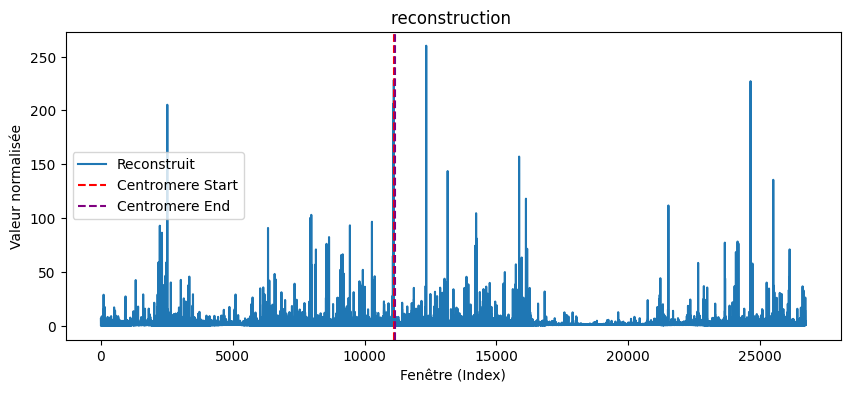

In [195]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers, losses
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

df = pd.read_csv("../data/Centromere_Positions/centromeres.csv")
centromeres = {
    row['Chromosome']: (row['Centromere_Start'], row['Centromere_End'])
    for _, row in df.iterrows()
}

i = 0
sauvegarde = []
for chromosome in data:
    i = i+1
    chromosome['X2_X3_X4'] =  chromosome['X3'] * chromosome['X4'] *  chromosome['X2']
    # Taille de la fenêtre
    k = 1000
    errors_np =  chromosome['y_val']
    # Liste des médianes locales
    local_medians = np.array([
        np.median(errors_np[max(0, i - k//2):min(len(errors_np), i + k//2 + 1)])
        for i in range(len(errors_np))
    ])
    
    # Re-normaliser
    normalized_errors = errors_np / local_medians

    chromosome['test'] =  local_medians

    # Réorganiser les colonnes
    chromosome = chromosome[['karlin', 'X2_X3_X4','test']]
    #chromosome = chromosome[[ 'karlin','X3', 'X4','X2']]

    scaler = StandardScaler()
    chromosome_scaled = scaler.fit_transform(chromosome)
    
    
    # Hyperparameters
    nfeat = 32 # Number of encoded features
    lr = 0.01
    epochs = 100
    quiet = False
    
    # Assume data is a NumPy array
    input_dim = chromosome_scaled.shape[1]
    
    # Build the autoencoder
    class Autoencoder(tf.keras.Model):
        def __init__(self, input_dim):
            super(Autoencoder, self).__init__()
            self.encoder = models.Sequential([
                layers.Dense(nfeat, activation='relu'),
    
            ])
            self.decoder = models.Sequential([
                layers.Dense(input_dim, activation='sigmoid')
            ])
    
        def call(self, x):
            encoded = self.encoder(x)
            decoded = self.decoder(encoded)
            return decoded
    
        def build(self, input_shape):
                self.encoder.build(input_shape)
                self.decoder.build((input_shape[0], nfeat))
                super().build(input_shape)
    
    # Initialize model
    model = Autoencoder(input_dim)
    model.build(input_shape=(None, input_dim))
    optimizer = optimizers.Adam(learning_rate=lr)
    mse_loss = losses.MeanSquaredError()
    
    # Convert data to tensor
    data_tensor = tf.convert_to_tensor(chromosome_scaled, dtype=tf.float32)
    
    # Training loop
    losses_list = []
    for epoch in tqdm(range(epochs), disable=quiet):
        with tf.GradientTape() as tape:
            output = model(data_tensor)
            loss = mse_loss(data_tensor, output)
        gradients = tape.gradient(loss, model.trainable_variables)
        optimizer.apply_gradients(zip(gradients, model.trainable_variables))
        losses_list.append(loss.numpy())
    
        if not quiet:
            print(f"Epoch {epoch+1}, Loss: {loss.numpy()}")
    
    # Plot losses
    plt.figure(2)
    plt.plot(losses_list)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training Loss')
    plt.show()
    
    # Compute reconstruction error
    reconstructed = model(data_tensor)
    errors = tf.reduce_mean(tf.math.squared_difference(data_tensor, reconstructed), axis=1)


    

        # Reconstruction complète
    # Ici reconstructed et data_tensor sont dans l'espace original (2 features)
    # Par exemple, comparer la 1ère feature originale et reconstruite
    plt.figure(figsize=(10, 4))
    plt.plot(errors, label='Reconstruit')
    plt.xlabel('Fenêtre (Index)')
    plt.ylabel('Valeur normalisée')
    plt.title('reconstruction ')
    plt.ylim()
    
    if str(i) in centromeres:
        cent_start, cent_end = centromeres[str(i)]
        plt.axvline(x=cent_start/100, color='red', linestyle='--', label='Centromere Start')
        plt.axvline(x=cent_end/100, color='purple', linestyle='--', label='Centromere End')
    plt.legend()
    plt.savefig(f"../output/dataExploration/x3/{i}.png")

        # Convertir en numpy
    errors_np = errors.numpy()
    
    # Taille de la fenêtre
    k = 1000
    
    # Liste des médianes locales
    local_medians = np.array([
        np.median(errors_np[max(0, i - k//2):min(len(errors_np), i + k//2 + 1)])
        for i in range(len(errors_np))
    ])
    
    # Re-normaliser
    normalized_errors = errors_np / local_medians

        # Reconstruction complète
    # Ici reconstructed et data_tensor sont dans l'espace original (2 features)
    # Par exemple, comparer la 1ère feature originale et reconstruite
    plt.figure(figsize=(10, 4))
    plt.plot(normalized_errors, label='Reconstruit')
    plt.xlabel('Fenêtre (Index)')
    plt.ylabel('Valeur normalisée')
    plt.title('reconstruction ')
    plt.ylim()
    
    if str(i) in centromeres:
        cent_start, cent_end = centromeres[str(i)]
        plt.axvline(x=cent_start/100, color='red', linestyle='--', label='Centromere Start')
        plt.axvline(x=cent_end/100, color='purple', linestyle='--', label='Centromere End')
        
    plt.legend()
    plt.savefig(f"../output/dataExploration/x3/{i}_.png")

    test = [errors,normalized_errors]
    sauvegarde.append(test)
    print(sauvegarde)


In [184]:
#Detection sur les graphqiues 
h = 0
detection = []
for chrom in sauvegarde:
    h = h+1
    print(h)
    detection_temp = []

    temp_ = chrom[0]
    temp = temp_[50:-50]
    
    # Trouver la plus grande valeur et son index
    # Trouver l'index et la valeur maximale
    max_idx = np.argmax(temp)
    
    
    max_idx = [max_idx]
    detection_temp.append(max_idx)
    
    
    prominence = 4  # Ajuster cette valeur pour contrôler la sensibilité
    distance = 5  # Distance minimale entre les pics en bases
    
    # Trouver les pics positifs
    peaks_pos, _ = find_peaks(temp, prominence=prominence, distance=distance)
    
    
    
    detection_temp.append(peaks_pos)
    # Taille de la fenêtre pour la moyenne (±10)
    #fenetre = 40
    
    # Calcul de la moyenne autour de chaque pic
    #moyennes = []
    #for peak in peaks_pos:
        #start = max(peak - fenetre, 0)
       # end = min(peak + fenetre + 1, len(temp))
      #  moyenne_locale = np.mean(temp[start:end])
     #   moyennes.append(moyenne_locale)
    
    # Trouver le pic avec la moyenne la plus élevée
    #indice_max_moyenne = np.argmax(moyennes)
    #pic_max = peaks_pos[indice_max_moyenne]
    #valeur_moyenne_max = moyennes[indice_max_moyenne]
    
    #pic_max = [pic_max]


    fenetre =50  # taille totale de la fenêtre (10 de chaque côté par exemple)
    moitié = fenetre // 2
    
    # Initialiser une liste pour stocker le nombre de pics dans chaque fenêtre
    counts = []
    
    # Balayer tout le signal
    for i in range(len(temp)):
        # Définir la fenêtre centrée autour de i
        debut = max(0, i - moitié)
        fin = min(len(temp), i + moitié)
        
        # Compter combien de pics sont dans cette fenêtre
        count = np.sum((peaks_pos >= debut) & (peaks_pos < fin))
        counts.append(count)

                # Calculer la moyenne de temp dans cette fenêtre
        moyenne = np.mean(temp[debut:fin])
        moyennes.append(moyenne)
        

    # Trouver l'indice avec le maximum de pics
    max_index = np.argmax(counts)
    
    
    
    
    
    # Trouver le maximum de pics
    max_count = max(counts)
    
    # Trouver tous les indices avec ce maximum
    indices_max = [i for i, c in enumerate(counts) if c == max_count]
    
    # Trouver parmi eux celui avec la plus grande moyenne
    meilleur_indice = max(indices_max, key=lambda i: moyennes[i])
    

    
    # Trouver l'indice avec le maximum de pics
    pic_max = [meilleur_indice]

    
    detection_temp.append(pic_max)
    detection.append(detection_temp)

    

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36


In [185]:
# Valider les positions 

df = pd.read_csv("../data/Centromere_Positions/centromeres.csv")
centromeres = {
    row['Chromosome']: (row['Centromere_Start'], row['Centromere_End'])
    for _, row in df.iterrows()
}
i = 0
nb_valide = [0,0,0]
nb_total = [0,0,0]
for chrom in detection:
    i = i+1
    if str(i) in centromeres:
        cent_start, cent_end = centromeres[str(i)]
        cent_start = (cent_start/100)-60
        cent_end = cent_end/100-40
        t = 0
        for methode in chrom:

            for valeur in methode:
                nb_total[t] = nb_total[t]+1
                if cent_start <= valeur <= cent_end:
                    nb_valide[t] = nb_valide[t]+1
                    if t == 2:
                        print(f"Valide {i}")
            t = t+1
    
print(nb_valide)
print(nb_total)


Valide 5
[3, 43, 1]
[36, 2529, 36]


tf.Tensor([0.15808344 0.4517613  0.2530336  ... 0.25110382 0.24022987 0.53034836], shape=(5864,), dtype=float32)


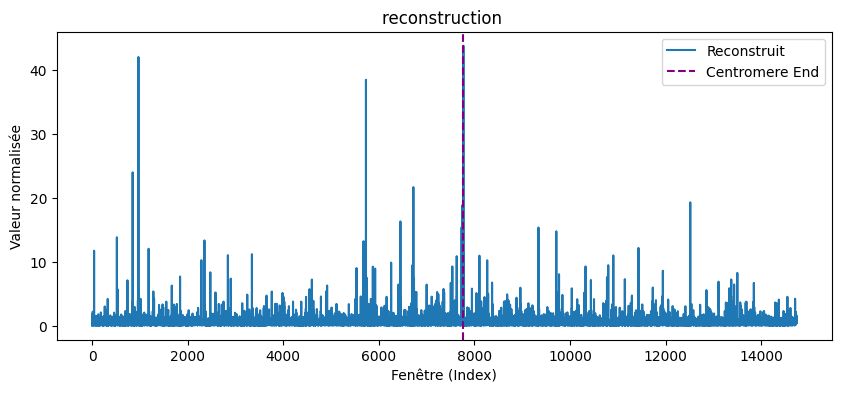

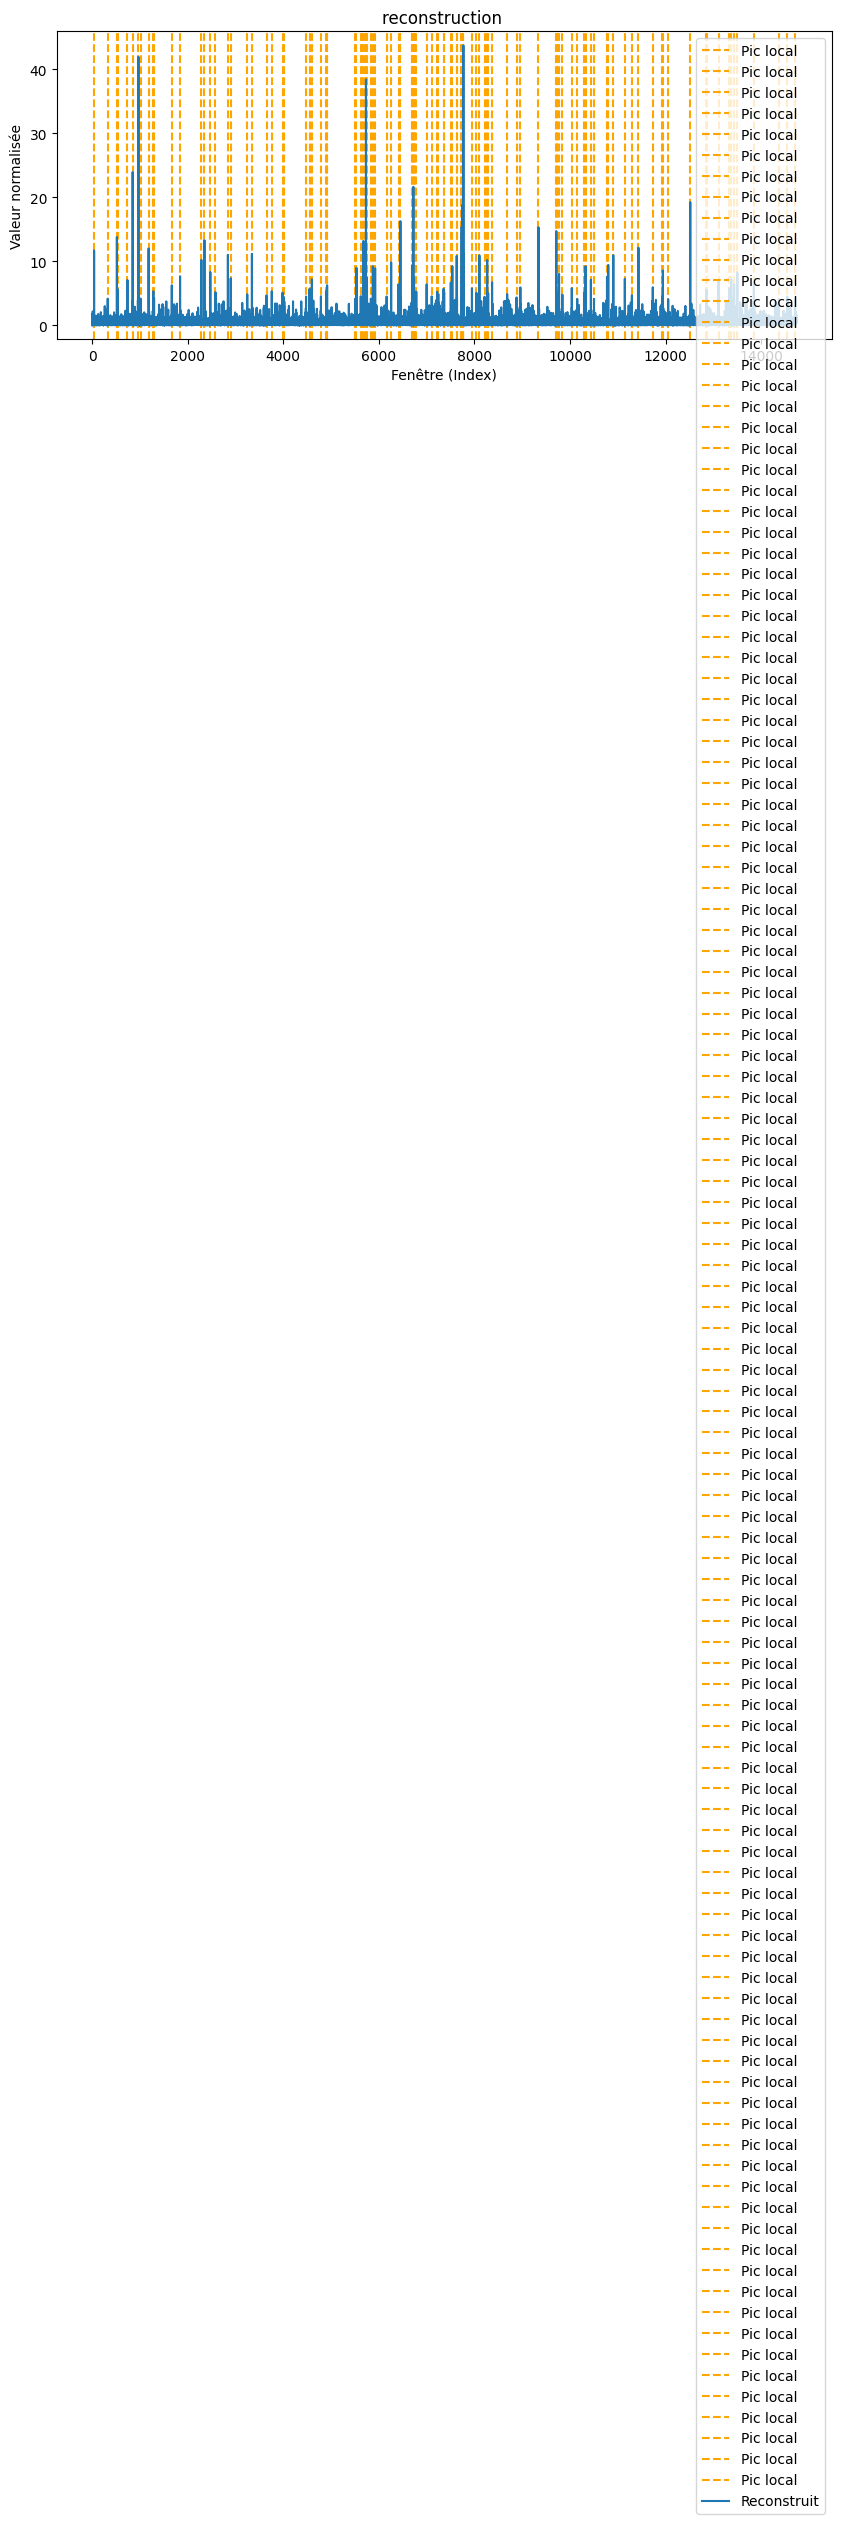

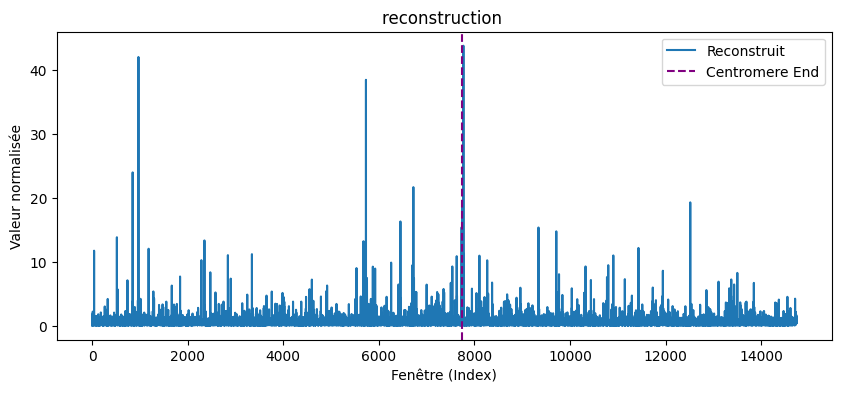

7745
Index avec le plus de pics : 7745, Nombre de pics : 7


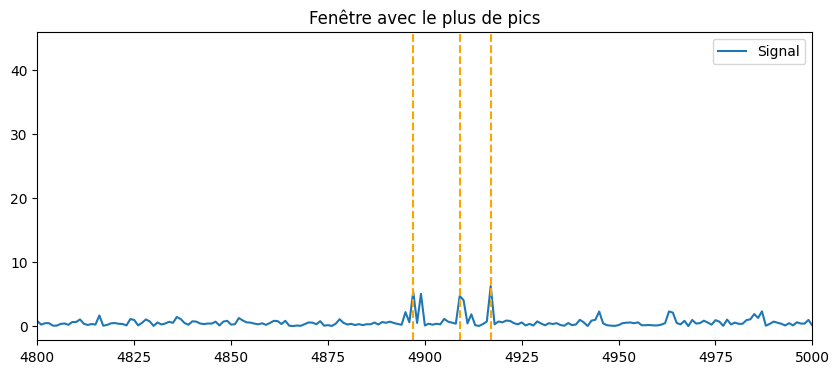

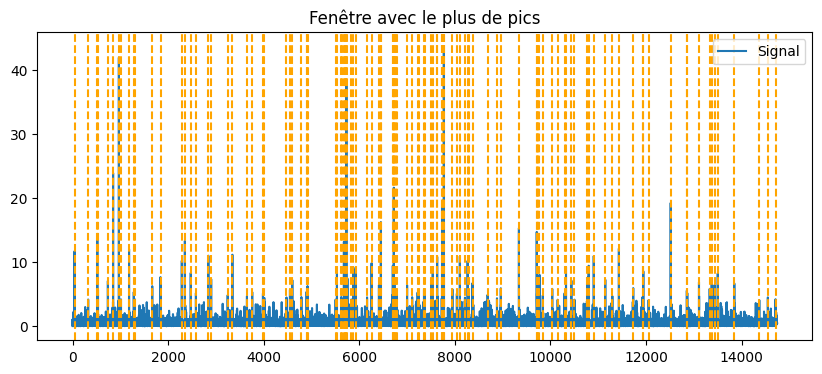

In [187]:
#Detection sur les graphqiues 

detection_temp = []

temp = sauvegarde[6][0]
print(sauvegarde[6][0])
temp = temp_[50:-50]
temp = sauvegarde[30][0]

# Trouver la plus grande valeur et son index
# Trouver l'index et la valeur maximale
max_idx = np.argmax(temp)


max_idx = [max_idx]
detection_temp.append(max_idx)

plt.figure(figsize=(10, 4))
plt.plot(temp, label='Reconstruit')
plt.axvline(x=max_idx, color='purple', linestyle='--', label='Centromere End')
plt.xlabel('Fenêtre (Index)')
plt.ylabel('Valeur normalisée')
plt.title('reconstruction ')
plt.ylim()
plt.legend()
plt.show()
prominence = 4  # Ajuster cette valeur pour contrôler la sensibilité
distance = 5  # Distance minimale entre les pics en bases

# Trouver les pics positifs
peaks_pos, _ = find_peaks(temp, prominence=prominence, distance=distance)

plt.figure(figsize=(10, 4))
for peak in peaks_pos:
    plt.axvline(x=peak, color='orange', linestyle='--', label='Pic local')

plt.plot(temp, label='Reconstruit')
plt.xlabel('Fenêtre (Index)')
plt.ylabel('Valeur normalisée')
plt.title('reconstruction ')
plt.ylim()
plt.legend()
plt.show()
detection_temp.append(peaks_pos)
# Taille de la fenêtre pour la moyenne (±10)
fenetre = 20

# Calcul de la moyenne autour de chaque pic
moyennes = []
for peak in peaks_pos:
    start = max(peak - fenetre, 0)
    end = min(peak + fenetre + 1, len(temp))
    moyenne_locale = np.mean(temp[start:end])
    moyennes.append(moyenne_locale)




# Trouver le pic avec la moyenne la plus élevée
indice_max_moyenne = np.argmax(moyennes)
pic_max = peaks_pos[indice_max_moyenne]
valeur_moyenne_max = moyennes[indice_max_moyenne]

pic_max = [pic_max]
plt.figure(figsize=(10, 4))
plt.plot(temp, label='Reconstruit')
plt.axvline(x=pic_max, color='purple', linestyle='--', label='Centromere End')
plt.xlabel('Fenêtre (Index)')
plt.ylabel('Valeur normalisée')
plt.title('reconstruction ')
plt.ylim()
plt.legend()
plt.show()
detection_temp.append(pic_max)
detection.append(detection_temp)


fenetre =50  # taille totale de la fenêtre (10 de chaque côté par exemple)
moitié = fenetre // 2

# Initialiser une liste pour stocker le nombre de pics dans chaque fenêtre
counts = []
moyennes = []
# Balayer tout le signal
for i in range(len(temp)):
    # Définir la fenêtre centrée autour de i
    debut = max(0, i - moitié)
    fin = min(len(temp), i + moitié)
    
    # Compter combien de pics sont dans cette fenêtre
    count = np.sum((peaks_pos >= debut) & (peaks_pos < fin))
    counts.append(count)

    # Calculer la moyenne de temp dans cette fenêtre
    moyenne = np.mean(temp[debut:fin])
    moyennes.append(moyenne)
    

# Trouver l'indice avec le maximum de pics
max_index = np.argmax(counts)
print(max_index)




# Trouver le maximum de pics
max_count = max(counts)

# Trouver tous les indices avec ce maximum
indices_max = [i for i, c in enumerate(counts) if c == max_count]

# Trouver parmi eux celui avec la plus grande moyenne
meilleur_indice = max(indices_max, key=lambda i: moyennes[i])

# Optionnel : extraire les bornes de la meilleure fenêtre
debut_opt = max(0, meilleur_indice - moitie)
fin_opt = min(len(temp), meilleur_indice + moitie)





print(f"Index avec le plus de pics : {max_index}, Nombre de pics : {counts[max_index]}")

# Optionnel : Visualiser la fenêtre avec le plus de pics
plt.figure(figsize=(10, 4))
plt.plot(temp, label='Signal')
plt.axvline(x=max_index, color='green', linestyle='--')
plt.xlim(4800, 5000)
for peak in peaks_pos:
    plt.axvline(x=peak, color='orange', linestyle='--')
plt.title("Fenêtre avec le plus de pics")
plt.legend()

plt.show()


# Optionnel : Visualiser la fenêtre avec le plus de pics
plt.figure(figsize=(10, 4))
plt.plot(temp, label='Signal')
plt.axvline(x=meilleur_indice, color='green', linestyle='--')

for peak in peaks_pos:
    plt.axvline(x=peak, color='orange', linestyle='--')
plt.title("Fenêtre avec le plus de pics")
plt.legend()
plt.show()




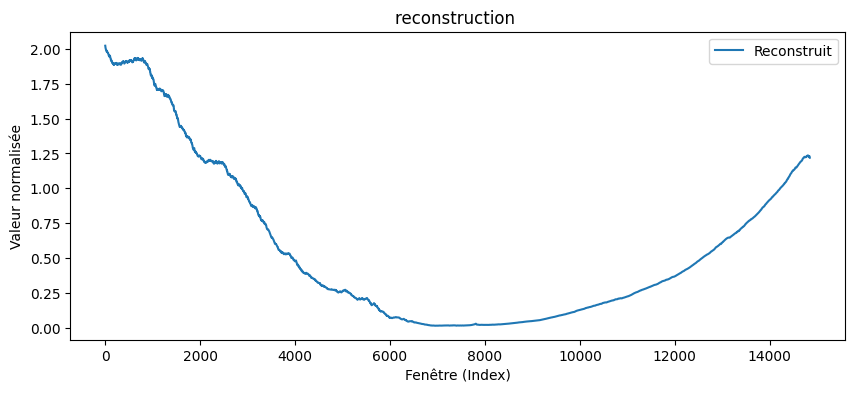

In [99]:
# Reconstruction complète
# Ici reconstructed et data_tensor sont dans l'espace original (2 features)
# Par exemple, comparer la 1ère feature originale et reconstruite
plt.figure(figsize=(10, 4))
plt.plot(errors, label='Reconstruit')
plt.xlabel('Fenêtre (Index)')
plt.ylabel('Valeur normalisée')
plt.title('reconstruction ')
plt.ylim()
plt.legend()
plt.show()

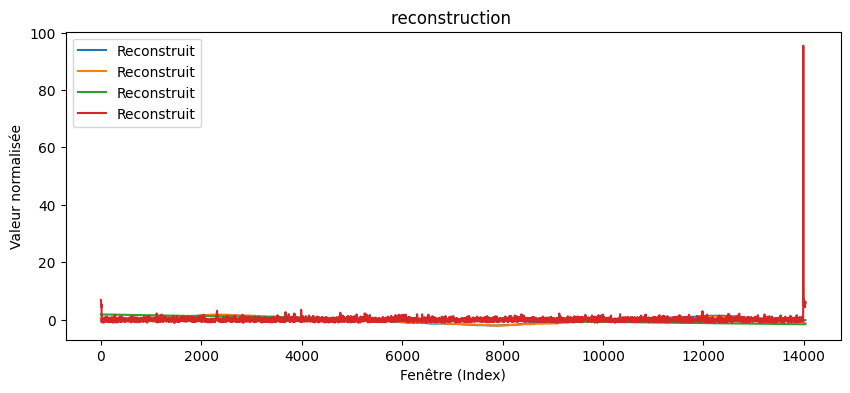

In [82]:
# Reconstruction complète
# Ici reconstructed et data_tensor sont dans l'espace original (2 features)
# Par exemple, comparer la 1ère feature originale et reconstruite
plt.figure(figsize=(10, 4))
plt.plot(chromosome_scaled, label='Reconstruit')
plt.xlabel('Fenêtre (Index)')
plt.ylabel('Valeur normalisée')
plt.title('reconstruction ')
plt.legend()
plt.show()

In [97]:
# Convertir en numpy
errors_np = errors.numpy()

# Taille de la fenêtre
k = 1000

# Liste des médianes locales
local_medians = np.array([
    np.median(errors_np[max(0, i - k//2):min(len(errors_np), i + k//2 + 1)])
    for i in range(len(errors_np))
])

# Re-normaliser
normalized_errors = errors_np / local_medians


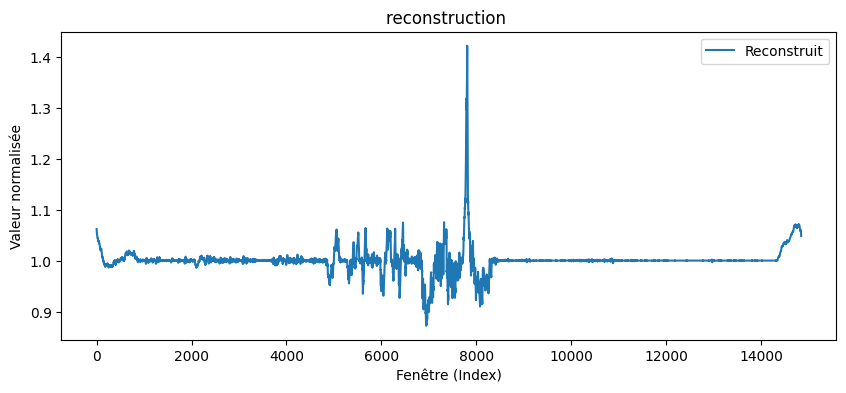

In [98]:
# Reconstruction complète
# Ici reconstructed et data_tensor sont dans l'espace original (2 features)
# Par exemple, comparer la 1ère feature originale et reconstruite
plt.figure(figsize=(10, 4))
plt.plot(normalized_errors, label='Reconstruit')
plt.xlabel('Fenêtre (Index)')
plt.ylabel('Valeur normalisée')
plt.title('reconstruction ')
plt.ylim()
plt.legend()
plt.show()

In [173]:
def count_homopolymers(seq, min_length=5):
    # Ex : trouve AAAAA ou TTTTT, etc.
    pattern = re.compile(rf"(A{{{min_length},}}|T{{{min_length},}}|C{{{min_length},}}|G{{{min_length},}})")
    return len(pattern.findall(seq.upper()))

def load_fasta(fasta_path, window_size=100):
    f = FastA(fasta_path)
    data = []
    
    for maseq in f:
        print(maseq.name)
        features = []

        s = DNA(maseq.sequence.upper())
        seq = maseq.sequence.upper()
        s.window = window_size

        #Karlin
        df_karlin = pd.read_csv(f"../data/karlin/{maseq.name}_karlin_{window_size}.csv")
        karlin = df_karlin['Karlin'].tolist()
        karlin = karlin[5000:-5000]

        #Entropy
        entropy = s.get_entropy(window_size)
        entropy = entropy[5000:-5000]

        #Z curve 
        y_vals = []
        x_vals = []
        z_vals = []
        for base in seq:
            if len(x_vals)==0:
                x = 0
                y = 0
                z =0
            else:
                x = x_vals[-1]
                y = y_vals[-1]
                z = z_vals[-1]
            if base == 'A':
                x += 1
                y += 1
                z += 1
            elif base == 'C':
                x -= 1
                y += 1
                z -= 1
            elif base == 'G':
                x += 1
                y -= 1
                z -= 1
            elif base == 'T':
                x -= 1
                y -= 1
                z += 1
            x_vals.append(x)
            z_vals.append(z)
            y_vals.append(y)
        x_vals = x_vals[5000:-5000]
        y_vals = y_vals[5000:-5000]
        z_vals = z_vals[5000:-5000]



        #X2
        min_homopolymer_length = 2
        X2 = []
        for i in range(0, len(maseq.sequence), 1):
            debut = max(0, i - window_size)
            fin = min(len(temp), i + window_size)
            window = seq[debut:fin]
            nb = count_homopolymers(window, min_length=min_homopolymer_length)
            X2.append(nb)
        X2 = X2[5000:-5000]


        #X3
        min_homopolymer_length = 3
        X3 = []
        for i in range(0, len(maseq.sequence), 1):
            debut = max(0, i - window_size)
            fin = min(len(temp), i + window_size)
            window = seq[debut:fin]
            nb = count_homopolymers(window, min_length=min_homopolymer_length)
            X3.append(nb)

        X3 = X3[5000:-5000]
   

        #X4
        min_homopolymer_length = 4
        X4 = []
        for i in range(0, len(maseq.sequence), 1):
            debut = max(0, i - window_size)
            fin = min(len(temp), i + window_size)
            window = seq[debut:fin]
            nb = count_homopolymers(window, min_length=min_homopolymer_length)
            X4.append(nb)
        X4 = X4[5000:-5000]

        #X5
        min_homopolymer_length = 5
        X5 = []
        for i in range(0, len(maseq.sequence), 1):
            debut = max(0, i - window_size)
            fin = min(len(temp), i + window_size)
            window = seq[debut:fin]
            nb = count_homopolymers(window, min_length=min_homopolymer_length)
            X5.append(nb)

        X5 = X5[5000:-5000]


        #X6
        min_homopolymer_length = 6
        X6 = []
        for i in range(0, len(maseq.sequence), 1):
            debut = max(0, i - window_size)
            fin = min(len(temp), i + window_size)
            window = seq[debut:fin]
            nb = count_homopolymers(window, min_length=min_homopolymer_length)
            X6.append(nb)
        X6 = X6[5000:-5000]

        #dna flex
        dnaFlex = s.get_dna_flexibility()
        dnaFlex = dnaFlex[5000:-5000]

        #dna flex
        info_entropy = s.get_informational_entropy()
        info_entropy = info_entropy[5000:-5000]

        df= pd.DataFrame({
            'karlin': karlin,
            'x_vals': x_vals,
            'y_val': y_vals,
            'z_vals': z_vals,
            'entropy':entropy,
            'X2':X2,
            'X3':X3,
            'X4':X4,
            'X5':X5,
            'X6':X6,
            'dnaFlex':dnaFlex,
            'info_entropy':info_entropy
        })

        data.append(df)
    return data

data_ = load_fasta("../data/Fasta/TriTrypDB-68_LmajorFriedlin_Genome.fasta")
    

LmjF.01
LmjF.02
LmjF.03
LmjF.04
LmjF.05
LmjF.06
LmjF.07
LmjF.08
LmjF.09
LmjF.10
LmjF.11
LmjF.12
LmjF.13
LmjF.14
LmjF.15
LmjF.16
LmjF.17
LmjF.18
LmjF.19
LmjF.20
LmjF.21
LmjF.22
LmjF.23
LmjF.24
LmjF.25
LmjF.26
LmjF.27
LmjF.28
LmjF.29
LmjF.30
LmjF.31
LmjF.32
LmjF.33
LmjF.34
LmjF.35
LmjF.36
